## Table of Contents

**1- Loading all nedeed packages**

**2- Downloading the miRNA expression and clinical data from TCGA**

**3- Check missing values in exp data or target columns in meta data**

**4- Meta Data Exploration**

**5- Data cleaning and outlier detection**

**6- Normalization**
b- DESEQ2
C- LIMA

**7- Differential Analysis between Tumor and Normal**
a- DESEQ2
b- LIMA
c- Common Degs

**8- Common DE miRNAs between Deseq and lima**

### 1- Loading all nedeed packages

In [1]:
library(magrittr)
library(ggplot2)
library(ggrepel)
library(tidyverse)
library(limma)
library(vegan)
library(cluster)
library(factoextra)
library(gridExtra)
library(PerformanceAnalytics)
library(corrplot)
library(Hmisc)
library(RColorBrewer)
library(impute)
library(pathview)
library(glmnet)
library(SummarizedExperiment)
library(TCGAbiolinks)
library(ggfortify)
library(ComplexHeatmap)
library(edgeR)
library(dplyr)
library(corrplot)
library(EnhancedVolcano)
library(ggvenn)
library(TCGAbiolinks)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::set_names() masks magrittr::set_names()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"package 'vegan' was built under R version 4.3.1"
Loading required package: permute

Warning message:
"package 'permute' was built under R version 4.3.1"
Loading required package: lattice

This is vegan 2.6-4

Warning message:
"package 'factoextra' was built under R version 4.3.1"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching

The following object is masked from 'package:Hmisc':

    contents


Loading required package: grid

ComplexHeatmap version 2.16.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


Warning message:
"package 'ggvenn' was built under R version 4.3.1"


### 2- Downloading the mRNA expression and clinical data from TCGA

In [30]:
# Download KIRC data using TCGAbiolinks
query.mirna <- GDCquery(
    project = "TCGA-KIRC", 
    experimental.strategy = "miRNA-Seq",
    data.category = "Transcriptome Profiling", 
    data.type = "miRNA Expression Quantification"
)

GDCdownload(query.mirna)
mirna <- GDCprepare(
    query = query.mirna,
    save = TRUE, 
    save.filename = "mirna.rda"
)

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-KIRC

Warning message in open.connection(con, "rb"):
"URL 'https://api.gdc.cancer.gov/files/?pretty=true&expand=cases,cases.samples.portions.analytes.aliquots,cases.project,center,analysis,cases.samples&size=2460&filters=%7B%22op%22:%22and%22,%22content%22:[%7B%22op%22:%22in%22,%22content%22:%7B%22field%22:%22cases.project.project_id%22,%22value%22:[%22TCGA-KIRC%22]%7D%7D,%7B%22op%22:%22in%22,%22content%22:%7B%22field%22:%22files.experimental_strategy%22,%22value%22:[%22miRNA-Seq%22]%7D%7D,%7B%22op%22:%22in%22,%22content%22:%7B%22field%22:%22files.data_category%22,%22value%22:[%22Transcriptome%20Profiling%22]%7D%7D,%7B%22op%22:%22in%22,%22content%22:%7B%22field%22:%22files.data_type%22,%22

  |======================================================================| 100%


=> Saving file: mirna.rda

=> File saved



In [32]:
mirna

miRNA_ID       read_count_TCGA-BP-4327-01A-01R-1288-13
1    hsa-let-7a-1     9579                                 
2    hsa-let-7a-2     9826                                 
3    hsa-let-7a-3     9919                                 
4    hsa-let-7b      23704                                 
5    hsa-let-7c       1103                                 
6    hsa-let-7d       1807                                 
7    hsa-let-7e       1114                                 
8    hsa-let-7f-1     3266                                 
9    hsa-let-7f-2     3308                                 
10   hsa-let-7g        885                                 
11   hsa-let-7i       1312                                 
12   hsa-mir-1-1         1                                 
13   hsa-mir-1-2         0                                 
14   hsa-mir-100      3472                                 
15   hsa-mir-101-1   17299                                 
16   hsa-mir-101-2   17428                                 
17   hsa-mir-103a-1   8425                                 
18   hsa-mir-103a-2   8624                                 
19   hsa-mir-103b-1      0                                 
20   hsa-mir-103b-2      0                                 
21   hsa-mir-105-1       0                                 
22   hsa-mir-105-2       1                                 
23   hsa-mir-106a       32                                 
24   hsa-mir-106b      476                                 
25   hsa-mir-107        70                                 
26   hsa-mir-10a     15443                                 
27   hsa-mir-10b    435483                                 
28   hsa-mir-1178        0                                 
29   hsa-mir-1179        0                                 
30   hsa-mir-1180       15                                 
⋮    ⋮              ⋮                                      
1852 hsa-mir-920        0                                  
1853 hsa-mir-921        0                                  
1854 hsa-mir-922        0                                  
1855 hsa-mir-924        0                                  
1856 hsa-mir-92a-1   4774                                  
1857 hsa-mir-92a-2   4393                                  
1858 hsa-mir-92b      108                                  
1859 hsa-mir-93      4160                                  
1860 hsa-mir-933        0                                  
1861 hsa-mir-934        0                                  
1862 hsa-mir-935        1                                  
1863 hsa-mir-936        0                                  
1864 hsa-mir-937        2                                  
1865 hsa-mir-938        0                                  
1866 hsa-mir-939        0                                  
1867 hsa-mir-940        1                                  
1868 hsa-mir-941-1      0                                  
1869 hsa-mir-941-2      0                                  
1870 hsa-mir-941-3      0                                  
1871 hsa-mir-941-4      0                                  
1872 hsa-mir-941-5      0                                  
1873 hsa-mir-942        4                                  
1874 hsa-mir-943        0                                  
1875 hsa-mir-944        0                                  
1876 hsa-mir-95         4                                  
1877 hsa-mir-9500       0                                  
1878 hsa-mir-96         2                                  
1879 hsa-mir-98        91                                  
1880 hsa-mir-99a      409                                  
1881 hsa-mir-99b    69803                                  
     reads_per_million_miRNA_mapped_TCGA-BP-4327-01A-01R-1288-13
1    5.932110e+03                                               
2    6.085073e+03                                               
3    6.142667e+03                                               
4    1.467948e+04        

In [3]:
mirna_raw <- read.csv("mirna_raw_tcga.csv",check.names=F,row.names=1)
head(mirna_raw)

miRNA_ID     read_count_TCGA-BP-4160-01A-02R-1288-13
1 hsa-let-7a-1 13420                                  
2 hsa-let-7a-2 13855                                  
3 hsa-let-7a-3 13424                                  
4 hsa-let-7b   34134                                  
5 hsa-let-7c    5709                                  
6 hsa-let-7d    1968                                  
  reads_per_million_miRNA_mapped_TCGA-BP-4160-01A-02R-1288-13
1  5825.9727                                                 
2  6014.8176                                                 
3  5827.7092                                                 
4 14818.4615                                                 
5  2478.4261                                                 
6   854.3602                                                 
  cross-mapped_TCGA-BP-4160-01A-02R-1288-13
1 N                                        
2 N                                        
3 N                                        
4 N                                        
5 N                                        
6 N                                        
  read_count_TCGA-BP-4781-01A-01R-1304-13
1 10849                                  
2 10734                                  
3 10876                                  
4 31573                                  
5  1726                                  
6  1731                                  
  reads_per_million_miRNA_mapped_TCGA-BP-4781-01A-01R-1304-13
1  4867.3688                                                 
2  4815.7744                                                 
3  4879.4823                                                 
4 14165.1244                                                 
5   774.3643                                                 
6   776.6076                                                 
  cross-mapped_TCGA-BP-4781-01A-01R-1304-13
1 N                                        
2 N                                        
3 N                                        
4 N                                        
5 N                                        
6 N                                        
  read_count_TCGA-B0-4821-01A-01R-1502-13
1 48673                                  
2 48671                                  
3 48925                                  
4 55842                                  
5  5118                                  
6  1602                                  
  reads_per_million_miRNA_mapped_TCGA-B0-4821-01A-01R-1502-13
1 11697.7209                                                 
2 11697.2402                                                 
3 11758.2848                                                 
4 13420.6671                                                 
5  1230.0235                                                 
6   385.0132                                                 
  cross-mapped_TCGA-B0-4821-01A-01R-1502-13 ⋯
1 N                                         ⋯
2 Y                                         ⋯
3 N                                         ⋯
4 N                                         ⋯
5 Y                                         ⋯
6 N                                         ⋯
  cross-mapped_TCGA-B0-4838-01A-01R-1304-13
1 N                                        
2 N                                        
3 N                                        
4 N                                        
5 N                                        
6 N                                        
  read_count_TCGA-B0-5399-01A-01R-1502-13
1 79224                                  
2 79476                                  
3 79713                                  
4 70378                                  
5 20023                                  
6  2900                                  
  reads_per_million_miRNA_mapped_TCGA-B0-5399-01A-01R-1502-13
1 14877.0676                                                 
2 14924.3894                                                 
3

In [36]:
colnames(clinical)

[1] "project"                                             
 [2] "submitter_id"                                        
 [3] "synchronous_malignancy"                              
 [4] "ajcc_pathologic_stage"                               
 [5] "days_to_diagnosis"                                   
 [6] "created_datetime"                                    
 [7] "last_known_disease_status"                           
 [8] "tissue_or_organ_of_origin"                           
 [9] "days_to_last_follow_up"                              
[10] "age_at_diagnosis"                                    
[11] "primary_diagnosis"                                   
[12] "updated_datetime"                                    
[13] "prior_malignancy"                                    
[14] "year_of_diagnosis"                                   
[15] "state"                                               
[16] "prior_treatment"                                     
[17] "days_to_last_known_disease_status"                   
[18] "ajcc_staging_system_edition"                         
[19] "ajcc_pathologic_t"                                   
[20] "days_to_recurrence"                                  
[21] "morphology"                                          
[22] "ajcc_pathologic_n"                                   
[23] "ajcc_pathologic_m"                                   
[24] "classification_of_tumor"                             
[25] "diagnosis_id"                                        
[26] "icd_10_code"                                         
[27] "site_of_resection_or_biopsy"                         
[28] "tumor_grade"                                         
[29] "progression_or_recurrence"                           
[30] "ajcc_clinical_m"                                     
[31] "cigarettes_per_day"                                  
[32] "alcohol_history"                                     
[33] "exposure_id"                                         
[34] "years_smoked"                                        
[35] "alcohol_intensity"                                   
[36] "pack_years_smoked"                                   
[37] "race"                                                
[38] "gender"                                              
[39] "ethnicity"                                           
[40] "vital_status"                                        
[41] "age_at_index"                                        
[42] "days_to_birth"                                       
[43] "year_of_birth"                                       
[44] "demographic_id"                                      
[45] "days_to_death"                                       
[46] "year_of_death"                                       
[47] "treatments_pharmaceutical_days_to_treatment_end"     
[48] "treatments_pharmaceutical_days_to_treatment_start"   
[49] "treatments_pharmaceutical_treatment_id"              
[50] "treatments_pharmaceutical_treatment_type"            
[51] "treatments_pharmaceutical_regimen_or_line_of_therapy"
[52] "treatments_pharmaceutical_treatment_effect"          
[53] "treatments_pharmaceutical_therapeutic_agents"        
[54] "treatments_pharmaceutical_treatment_or_therapy"      
[55] "treatments_pharmaceutical_initial_disease_status"    
[56] "treatments_pharmaceutical_treatment_intent_type"     
[57] "treatments_pharmaceutical_treatment_anatomic_site"   
[58] "treatments_pharmaceutical_treatment_outcome"         
[59] "treatments_radiation_days_to_treatment_end"          
[60] "treatments_radiation_days_to_treatment_start"        
[61] "treatments_radiation_treatment_id"                   
[62] "treatments_radiation_treatment_type"                 
[63] "treatments_radiation_regimen_or_line_of_therapy"     
[64] "treatments_radiation_treatment_effect"               
[65] "treatments_radiation_therapeutic_agents"             
[66] "treatments_radiation_treatment_or_therapy"           
[67] "treatments_radiation_initial_diseas

In [30]:
# extract read count columns and make the ronames of data by miRNA 
mirna_counts <- mirna_raw
rownames(mirna_counts)<- mirna_raw[,"miRNA_ID"]
mirna_counts <- mirna_raw %>% dplyr:: select(starts_with("read_count"))
rownames(mirna_counts)<- mirna_raw[,"miRNA_ID"]
head(mirna_counts)

read_count_TCGA-BP-4160-01A-02R-1288-13
hsa-let-7a-1 13420                                  
hsa-let-7a-2 13855                                  
hsa-let-7a-3 13424                                  
hsa-let-7b   34134                                  
hsa-let-7c    5709                                  
hsa-let-7d    1968                                  
             read_count_TCGA-BP-4781-01A-01R-1304-13
hsa-let-7a-1 10849                                  
hsa-let-7a-2 10734                                  
hsa-let-7a-3 10876                                  
hsa-let-7b   31573                                  
hsa-let-7c    1726                                  
hsa-let-7d    1731                                  
             read_count_TCGA-B0-4821-01A-01R-1502-13
hsa-let-7a-1 48673                                  
hsa-let-7a-2 48671                                  
hsa-let-7a-3 48925                                  
hsa-let-7b   55842                                  
hsa-let-7c    5118                                  
hsa-let-7d    1602                                  
             read_count_TCGA-CJ-4872-01A-01R-1304-13
hsa-let-7a-1 14906                                  
hsa-let-7a-2 15037                                  
hsa-let-7a-3 14869                                  
hsa-let-7b   53341                                  
hsa-let-7c    5936                                  
hsa-let-7d    1818                                  
             read_count_TCGA-B8-5553-01A-01R-1540-13
hsa-let-7a-1 20126                                  
hsa-let-7a-2 19841                                  
hsa-let-7a-3 20215                                  
hsa-let-7b   46985                                  
hsa-let-7c    4626                                  
hsa-let-7d    2334                                  
             read_count_TCGA-BP-5176-01A-01R-1425-13
hsa-let-7a-1 34143                                  
hsa-let-7a-2 34203                                  
hsa-let-7a-3 34242                                  
hsa-let-7b   68660                                  
hsa-let-7c   11953                                  
hsa-let-7d    2183                                  
             read_count_TCGA-CJ-5671-01A-11R-1540-13
hsa-let-7a-1 20789                                  
hsa-let-7a-2 20737                                  
hsa-let-7a-3 20840                                  
hsa-let-7b   52117                                  
hsa-let-7c    5308                                  
hsa-let-7d    1482                                  
             read_count_TCGA-A3-A6NJ-01A-12R-A33A-13
hsa-let-7a-1 32955                                  
hsa-let-7a-2 33463                                  
hsa-let-7a-3 33499                                  
hsa-let-7b   66777                                  
hsa-let-7c    9369                                  
hsa-let-7d    1785                                  
             read_count_TCGA-B8-4153-01B-11R-1671-13
hsa-let-7a-1 59601                                  
hsa-let-7a-2 59068                                  
hsa-let-7a-3 59436                                  
hsa-let-7b   56898                                  
hsa-let-7c   11614                                  
hsa-let-7d    2138                                  
             read_count_TCGA-B0-4847-01A-01R-1276-13 ⋯
hsa-let-7a-1  8968                                   ⋯
hsa-let-7a-2  8880                                   ⋯
hsa-let-7a-3  9091                                   ⋯
hsa-let-7b   20178                                   ⋯
hsa-let-7c    5992                                   ⋯
hsa-let-7d    2236                                   ⋯
             read_count_TCGA-BP-4971-01A-01R-1762-13
hsa-let-7a-1 19607                                  
hsa-let-7a-2 19576                                  
hsa-let-7a-3 19755                                  
hsa-let-7b   24074                                  
hsa-let-7c    2490      

In [31]:
# subset the colnames to be as sample id 
colnames(mirna_counts) = substr(colnames(mirna_counts), 12, 27)
head(mirna_counts)

TCGA-BP-4160-01A TCGA-BP-4781-01A TCGA-B0-4821-01A
hsa-let-7a-1 13420            10849            48673           
hsa-let-7a-2 13855            10734            48671           
hsa-let-7a-3 13424            10876            48925           
hsa-let-7b   34134            31573            55842           
hsa-let-7c    5709             1726             5118           
hsa-let-7d    1968             1731             1602           
             TCGA-CJ-4872-01A TCGA-B8-5553-01A TCGA-BP-5176-01A
hsa-let-7a-1 14906            20126            34143           
hsa-let-7a-2 15037            19841            34203           
hsa-let-7a-3 14869            20215            34242           
hsa-let-7b   53341            46985            68660           
hsa-let-7c    5936             4626            11953           
hsa-let-7d    1818             2334             2183           
             TCGA-CJ-5671-01A TCGA-A3-A6NJ-01A TCGA-B8-4153-01B
hsa-let-7a-1 20789            32955            59601           
hsa-let-7a-2 20737            33463            59068           
hsa-let-7a-3 20840            33499            59436           
hsa-let-7b   52117            66777            56898           
hsa-let-7c    5308             9369            11614           
hsa-let-7d    1482             1785             2138           
             TCGA-B0-4847-01A ⋯ TCGA-BP-4971-01A TCGA-B0-4945-01A
hsa-let-7a-1  8968            ⋯ 19607            12360           
hsa-let-7a-2  8880            ⋯ 19576            12215           
hsa-let-7a-3  9091            ⋯ 19755            12417           
hsa-let-7b   20178            ⋯ 24074            24368           
hsa-let-7c    5992            ⋯  2490             4066           
hsa-let-7d    2236            ⋯   726             1419           
             TCGA-CZ-5452-01A TCGA-CZ-5452-11A TCGA-AS-3777-01A
hsa-let-7a-1 38211            53214             5456           
hsa-let-7a-2 38534            52939             5350           
hsa-let-7a-3 38516            53070             5458           
hsa-let-7b   38999            27989            17215           
hsa-let-7c    2241             9265             1572           
hsa-let-7d    1728             1388              405           
             TCGA-DV-A4VX-01A TCGA-B0-4838-01A TCGA-B0-5399-01A
hsa-let-7a-1 16380            13061            79224           
hsa-let-7a-2 16121            13022            79476           
hsa-let-7a-3 16293            13474            79713           
hsa-let-7b   15504            39761            70378           
hsa-let-7c    2691             7357            20023           
hsa-let-7d     602             1788             2900           
             TCGA-BP-4163-01A TCGA-AK-3451-01A
hsa-let-7a-1 18634            23073           
hsa-let-7a-2 18666            23559           
hsa-let-7a-3 18800            23398           
hsa-let-7b   65461            33248           
hsa-let-7c    3166             2270           
hsa-let-7d    1318              850

In [34]:
# read the meta data
meta =read.csv('meta_tcga_kirc.csv',check.names=F,row.names=1)
head(meta)

barcode                      patient      sample           shortLetterCode
1 TCGA-BP-4781-01A-01R-1305-07 TCGA-BP-4781 TCGA-BP-4781-01A TP             
2 TCGA-CJ-4644-01A-02R-1325-07 TCGA-CJ-4644 TCGA-CJ-4644-01A TP             
3 TCGA-CZ-5986-01A-11R-1672-07 TCGA-CZ-5986 TCGA-CZ-5986-01A TP             
4 TCGA-BP-5176-01A-01R-1426-07 TCGA-BP-5176 TCGA-BP-5176-01A TP             
5 TCGA-CZ-4863-01A-01R-1503-07 TCGA-CZ-4863 TCGA-CZ-4863-01A TP             
6 TCGA-A3-3387-11A-01R-1541-07 TCGA-A3-3387 TCGA-A3-3387-11A NT             
  definition          sample_submitter_id sample_type_id tumor_descriptor
1 Primary solid Tumor TCGA-BP-4781-01A     1             NA              
2 Primary solid Tumor TCGA-CJ-4644-01A     1             Not Reported    
3 Primary solid Tumor TCGA-CZ-5986-01A     1             Not Reported    
4 Primary solid Tumor TCGA-BP-5176-01A     1             NA              
5 Primary solid Tumor TCGA-CZ-4863-01A     1             Not Reported    
6 Solid Tissue Normal TCGA-A3-3387-11A    11             Not Reported    
  sample_id                            sample_type         ⋯
1 15423d9c-91c3-4fe5-9880-a28840acb75a Primary Tumor       ⋯
2 259427d0-8f7d-43bb-9cdc-b07c6437dcff Primary Tumor       ⋯
3 961279aa-1e8a-48fe-9da1-9cc890e5c019 Primary Tumor       ⋯
4 6a6dfbd9-937b-4939-b604-427bca03bbcd Primary Tumor       ⋯
5 753f0c0c-ac24-4e17-88f9-516366f7beb1 Primary Tumor       ⋯
6 f2b36ca3-8d5d-453d-b445-82faa22a8a35 Solid Tissue Normal ⋯
  disease_type                 name                              releasable
1 Adenomas and Adenocarcinomas Kidney Renal Clear Cell Carcinoma TRUE      
2 Adenomas and Adenocarcinomas Kidney Renal Clear Cell Carcinoma TRUE      
3 Adenomas and Adenocarcinomas Kidney Renal Clear Cell Carcinoma TRUE      
4 Adenomas and Adenocarcinomas Kidney Renal Clear Cell Carcinoma TRUE      
5 Adenomas and Adenocarcinomas Kidney Renal Clear Cell Carcinoma TRUE      
6 Adenomas and Adenocarcinomas Kidney Renal Clear Cell Carcinoma TRUE      
  released cigarettes_per_day pack_years_smoked years_smoked paper_patient
1 TRUE     NA                 NA                NA           TCGA-BP-4781 
2 TRUE     NA                 NA                NA           TCGA-CJ-4644 
3 TRUE     NA                 NA                NA           TCGA-CZ-5986 
4 TRUE     NA                 NA                NA           TCGA-BP-5176 
5 TRUE     NA                 NA                NA           TCGA-CZ-4863 
6 TRUE     NA                 NA                NA           NA           
  paper_mRNA_cluster paper_microRNA_cluster
1  3                  2                    
2  4                  3                    
3  1                  1                    
4  4                  3                    
5  1                  4                    
6 NA                 NA

In [36]:
# check duplicates on sample id of meta data
sum(duplicated(meta$sample))
meta = meta[!duplicated(meta$sample),]
rownames(meta) = meta$sample
head(meta)

[1] 4

barcode                      patient      sample          
TCGA-BP-4781-01A TCGA-BP-4781-01A-01R-1305-07 TCGA-BP-4781 TCGA-BP-4781-01A
TCGA-CJ-4644-01A TCGA-CJ-4644-01A-02R-1325-07 TCGA-CJ-4644 TCGA-CJ-4644-01A
TCGA-CZ-5986-01A TCGA-CZ-5986-01A-11R-1672-07 TCGA-CZ-5986 TCGA-CZ-5986-01A
TCGA-BP-5176-01A TCGA-BP-5176-01A-01R-1426-07 TCGA-BP-5176 TCGA-BP-5176-01A
TCGA-CZ-4863-01A TCGA-CZ-4863-01A-01R-1503-07 TCGA-CZ-4863 TCGA-CZ-4863-01A
TCGA-A3-3387-11A TCGA-A3-3387-11A-01R-1541-07 TCGA-A3-3387 TCGA-A3-3387-11A
                 shortLetterCode definition          sample_submitter_id
TCGA-BP-4781-01A TP              Primary solid Tumor TCGA-BP-4781-01A   
TCGA-CJ-4644-01A TP              Primary solid Tumor TCGA-CJ-4644-01A   
TCGA-CZ-5986-01A TP              Primary solid Tumor TCGA-CZ-5986-01A   
TCGA-BP-5176-01A TP              Primary solid Tumor TCGA-BP-5176-01A   
TCGA-CZ-4863-01A TP              Primary solid Tumor TCGA-CZ-4863-01A   
TCGA-A3-3387-11A NT              Solid Tissue Normal TCGA-A3-3387-11A   
                 sample_type_id tumor_descriptor
TCGA-BP-4781-01A  1             NA              
TCGA-CJ-4644-01A  1             Not Reported    
TCGA-CZ-5986-01A  1             Not Reported    
TCGA-BP-5176-01A  1             NA              
TCGA-CZ-4863-01A  1             Not Reported    
TCGA-A3-3387-11A 11             Not Reported    
                 sample_id                            sample_type         ⋯
TCGA-BP-4781-01A 15423d9c-91c3-4fe5-9880-a28840acb75a Primary Tumor       ⋯
TCGA-CJ-4644-01A 259427d0-8f7d-43bb-9cdc-b07c6437dcff Primary Tumor       ⋯
TCGA-CZ-5986-01A 961279aa-1e8a-48fe-9da1-9cc890e5c019 Primary Tumor       ⋯
TCGA-BP-5176-01A 6a6dfbd9-937b-4939-b604-427bca03bbcd Primary Tumor       ⋯
TCGA-CZ-4863-01A 753f0c0c-ac24-4e17-88f9-516366f7beb1 Primary Tumor       ⋯
TCGA-A3-3387-11A f2b36ca3-8d5d-453d-b445-82faa22a8a35 Solid Tissue Normal ⋯
                 disease_type                 name                             
TCGA-BP-4781-01A Adenomas and Adenocarcinomas Kidney Renal Clear Cell Carcinoma
TCGA-CJ-4644-01A Adenomas and Adenocarcinomas Kidney Renal Clear Cell Carcinoma
TCGA-CZ-5986-01A Adenomas and Adenocarcinomas Kidney Renal Clear Cell Carcinoma
TCGA-BP-5176-01A Adenomas and Adenocarcinomas Kidney Renal Clear Cell Carcinoma
TCGA-CZ-4863-01A Adenomas and Adenocarcinomas Kidney Renal Clear Cell Carcinoma
TCGA-A3-3387-11A Adenomas and Adenocarcinomas Kidney Renal Clear Cell Carcinoma
                 releasable released cigarettes_per_day pack_years_smoked
TCGA-BP-4781-01A TRUE       TRUE     NA                 NA               
TCGA-CJ-4644-01A TRUE       TRUE     NA                 NA               
TCGA-CZ-5986-01A TRUE       TRUE     NA                 NA               
TCGA-BP-5176-01A TRUE       TRUE     NA                 NA               
TCGA-CZ-4863-01A TRUE       TRUE     NA                 NA               
TCGA-A3-3387-11A TRUE       TRUE     NA                 NA               
                 years_smoked paper_patient paper_mRNA_cluster
TCGA-BP-4781-01A NA           TCGA-BP-4781   3                
TCGA-CJ-4644-01A NA           TCGA-CJ-4644   4                
TCGA-CZ-5986-01A NA           TCGA-CZ-5986   1                
TCGA-BP-5176-01A NA           TCGA-BP-5176   4                
TCGA-CZ-4863-01A NA           TCGA-CZ-4863   1                
TCGA-A3-3387-11A NA           NA            NA                
                 paper_microRNA_cluster
TCGA-BP-4781-01A  2                    
TCGA-CJ-4644-01A  3                    
TCGA-CZ-5986-01A  1                    
TCGA-BP-5176-01A  3                    
TCGA-CZ-4863-01A  4                    
TCGA-A3-3387-11A NA

In [41]:
# see the intersection between count data and meta data
com_samples <- intersect(colnames(mirna_counts), rownames(meta))
length(com_samples)

[1] 591

In [43]:
# make rows of meta and and columns count data equal the intersection between meta and count
meta2 <- meta[com_samples,]
mirna_counts2 <- mirna_counts[,com_samples]

all(colnames(mirna_counts2)==rownames(meta2))
dim(meta2)
dim(mirna_counts2)

[1] TRUE

[1] 591  71

[1] 1881  591

### Save raw exp and clinical data

In [44]:
write.csv(mirna_counts2, "raw_mir_counts_samples.csv")

In [45]:
write.csv(meta2, "meta_tcga_mirna_samples.csv")

### Read exp and meta (clinical) data

In [2]:
mir_counts =read.csv('raw_mir_counts_samples.csv',check.names=F,row.names=1)
head(mir_counts)

TCGA-BP-4160-01A TCGA-BP-4781-01A TCGA-B0-4821-01A
hsa-let-7a-1 13420            10849            48673           
hsa-let-7a-2 13855            10734            48671           
hsa-let-7a-3 13424            10876            48925           
hsa-let-7b   34134            31573            55842           
hsa-let-7c    5709             1726             5118           
hsa-let-7d    1968             1731             1602           
             TCGA-CJ-4872-01A TCGA-B8-5553-01A TCGA-BP-5176-01A
hsa-let-7a-1 14906            20126            34143           
hsa-let-7a-2 15037            19841            34203           
hsa-let-7a-3 14869            20215            34242           
hsa-let-7b   53341            46985            68660           
hsa-let-7c    5936             4626            11953           
hsa-let-7d    1818             2334             2183           
             TCGA-CJ-5671-01A TCGA-A3-A6NJ-01A TCGA-B8-4153-01B
hsa-let-7a-1 20789            32955            59601           
hsa-let-7a-2 20737            33463            59068           
hsa-let-7a-3 20840            33499            59436           
hsa-let-7b   52117            66777            56898           
hsa-let-7c    5308             9369            11614           
hsa-let-7d    1482             1785             2138           
             TCGA-B0-4847-01A ⋯ TCGA-BP-4971-01A TCGA-B0-4945-01A
hsa-let-7a-1  8968            ⋯ 19607            12360           
hsa-let-7a-2  8880            ⋯ 19576            12215           
hsa-let-7a-3  9091            ⋯ 19755            12417           
hsa-let-7b   20178            ⋯ 24074            24368           
hsa-let-7c    5992            ⋯  2490             4066           
hsa-let-7d    2236            ⋯   726             1419           
             TCGA-CZ-5452-01A TCGA-CZ-5452-11A TCGA-AS-3777-01A
hsa-let-7a-1 38211            53214             5456           
hsa-let-7a-2 38534            52939             5350           
hsa-let-7a-3 38516            53070             5458           
hsa-let-7b   38999            27989            17215           
hsa-let-7c    2241             9265             1572           
hsa-let-7d    1728             1388              405           
             TCGA-DV-A4VX-01A TCGA-B0-4838-01A TCGA-B0-5399-01A
hsa-let-7a-1 16380            13061            79224           
hsa-let-7a-2 16121            13022            79476           
hsa-let-7a-3 16293            13474            79713           
hsa-let-7b   15504            39761            70378           
hsa-let-7c    2691             7357            20023           
hsa-let-7d     602             1788             2900           
             TCGA-BP-4163-01A TCGA-AK-3451-01A
hsa-let-7a-1 18634            23073           
hsa-let-7a-2 18666            23559           
hsa-let-7a-3 18800            23398           
hsa-let-7b   65461            33248           
hsa-let-7c    3166             2270           
hsa-let-7d    1318              850

In [3]:
meta =read.csv('meta_tcga_mirna_samples.csv',check.names=F,row.names=1)
head(meta)

barcode                      patient      sample          
TCGA-BP-4160-01A TCGA-BP-4160-01A-02R-1289-07 TCGA-BP-4160 TCGA-BP-4160-01A
TCGA-BP-4781-01A TCGA-BP-4781-01A-01R-1305-07 TCGA-BP-4781 TCGA-BP-4781-01A
TCGA-B0-4821-01A TCGA-B0-4821-01A-01R-1503-07 TCGA-B0-4821 TCGA-B0-4821-01A
TCGA-CJ-4872-01A TCGA-CJ-4872-01A-01R-1305-07 TCGA-CJ-4872 TCGA-CJ-4872-01A
TCGA-B8-5553-01A TCGA-B8-5553-01A-01R-1541-07 TCGA-B8-5553 TCGA-B8-5553-01A
TCGA-BP-5176-01A TCGA-BP-5176-01A-01R-1426-07 TCGA-BP-5176 TCGA-BP-5176-01A
                 shortLetterCode definition          sample_submitter_id
TCGA-BP-4160-01A TP              Primary solid Tumor TCGA-BP-4160-01A   
TCGA-BP-4781-01A TP              Primary solid Tumor TCGA-BP-4781-01A   
TCGA-B0-4821-01A TP              Primary solid Tumor TCGA-B0-4821-01A   
TCGA-CJ-4872-01A TP              Primary solid Tumor TCGA-CJ-4872-01A   
TCGA-B8-5553-01A TP              Primary solid Tumor TCGA-B8-5553-01A   
TCGA-BP-5176-01A TP              Primary solid Tumor TCGA-BP-5176-01A   
                 sample_type_id tumor_descriptor
TCGA-BP-4160-01A 1              NA              
TCGA-BP-4781-01A 1              NA              
TCGA-B0-4821-01A 1              Not Reported    
TCGA-CJ-4872-01A 1              NA              
TCGA-B8-5553-01A 1              Not Reported    
TCGA-BP-5176-01A 1              NA              
                 sample_id                            sample_type   ⋯
TCGA-BP-4160-01A 57805457-b9c9-4f50-aef2-885618aaaca8 Primary Tumor ⋯
TCGA-BP-4781-01A 15423d9c-91c3-4fe5-9880-a28840acb75a Primary Tumor ⋯
TCGA-B0-4821-01A 2f1e11d0-dac6-499a-8a19-8ee05a24ba34 Primary Tumor ⋯
TCGA-CJ-4872-01A 072d4261-7c22-4bd9-b4e1-b107e845e5cb Primary Tumor ⋯
TCGA-B8-5553-01A 6adcb787-0802-4d9f-94fd-c35cac487044 Primary Tumor ⋯
TCGA-BP-5176-01A 6a6dfbd9-937b-4939-b604-427bca03bbcd Primary Tumor ⋯
                 disease_type                 name                             
TCGA-BP-4160-01A Adenomas and Adenocarcinomas Kidney Renal Clear Cell Carcinoma
TCGA-BP-4781-01A Adenomas and Adenocarcinomas Kidney Renal Clear Cell Carcinoma
TCGA-B0-4821-01A Adenomas and Adenocarcinomas Kidney Renal Clear Cell Carcinoma
TCGA-CJ-4872-01A Adenomas and Adenocarcinomas Kidney Renal Clear Cell Carcinoma
TCGA-B8-5553-01A Adenomas and Adenocarcinomas Kidney Renal Clear Cell Carcinoma
TCGA-BP-5176-01A Adenomas and Adenocarcinomas Kidney Renal Clear Cell Carcinoma
                 releasable released cigarettes_per_day pack_years_smoked
TCGA-BP-4160-01A TRUE       TRUE     NA                 NA               
TCGA-BP-4781-01A TRUE       TRUE     NA                 NA               
TCGA-B0-4821-01A TRUE       TRUE     NA                 NA               
TCGA-CJ-4872-01A TRUE       TRUE     NA                 NA               
TCGA-B8-5553-01A TRUE       TRUE     NA                 NA               
TCGA-BP-5176-01A TRUE       TRUE     NA                 NA               
                 years_smoked paper_patient paper_mRNA_cluster
TCGA-BP-4160-01A NA           TCGA-BP-4160   4                
TCGA-BP-4781-01A NA           TCGA-BP-4781   3                
TCGA-B0-4821-01A NA           NA            NA                
TCGA-CJ-4872-01A NA           TCGA-CJ-4872   3                
TCGA-B8-5553-01A NA           TCGA-B8-5553   1                
TCGA-BP-5176-01A NA           TCGA-BP-5176   4                
                 paper_microRNA_cluster
TCGA-BP-4160-01A  2                    
TCGA-BP-4781-01A  2                    
TCGA-B0-4821-01A NA                    
TCGA-CJ-4872-01A  1                    
TCGA-B8-5553-01A  3                    
TCGA-BP-5176-01A  3

In [48]:
colnames(meta)

[1] "barcode"                     "patient"                    
 [3] "sample"                      "shortLetterCode"            
 [5] "definition"                  "sample_submitter_id"        
 [7] "sample_type_id"              "tumor_descriptor"           
 [9] "sample_id"                   "sample_type"                
[11] "composition"                 "days_to_collection"         
[13] "state"                       "initial_weight"             
[15] "intermediate_dimension"      "pathology_report_uuid"      
[17] "submitter_id"                "shortest_dimension"         
[19] "oct_embedded"                "longest_dimension"          
[21] "is_ffpe"                     "tissue_type"                
[23] "synchronous_malignancy"      "ajcc_pathologic_stage"      
[25] "days_to_diagnosis"           "treatments"                 
[27] "last_known_disease_status"   "tissue_or_organ_of_origin"  
[29] "days_to_last_follow_up"      "age_at_diagnosis"           
[31] "primary_diagnosis"           "prior_malignancy"           
[33] "year_of_diagnosis"           "prior_treatment"            
[35] "ajcc_pathologic_t"           "morphology"                 
[37] "ajcc_pathologic_n"           "ajcc_pathologic_m"          
[39] "classification_of_tumor"     "diagnosis_id"               
[41] "icd_10_code"                 "site_of_resection_or_biopsy"
[43] "tumor_grade"                 "progression_or_recurrence"  
[45] "ajcc_staging_system_edition" "ajcc_clinical_m"            
[47] "alcohol_history"             "exposure_id"                
[49] "race"                        "gender"                     
[51] "ethnicity"                   "vital_status"               
[53] "age_at_index"                "days_to_birth"              
[55] "year_of_birth"               "demographic_id"             
[57] "year_of_death"               "days_to_death"              
[59] "bcr_patient_barcode"         "primary_site"               
[61] "project_id"                  "disease_type"               
[63] "name"                        "releasable"                 
[65] "released"                    "cigarettes_per_day"         
[67] "pack_years_smoked"           "years_smoked"               
[69] "paper_patient"               "paper_mRNA_cluster"         
[71] "paper_microRNA_cluster"

In [49]:
unique(meta$tissue_type)
unique(meta$tissue_or_organ_of_origin)
unique(meta$classification_of_tumor)
unique(meta$site_of_resection_or_biopsy)
unique(meta$tumor_grade)
unique(meta$disease_typ)

[1] "Not Reported"

[1] "Kidney, NOS"

[1] "not reported"

[1] "Kidney, NOS"

[1] "not reported"

[1] "Adenomas and Adenocarcinomas"

In [50]:
table(meta$definition)
table(meta$sample_type)
table(meta$shortLetterCode)


Additional - New Primary      Primary solid Tumor      Solid Tissue Normal 
                       1                      519                       71 


Additional - New Primary            Primary Tumor      Solid Tissue Normal 
                       1                      519                       71 


 NT TAP  TP 
 71   1 519 

In [51]:
# Remove patients who have prior treatment
table(meta$prior_malignancy)
table(meta$prior_treatment)


 no yes 
517  74 


 No Yes 
573  18 

In [4]:
# remove the sample with extra group of sample type "Additional - New Primary"
meta = meta[!meta$sample_type=="Additional - New Primary", ]
dim(meta)

table(meta$sample_type)
table(meta$prior_malignancy)
table(meta$prior_treatment)

[1] 590  71


      Primary Tumor Solid Tissue Normal 
                519                  71 


 no yes 
516  74 


 No Yes 
572  18 

In [5]:
dim(mir_counts)
dim(meta)

[1] 1881  591

[1] 590  71

In [6]:
# subset exp data as meta data samples

mir_counts2= mir_counts[, rownames(meta)]
dim(mir_counts2)

[1] 1881  590

### Check missing values in exp data or target columns in meta data

In [55]:
# check na in count data
sum(is.na(mir_counts2))

[1] 0

In [56]:
sum(is.na(meta$sample_type))
sum(is.na(meta$age_at_index))
sum(is.na(meta$gender))

[1] 0

[1] 0

[1] 0

### Data Exploration

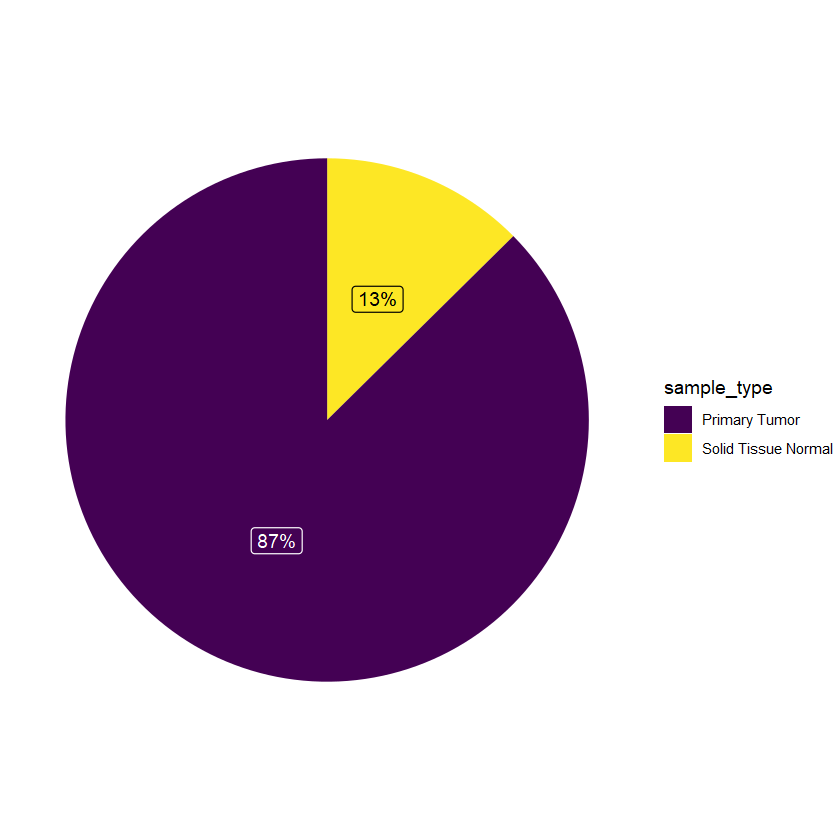

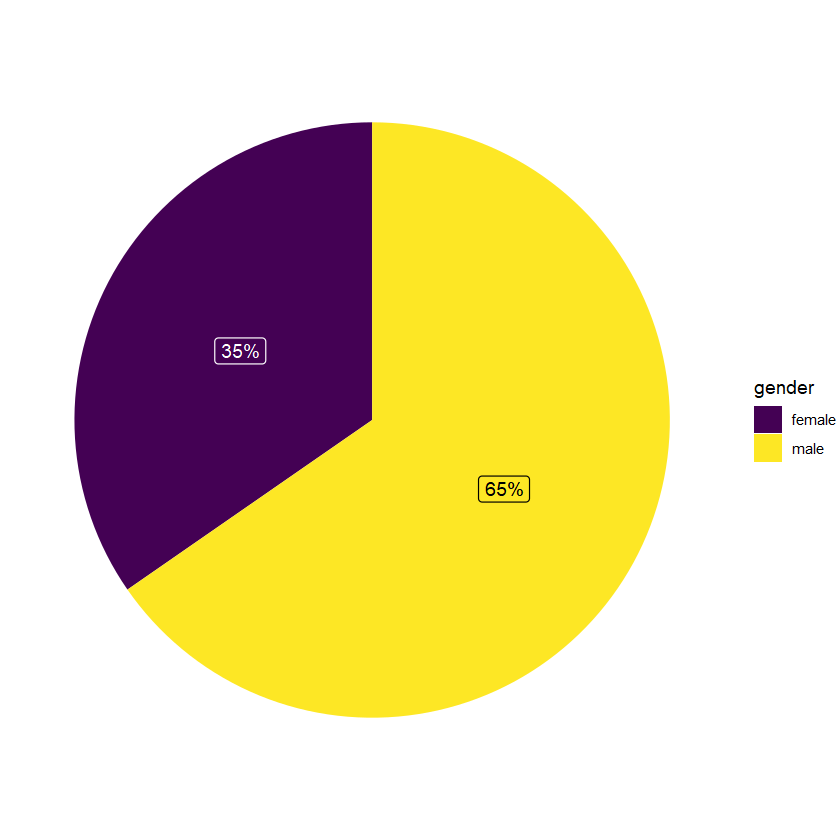

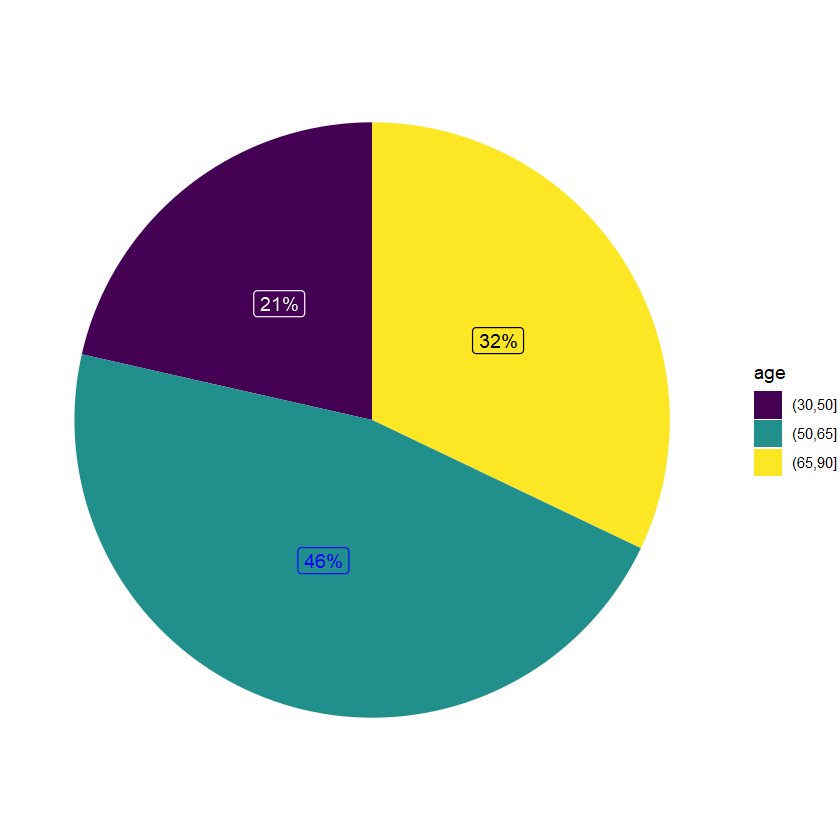

In [57]:
# Meta Data visualation of sample type, gender and age ranges
df_type <- meta %>% 
  dplyr::group_by(sample_type) %>% # Variable to be transformed
  dplyr::count() %>% 
  dplyr::ungroup() %>% 
  dplyr::mutate(perc = `n` / sum(`n`)) %>% 
  dplyr::arrange(perc) %>%
  dplyr::mutate(labels = scales::percent(perc))

ggplot(df_type, aes(x = "", y = perc, fill = sample_type)) +
  geom_col() +
  geom_label(aes(label = labels), color = c("black", "white"),
            position = position_stack(vjust = 0.5),
            show.legend = FALSE) +
  guides(fill = guide_legend(title = "sample_type")) +
  scale_fill_viridis_d() +
  coord_polar(theta = "y") + 
  theme_void()

df_gender <- meta %>% 
  dplyr::group_by(gender) %>% # Variable to be transformed
  dplyr::count() %>% 
  dplyr::ungroup() %>% 
  dplyr::mutate(perc = `n` / sum(`n`)) %>% 
  dplyr::arrange(perc) %>%
  dplyr::mutate(labels = scales::percent(perc))

ggplot(df_gender, aes(x = "", y = perc, fill = gender)) +
  geom_col() +
  geom_label(aes(label = labels), color = c("white", "black"),
            position = position_stack(vjust = 0.5),
            show.legend = FALSE) +
  guides(fill = guide_legend(title = "gender")) +
  scale_fill_viridis_d() +
  coord_polar(theta = "y") + 
  theme_void()


df_age <- meta %>% mutate(age_bins = cut(age_at_index, breaks=c(30, 50, 65, 90)))

df_age <- df_age %>% 
  dplyr::group_by(age_bins) %>% # Variable to be transformed
  dplyr::count() %>% 
  dplyr::ungroup() %>% 
  dplyr::mutate(perc = `n` / sum(`n`)) %>% 
  dplyr::arrange(perc) %>%
  dplyr::mutate(labels = scales::percent(perc))

ggplot(df_age, aes(x = "", y = perc, fill = age_bins)) +
  geom_col() +
  geom_label(aes(label = labels), color = c("white", "black", "blue"),
            position = position_stack(vjust = 0.5),
            show.legend = FALSE) +
  guides(fill = guide_legend(title = "age")) +
  scale_fill_viridis_d() +
  coord_polar(theta = "y") + 
  theme_void()


Warning message:
"The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead."


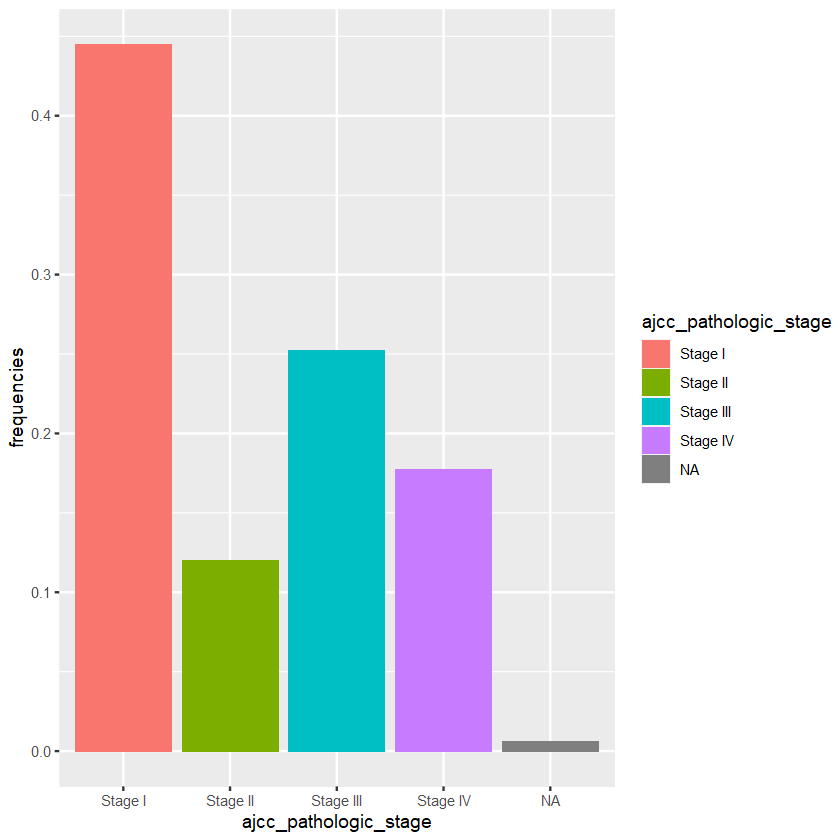

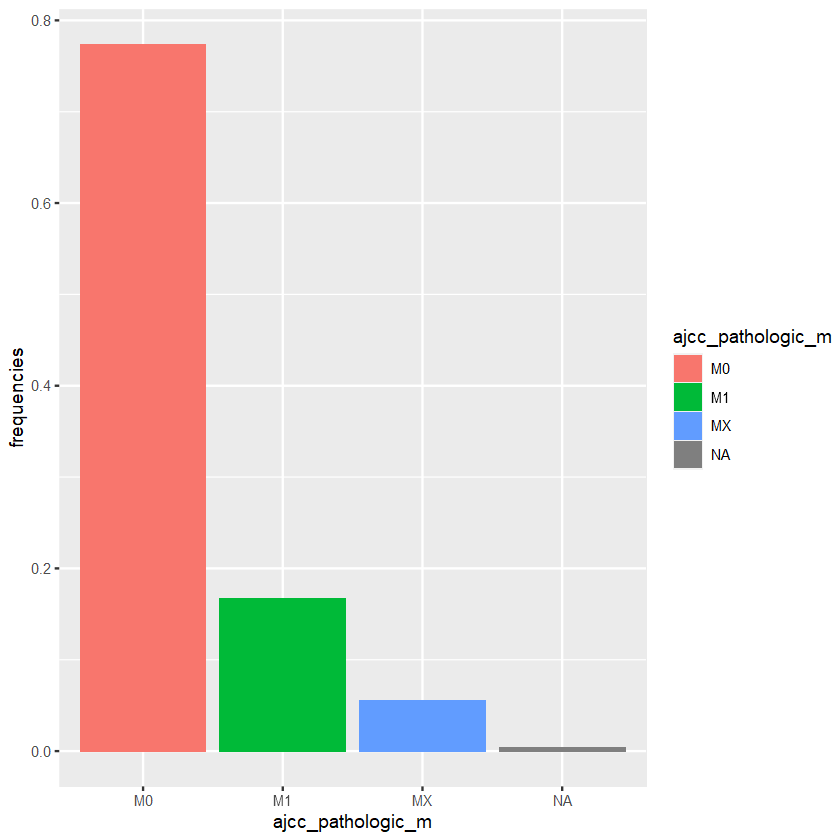

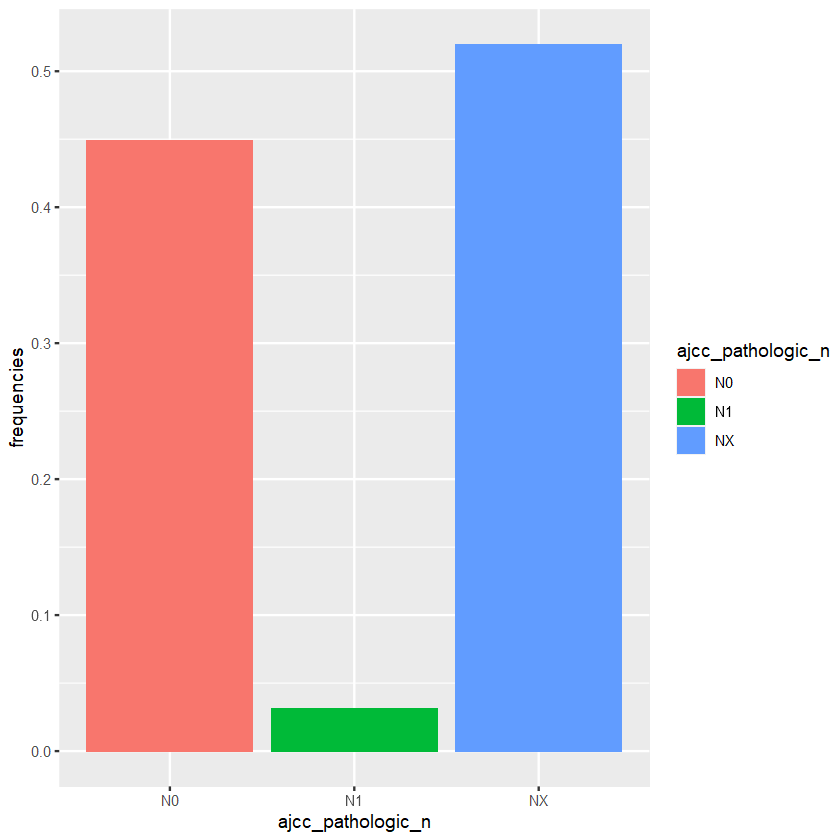

In [58]:
# Meta Data visualation of metastasis and tumor stages
ggplot(meta, aes(x = ajcc_pathologic_stage)) +  
    geom_bar(aes(y = (..count..)/sum(..count..), fill = ajcc_pathologic_stage))+
  ylab("frequencies") 

ggplot(meta, aes(x = ajcc_pathologic_m)) +  
    geom_bar(aes(y = (..count..)/sum(..count..), fill = ajcc_pathologic_m))+
  ylab("frequencies")
 

ggplot(meta, aes(x = ajcc_pathologic_n)) +  
    geom_bar(aes(y = (..count..)/sum(..count..), fill = ajcc_pathologic_n))+
  ylab("frequencies")

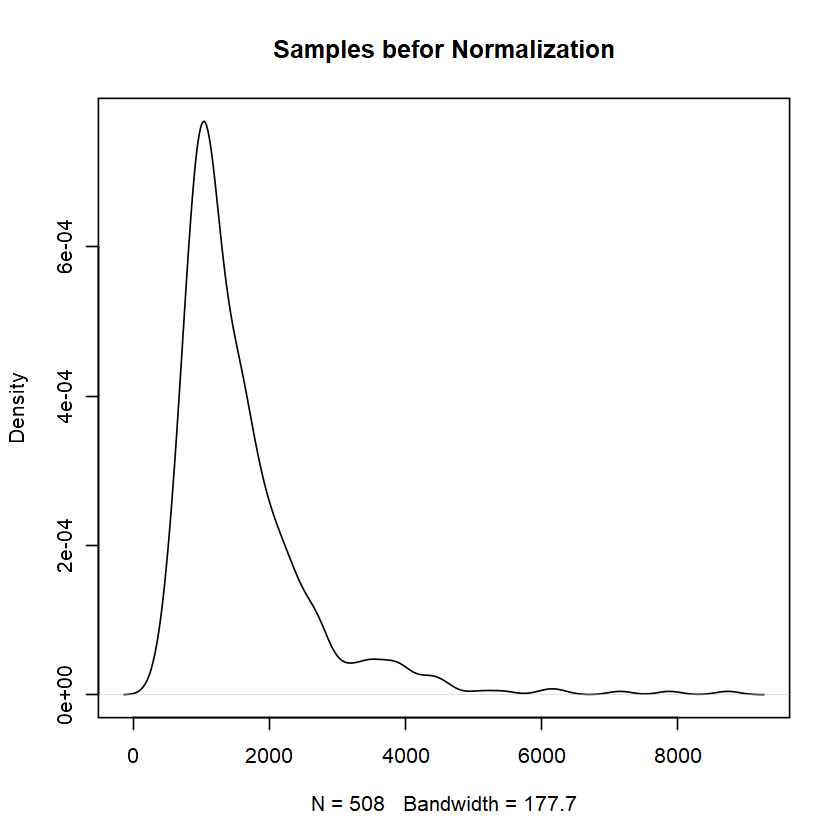

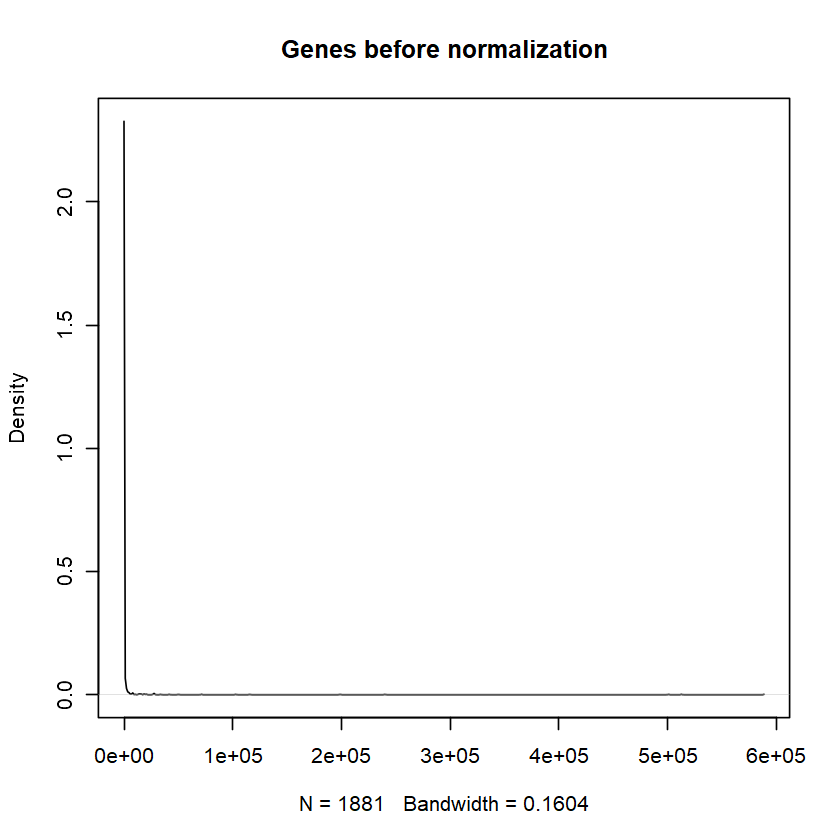

In [59]:
# plot the distribution of data before normalization samples and mirs
plot(density(apply(mir_counts2, 2, mean, na.rm = TRUE)),main='Samples befor Normalization')
plot(density(apply(t(mir_counts2), 2, mean, na.rm = TRUE)),main='miRNA before normalization')

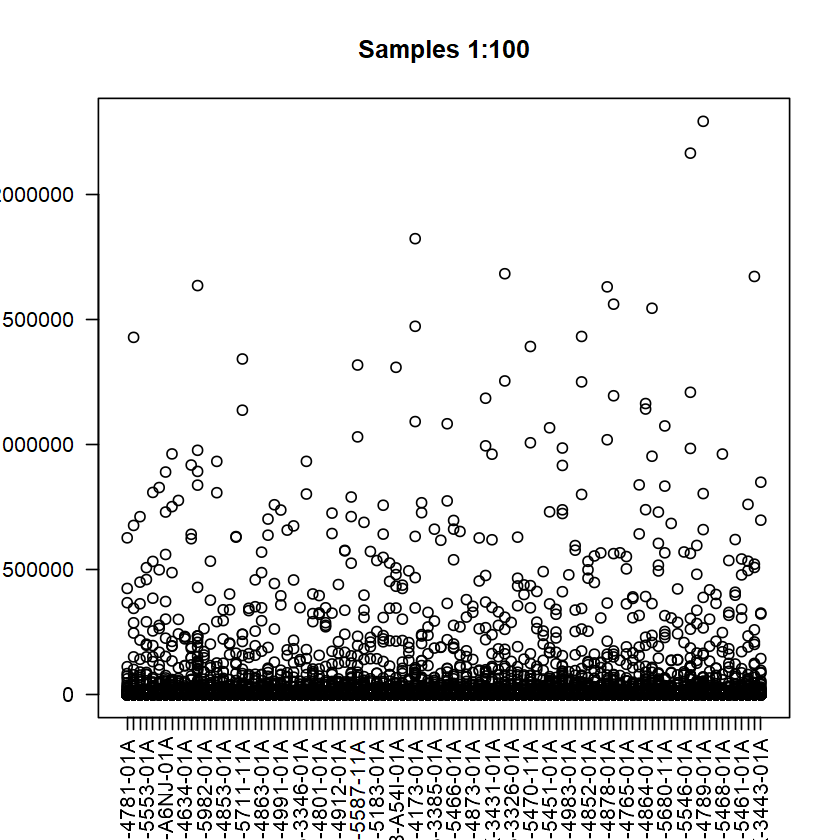

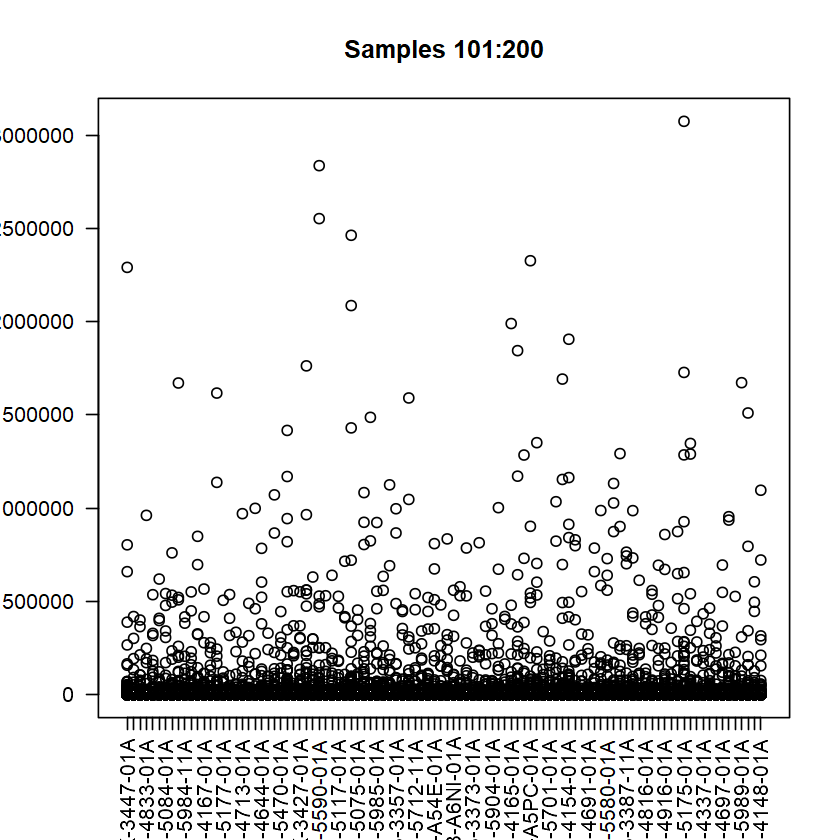

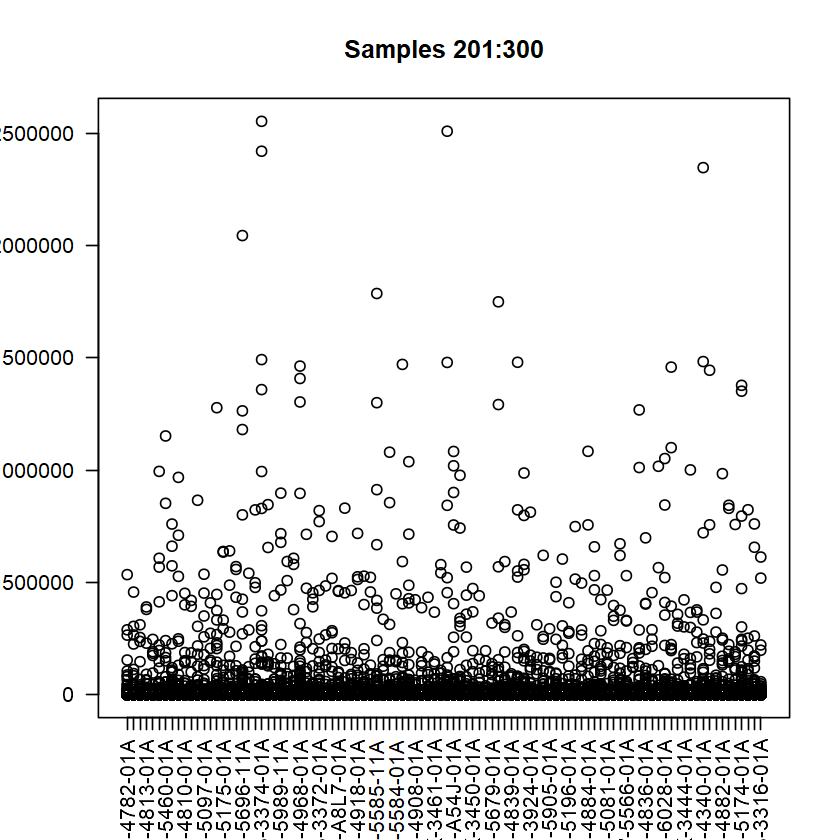

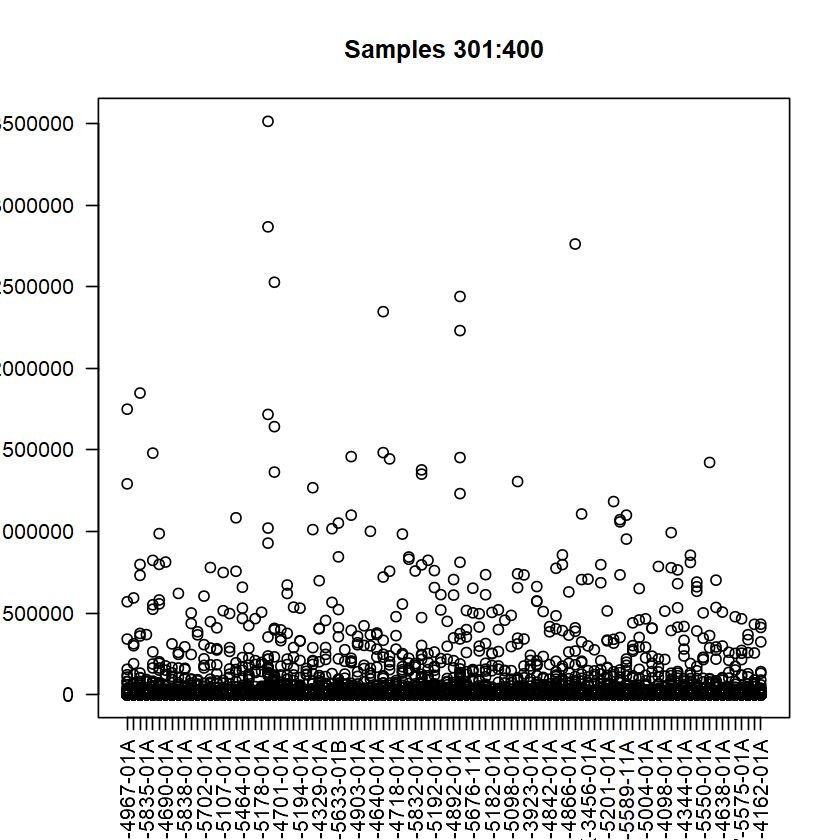

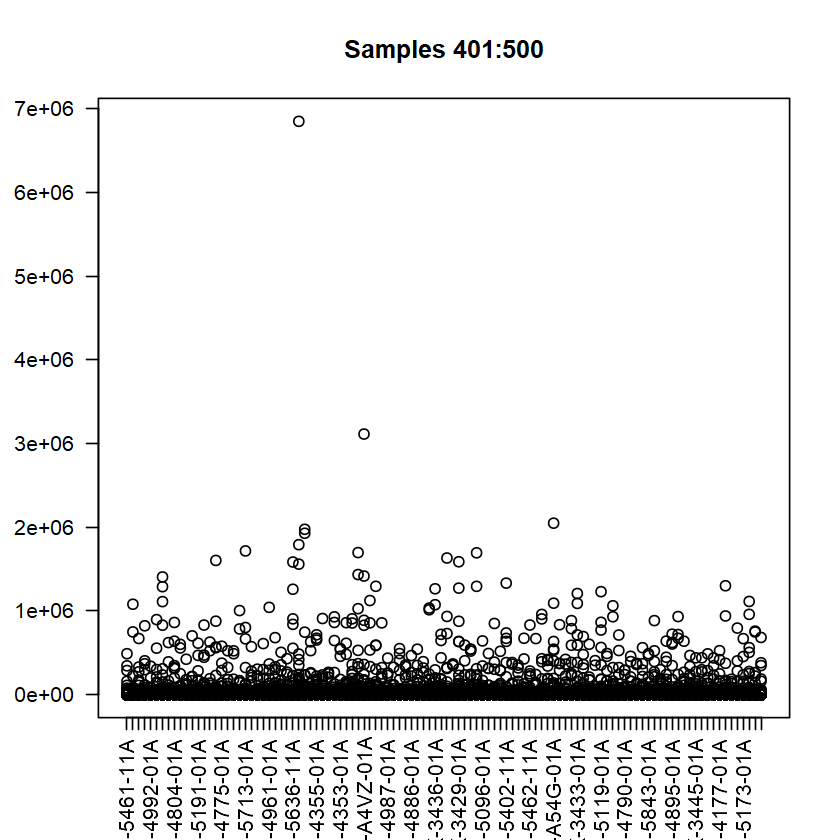

In [61]:
# boplot for the samples of raw data
boxplot(mir_counts2[,1:100], main="Samples 1:100", names=colnames(mir_counts2)[1:100],las=2,
       col = "cyan")
boxplot(mir_counts[,101:200], main="Samples 101:200", names=colnames(mir_counts2)[101:200],las=2,
       col = "cyan")
boxplot(mir_counts2[,201:300], main="Samples 201:300", names=colnames(mir_counts)[201:300],las=2,
       col = "cyan")
boxplot(mir_counts[,301:400], main="Samples 301:400", names=colnames(mir_counts)[301:400],las=2,
       col = "cyan")
boxplot(mir_counts2[,401:508], main="Samples 401:500", names=colnames(mir_counts)[401:508],las=2,
       col = "cyan")



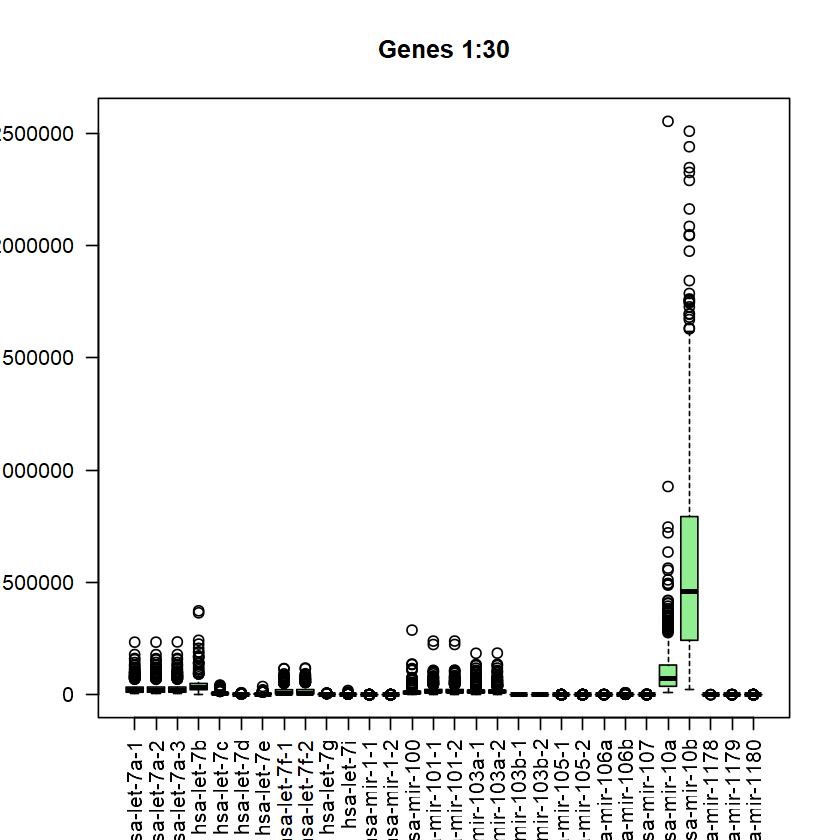

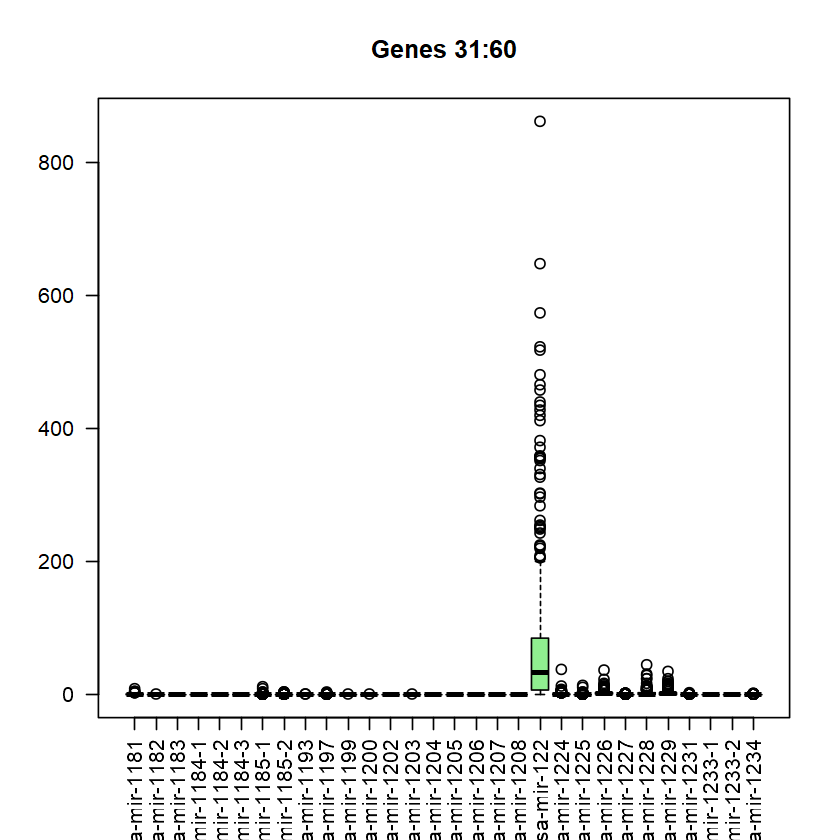

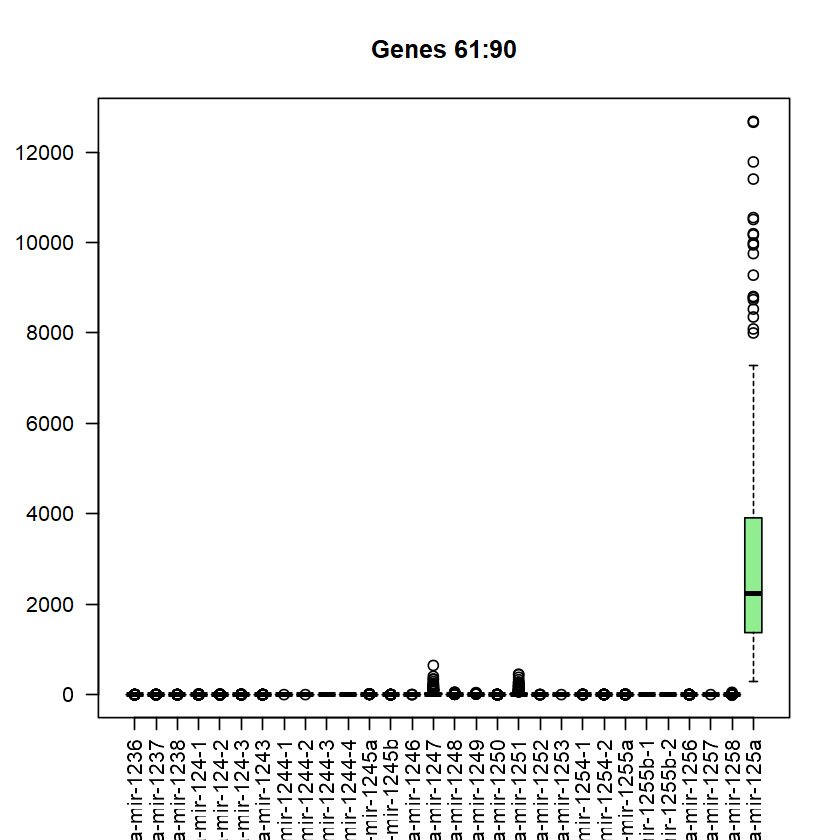

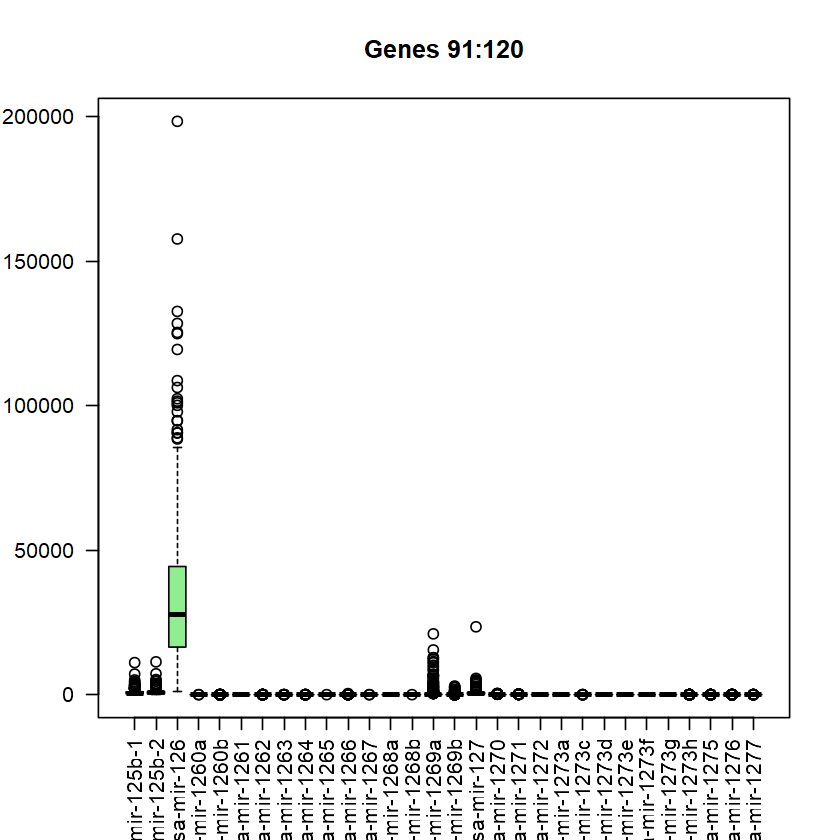

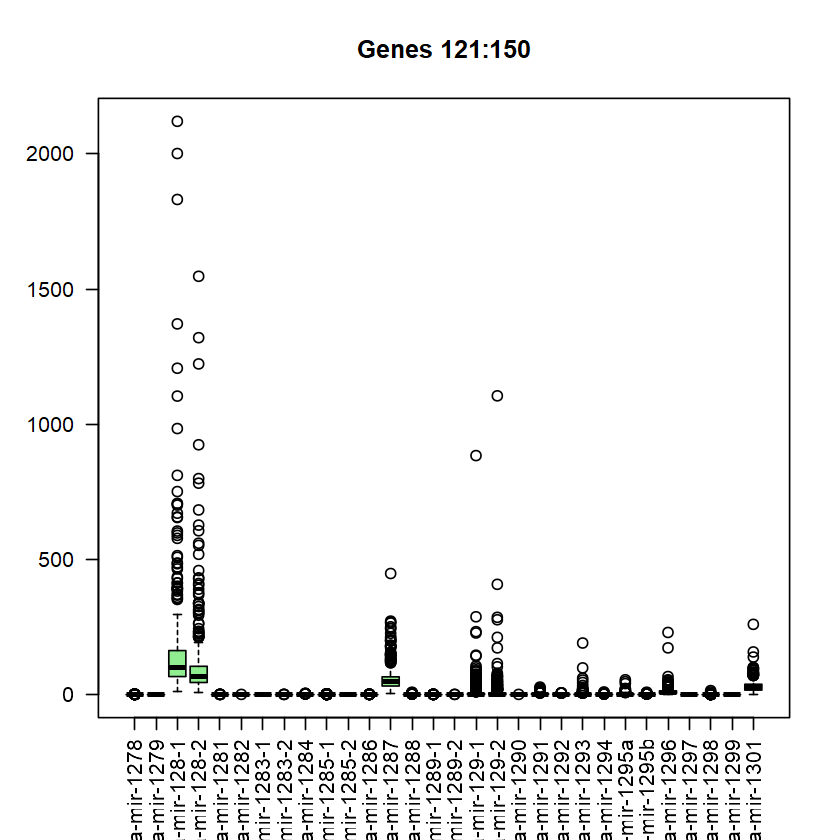

In [62]:
# boplot for the samples of raw data
boxplot(t(mir_counts2)[,1:30], main="miRNA 1:30", names=rownames(mir_counts2)[1:30],las=2,
       col = "lightgreen")
boxplot(t(mir_counts2)[,31:60], main="miRNA 31:60", names=rownames(mir_counts2)[31:60],las=2,
       col = "lightgreen")
boxplot(t(mir_counts2)[,61:90], main="miRNA 61:90", names=rownames(mir_counts)[61:90],las=2,
       col = "lightgreen")
boxplot(t(mir_counts2)[,91:120], main="miRNA 91:120", names=rownames(mir_counts2)[91:120],las=2,
       col = "lightgreen")
boxplot(t(mir_counts2)[,121:150], main="miRNA 121:150", names=rownames(mir_counts2)[121:150],las=2,
       col = "lightgreen")


In [63]:
#PCA of raw data
raw.pca <- prcomp(t(mir_counts2))
summary(raw.pca)

Importance of components:
                             PC1       PC2       PC3       PC4       PC5
Standard deviation     6.286e+05 4.933e+05 2.406e+05 2.096e+05 1.715e+05
Proportion of Variance 5.021e-01 3.091e-01 7.352e-02 5.583e-02 3.737e-02
Cumulative Proportion  5.021e-01 8.112e-01 8.847e-01 9.406e-01 9.779e-01
                             PC6       PC7       PC8       PC9      PC10
Standard deviation     9.213e+04 5.315e+04 4.100e+04 2.929e+04 2.548e+04
Proportion of Variance 1.078e-02 3.590e-03 2.140e-03 1.090e-03 8.200e-04
Cumulative Proportion  9.887e-01 9.923e-01 9.944e-01 9.955e-01 9.963e-01
                            PC11      PC12      PC13      PC14      PC15
Standard deviation     2.349e+04 2.157e+04 1.852e+04 1.574e+04 1.533e+04
Proportion of Variance 7.000e-04 5.900e-04 4.400e-04 3.100e-04 3.000e-04
Cumulative Proportion  9.971e-01 9.977e-01 9.981e-01 9.984e-01 9.987e-01
                            PC16      PC17      PC18      PC19      PC20
Standard deviation     1.

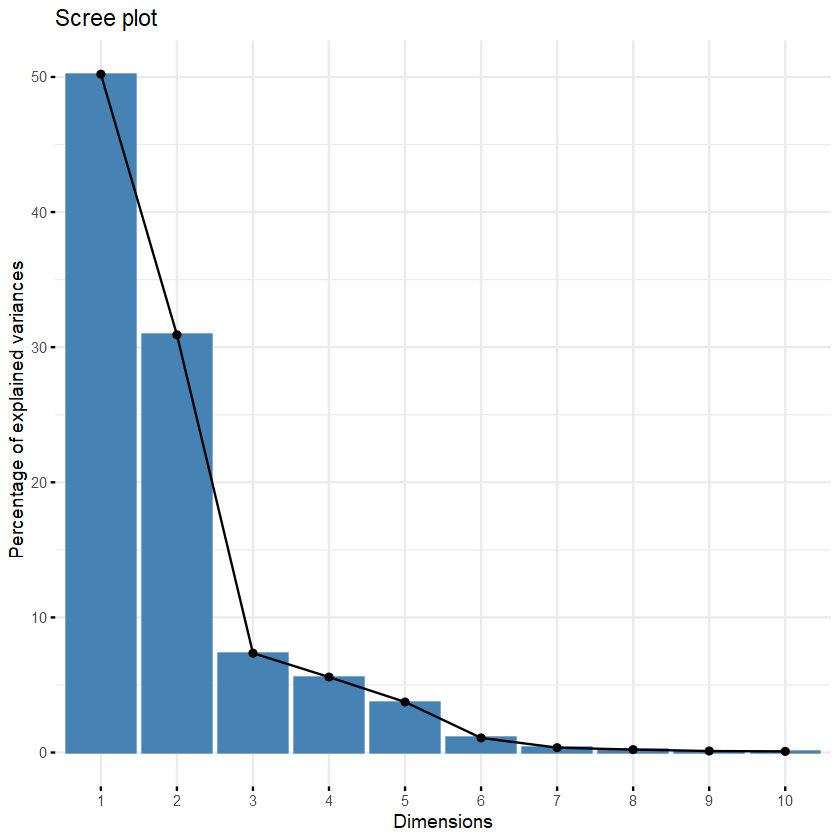

In [64]:
# visualize expained variation across pcs
fviz_eig(raw.pca, col.var="blue")


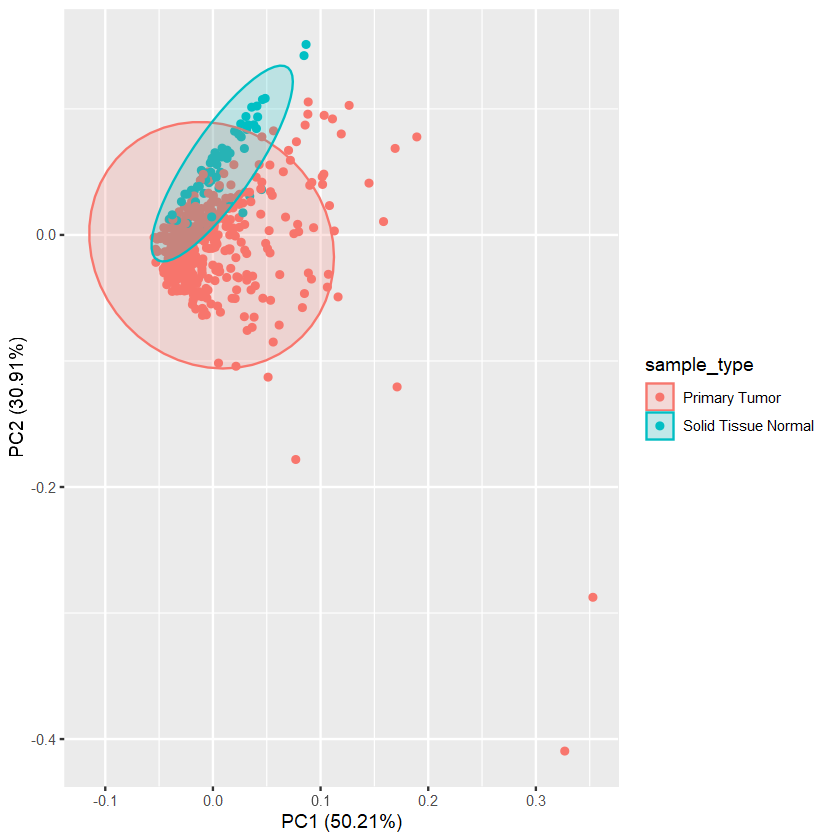

In [65]:
# pca of raw data
autoplot(raw.pca, frame = TRUE, frame.type= "norm", data=meta, colour="sample_type")


### Data cleaning and outlier detection

#### Use cpm(counts) for filtering 


In [7]:
# tpm to be in next steps of filtering of miRNA 
mir_cpm <- cpm(mir_counts2)
head(mir_cpm)

TCGA-BP-4160-01A TCGA-BP-4781-01A TCGA-B0-4821-01A
hsa-let-7a-1  5825.9727        4867.3688       11697.7209      
hsa-let-7a-2  6014.8176        4815.7744       11697.2402      
hsa-let-7a-3  5827.7092        4879.4823       11758.2848      
hsa-let-7b   14818.4615       14165.1244       13420.6671      
hsa-let-7c    2478.4261         774.3643        1230.0235      
hsa-let-7d     854.3602         776.6076         385.0132      
             TCGA-CJ-4872-01A TCGA-B8-5553-01A TCGA-BP-5176-01A
hsa-let-7a-1  5644.2281        7664.945        10462.1191      
hsa-let-7a-2  5693.8319        7556.404        10480.5043      
hsa-let-7a-3  5630.2179        7698.841        10492.4547      
hsa-let-7b   20197.8244       17894.140        21038.8394      
hsa-let-7c    2247.6947        1761.802         3662.6456      
hsa-let-7d     688.3944         888.899          668.9162      
             TCGA-CJ-5671-01A TCGA-A3-A6NJ-01A TCGA-B8-4153-01B
hsa-let-7a-1  7075.9694        7872.1630       14898.4845      
hsa-let-7a-2  7058.2701        7993.5121       14765.2503      
hsa-let-7a-3  7093.3283        8002.1117       14857.2394      
hsa-let-7b   17739.1071       15951.4317       14222.8146      
hsa-let-7c    1806.6884        2238.0305        2903.1560      
hsa-let-7d     504.4296         426.3939         534.4367      
             TCGA-B0-4847-01A ⋯ TCGA-BP-4971-01A TCGA-B0-4945-01A
hsa-let-7a-1 4371.717         ⋯ 11236.3350        6208.6592      
hsa-let-7a-2 4328.819         ⋯ 11218.5696        6135.8230      
hsa-let-7a-3 4431.677         ⋯ 11321.1505        6237.2913      
hsa-let-7b   9836.363         ⋯ 13796.2732       12240.5022      
hsa-let-7c   2920.978         ⋯  1426.9635        2042.4278      
hsa-let-7d   1090.004         ⋯   416.0544         712.7902      
             TCGA-CZ-5452-01A TCGA-CZ-5452-11A TCGA-AS-3777-01A
hsa-let-7a-1 16060.6768       13549.4082        5360.0076      
hsa-let-7a-2 16196.4387       13479.3874        5255.8726      
hsa-let-7a-3 16188.8730       13512.7428        5361.9724      
hsa-let-7b   16391.8854        7126.5905       16912.1208      
hsa-let-7c     941.9271        2359.0647        1544.3424      
hsa-let-7d     726.3052         353.4141         397.8745      
             TCGA-DV-A4VX-01A TCGA-B0-4838-01A TCGA-B0-5399-01A
hsa-let-7a-1 7212.8150         5357.845        14877.0676      
hsa-let-7a-2 7098.7662         5341.846        14924.3894      
hsa-let-7a-3 7174.5052         5527.264        14968.8944      
hsa-let-7b   6827.0747        16310.639        13215.9227      
hsa-let-7c   1184.9625         3017.967         3760.0162      
hsa-let-7d    265.0864          733.468          544.5761      
             TCGA-BP-4163-01A TCGA-AK-3451-01A
hsa-let-7a-1  6548.678         9518.9139      
hsa-let-7a-2  6559.924         9719.4163      
hsa-let-7a-3  6607.016         9652.9947      
hsa-let-7b   23005.419        13716.6752      
hsa-let-7c    1112.650          936.5030      
hsa-let-7d     463.194          350.6729

### 1- Remove Zero variance genes

In [8]:
# apply variance on mirs
mir_var=apply(mir_cpm, 1, var, na.rm = T)
mir_var

hsa-let-7a-1    hsa-let-7a-2    hsa-let-7a-3      hsa-let-7b      hsa-let-7c 
   1.723024e+07    1.719845e+07    1.732751e+07    4.140195e+07    9.678916e+05 
     hsa-let-7d      hsa-let-7e    hsa-let-7f-1    hsa-let-7f-2      hsa-let-7g 
   5.131260e+04    5.117683e+05    1.730617e+07    1.809485e+07    8.625858e+04 
     hsa-let-7i     hsa-mir-1-1     hsa-mir-1-2     hsa-mir-100   hsa-mir-101-1 
   4.217700e+04    1.078289e+02    1.130231e+02    2.465538e+07    1.033591e+07 
  hsa-mir-101-2  hsa-mir-103a-1  hsa-mir-103a-2  hsa-mir-103b-1  hsa-mir-103b-2 
   1.032720e+07    9.510546e+06    9.513220e+06    0.000000e+00    0.000000e+00 
  hsa-mir-105-1   hsa-mir-105-2    hsa-mir-106a    hsa-mir-106b     hsa-mir-107 
   2.453853e+02    2.510983e+02    1.556213e+02    1.982018e+04    5.950918e+02 
    hsa-mir-10a     hsa-mir-10b    hsa-mir-1178    hsa-mir-1179    hsa-mir-1180 
   6.697299e+08    7.822318e+09    2.588172e-03    9.698530e-02    6.443519e+01 
   hsa-mir-1181    hsa-mir-1182    hsa-mir-1183  hsa-mir-1184-1  hsa-mir-1184-2 
   4.628747e-02    4.512874e-04    0.000000e+00    0.000000e+00    0.000000e+00 
 hsa-mir-1184-3  hsa-mir-1185-1  hsa-mir-1185-2    hsa-mir-1193    hsa-mir-1197 
   0.000000e+00    1.415949e-01    5.342044e-02    5.850657e-04    3.605431e-02 
   hsa-mir-1199    hsa-mir-1200    hsa-mir-1202    hsa-mir-1203    hsa-mir-1204 
   6.913686e-04    2.489166e-05    0.000000e+00    4.101675e-04    1.012008e-04 
   hsa-mir-1205    hsa-mir-1206    hsa-mir-1207    hsa-mir-1208     hsa-mir-122 
   0.000000e+00    0.000000e+00    0.000000e+00    0.000000e+00    1.321832e+03 
   hsa-mir-1224    hsa-mir-1225    hsa-mir-1226    hsa-mir-1227    hsa-mir-1228 
   3.162567e-01    2.891737e-01    7.883716e-01    4.402594e-02    1.045826e+00 
   hsa-mir-1229    hsa-mir-1231  hsa-mir-1233-1  hsa-mir-1233-2    hsa-mir-1234 
   1.160231e+00    1.515730e-02    0.000000e+00    0.000000e+00    1.289693e-02 
   hsa-mir-1236    hsa-mir-1237    hsa-mir-1238   hsa-mir-124-1   hsa-mir-124-2 
   1.627760e-02    1.768755e-02    8.860274e-03    1.611518e-01    1.391777e-01 
  hsa-mir-124-3    hsa-mir-1243  hsa-mir-1244-1  hsa-mir-1244-2  hsa-mir-1244-3 
   1.226884e-01    2.587797e-02    1.050946e-03    6.416222e-05    0.000000e+00 
 hsa-mir-1244-4   hsa-mir-1245a   hsa-mir-1245b    hsa-mir-1246    hsa-mir-1247 
   0.000000e+00    9.676394e-01    7.142850e-03    8.122713e-03    5.900097e+02 
   hsa-mir-1248    hsa-mir-1249    hsa-mir-1250    hsa-mir-1251    hsa-mir-1252 
   5.153253e+00    1.818693e+00    3.637936e-02    3.033146e+02    9.057037e-03 
   hsa-mir-1253  hsa-mir-1254-1  hsa-mir-1254-2   hsa-mir-1255a hsa-mir-1255b-1 
   3.481791e-04    1.273066e-01    1.021236e-01    1.696788e-01    0.000000e+00 
hsa-mir-1255b-2    hsa-mir-1256    hsa-mir-1257    hsa-mir-1258    hsa-mir-125a 
   0.000000e+00    3.178840e-02    1.198076e-04    6.705983e-01    1.567139e+05 
 hsa-mir-125b-1  hsa-mir-125b-2     hsa-mir-126   hsa-mir-1260a   hsa-mir-1260b 
   2.920753e+04    3.112243e+04    4.591392e+07    2.379966e-04    1.544755e-02 
   hsa-mir-1261    hsa-mir-1262    hsa-mir-1263    hsa-mir-1264    hsa-mir-1265 
   0.000000e+00    1.016784e+00    2.486130e-03    4.931103e-03    8.114104e-04 
   hsa-mir-1266    hsa-mir-1267   hsa-mir-1268a   hsa-mir-1268b   hsa-mir-1269a 
   1.269744e+01    7.599919e-04    0.000000e+00    9.364532e-06    7.414218e+05 
  hsa-mir-1269b     hsa-mir-127    hsa-mir-1270    hsa-mir-1271    hsa-mir-1272 
   9.145450e+03    3.605819e+05    4.078621e+02    9.295839e+01    3.701686e-04 
  hsa-mir-1273a   hsa-mir-1273c   hsa-mir-1273d   hsa-mir-1273e   hsa-mir-1273f 
   0.000000e+00    1.812158e-03    0.000000e+00    0.000000e+00    0.000000e+00 
  hsa-mir-1273g   hsa-mir-1273h    hsa-mir-1275    hsa-mir-1276    hsa-mir-1277 
   0.000000e+00    3.062527e-02    1.549398e-01    3.507368e-02    2.534009e+00 
   hsa-mir-1278    hsa-mir-1279   hsa-mir-128-1   hsa-mir-128-2    hsa-mir-1281 
   1.483056e-02    0.000000e+00   

In [9]:
# calculate the variance across mirs
zeroVarmir <- (mir_var == 0 | is.na(mir_var))
sum(zeroVarmir)

[1] 380

In [10]:
# remove zero variance genes from expression data
mir_cpm <- mir_cpm[!zeroVarmir,]
dim(mir_cpm)
head(mir_cpm)

[1] 1501  590

TCGA-BP-4160-01A TCGA-BP-4781-01A TCGA-B0-4821-01A
hsa-let-7a-1  5825.9727        4867.3688       11697.7209      
hsa-let-7a-2  6014.8176        4815.7744       11697.2402      
hsa-let-7a-3  5827.7092        4879.4823       11758.2848      
hsa-let-7b   14818.4615       14165.1244       13420.6671      
hsa-let-7c    2478.4261         774.3643        1230.0235      
hsa-let-7d     854.3602         776.6076         385.0132      
             TCGA-CJ-4872-01A TCGA-B8-5553-01A TCGA-BP-5176-01A
hsa-let-7a-1  5644.2281        7664.945        10462.1191      
hsa-let-7a-2  5693.8319        7556.404        10480.5043      
hsa-let-7a-3  5630.2179        7698.841        10492.4547      
hsa-let-7b   20197.8244       17894.140        21038.8394      
hsa-let-7c    2247.6947        1761.802         3662.6456      
hsa-let-7d     688.3944         888.899          668.9162      
             TCGA-CJ-5671-01A TCGA-A3-A6NJ-01A TCGA-B8-4153-01B
hsa-let-7a-1  7075.9694        7872.1630       14898.4845      
hsa-let-7a-2  7058.2701        7993.5121       14765.2503      
hsa-let-7a-3  7093.3283        8002.1117       14857.2394      
hsa-let-7b   17739.1071       15951.4317       14222.8146      
hsa-let-7c    1806.6884        2238.0305        2903.1560      
hsa-let-7d     504.4296         426.3939         534.4367      
             TCGA-B0-4847-01A ⋯ TCGA-BP-4971-01A TCGA-B0-4945-01A
hsa-let-7a-1 4371.717         ⋯ 11236.3350        6208.6592      
hsa-let-7a-2 4328.819         ⋯ 11218.5696        6135.8230      
hsa-let-7a-3 4431.677         ⋯ 11321.1505        6237.2913      
hsa-let-7b   9836.363         ⋯ 13796.2732       12240.5022      
hsa-let-7c   2920.978         ⋯  1426.9635        2042.4278      
hsa-let-7d   1090.004         ⋯   416.0544         712.7902      
             TCGA-CZ-5452-01A TCGA-CZ-5452-11A TCGA-AS-3777-01A
hsa-let-7a-1 16060.6768       13549.4082        5360.0076      
hsa-let-7a-2 16196.4387       13479.3874        5255.8726      
hsa-let-7a-3 16188.8730       13512.7428        5361.9724      
hsa-let-7b   16391.8854        7126.5905       16912.1208      
hsa-let-7c     941.9271        2359.0647        1544.3424      
hsa-let-7d     726.3052         353.4141         397.8745      
             TCGA-DV-A4VX-01A TCGA-B0-4838-01A TCGA-B0-5399-01A
hsa-let-7a-1 7212.8150         5357.845        14877.0676      
hsa-let-7a-2 7098.7662         5341.846        14924.3894      
hsa-let-7a-3 7174.5052         5527.264        14968.8944      
hsa-let-7b   6827.0747        16310.639        13215.9227      
hsa-let-7c   1184.9625         3017.967         3760.0162      
hsa-let-7d    265.0864          733.468          544.5761      
             TCGA-BP-4163-01A TCGA-AK-3451-01A
hsa-let-7a-1  6548.678         9518.9139      
hsa-let-7a-2  6559.924         9719.4163      
hsa-let-7a-3  6607.016         9652.9947      
hsa-let-7b   23005.419        13716.6752      
hsa-let-7c    1112.650          936.5030      
hsa-let-7d     463.194          350.6729

### 2- Remove mirna with low counts

In [11]:
# filter rows to keep only rows that have at least 10 reads total
keep <- rowSums(mir_cpm) >= 10
mir_cpm <- mir_cpm[keep,]
dim(mir_cpm)

[1] 1035  590

### 3- Remove 10% genes of lowest variations

In [12]:
# get the variance across mirs and store this in data frame
mir_var2=apply(mir_cpm, 1, var, na.rm = T)
mir_var2
mir_var_df = as.data.frame(mir_var2)
mir_var_df["mir"] = rownames(mir_var_df)
rownames(mir_var_df) = c(1:dim(mir_var_df)[1])
mir_var_df

hsa-let-7a-1    hsa-let-7a-2    hsa-let-7a-3      hsa-let-7b      hsa-let-7c 
   1.723024e+07    1.719845e+07    1.732751e+07    4.140195e+07    9.678916e+05 
     hsa-let-7d      hsa-let-7e    hsa-let-7f-1    hsa-let-7f-2      hsa-let-7g 
   5.131260e+04    5.117683e+05    1.730617e+07    1.809485e+07    8.625858e+04 
     hsa-let-7i     hsa-mir-1-1     hsa-mir-1-2     hsa-mir-100   hsa-mir-101-1 
   4.217700e+04    1.078289e+02    1.130231e+02    2.465538e+07    1.033591e+07 
  hsa-mir-101-2  hsa-mir-103a-1  hsa-mir-103a-2   hsa-mir-105-1   hsa-mir-105-2 
   1.032720e+07    9.510546e+06    9.513220e+06    2.453853e+02    2.510983e+02 
   hsa-mir-106a    hsa-mir-106b     hsa-mir-107     hsa-mir-10a     hsa-mir-10b 
   1.556213e+02    1.982018e+04    5.950918e+02    6.697299e+08    7.822318e+09 
   hsa-mir-1179    hsa-mir-1180    hsa-mir-1181  hsa-mir-1185-1  hsa-mir-1185-2 
   9.698530e-02    6.443519e+01    4.628747e-02    1.415949e-01    5.342044e-02 
   hsa-mir-1197     hsa-mir-122    hsa-mir-1224    hsa-mir-1225    hsa-mir-1226 
   3.605431e-02    1.321832e+03    3.162567e-01    2.891737e-01    7.883716e-01 
   hsa-mir-1227    hsa-mir-1228    hsa-mir-1229    hsa-mir-1231    hsa-mir-1234 
   4.402594e-02    1.045826e+00    1.160231e+00    1.515730e-02    1.289693e-02 
   hsa-mir-1236    hsa-mir-1237    hsa-mir-1238   hsa-mir-124-1   hsa-mir-124-2 
   1.627760e-02    1.768755e-02    8.860274e-03    1.611518e-01    1.391777e-01 
  hsa-mir-124-3    hsa-mir-1243   hsa-mir-1245a    hsa-mir-1247    hsa-mir-1248 
   1.226884e-01    2.587797e-02    9.676394e-01    5.900097e+02    5.153253e+00 
   hsa-mir-1249    hsa-mir-1250    hsa-mir-1251  hsa-mir-1254-1  hsa-mir-1254-2 
   1.818693e+00    3.637936e-02    3.033146e+02    1.273066e-01    1.021236e-01 
  hsa-mir-1255a    hsa-mir-1256    hsa-mir-1258    hsa-mir-125a  hsa-mir-125b-1 
   1.696788e-01    3.178840e-02    6.705983e-01    1.567139e+05    2.920753e+04 
 hsa-mir-125b-2     hsa-mir-126   hsa-mir-1260b    hsa-mir-1262    hsa-mir-1266 
   3.112243e+04    4.591392e+07    1.544755e-02    1.016784e+00    1.269744e+01 
  hsa-mir-1269a   hsa-mir-1269b     hsa-mir-127    hsa-mir-1270    hsa-mir-1271 
   7.414218e+05    9.145450e+03    3.605819e+05    4.078621e+02    9.295839e+01 
  hsa-mir-1273h    hsa-mir-1275    hsa-mir-1276    hsa-mir-1277    hsa-mir-1278 
   3.062527e-02    1.549398e-01    3.507368e-02    2.534009e+00    1.483056e-02 
  hsa-mir-128-1   hsa-mir-128-2    hsa-mir-1284  hsa-mir-1285-1    hsa-mir-1287 
   1.447308e+03    6.387518e+02    7.714536e-02    6.544835e-02    1.236104e+02 
   hsa-mir-1288   hsa-mir-129-1   hsa-mir-129-2    hsa-mir-1291    hsa-mir-1292 
   1.529316e-01    1.437860e+02    2.107593e+02    1.125820e+00    2.253460e-01 
   hsa-mir-1293    hsa-mir-1294   hsa-mir-1295a   hsa-mir-1295b    hsa-mir-1296 
   1.034861e+01    7.814280e-02    1.384802e+00    1.535388e-01    1.002333e+01 
   hsa-mir-1298    hsa-mir-1301  hsa-mir-1302-3    hsa-mir-1303    hsa-mir-1304 
   6.880279e-02    3.795877e+01    1.253374e-02    1.402486e-02    7.349833e-01 
   hsa-mir-1305    hsa-mir-1306    hsa-mir-1307    hsa-mir-130a    hsa-mir-130b 
   2.582963e-01    1.133403e+01    2.879559e+05    2.777633e+03    1.163879e+02 
    hsa-mir-132  hsa-mir-133a-1  hsa-mir-133a-2    hsa-mir-133b     hsa-mir-134 
   8.500921e+02    2.237705e+01    2.055736e+01    3.540381e+00    2.555104e+05 
   hsa-mir-1343  hsa-mir-135a-1  hsa-mir-135a-2    hsa-mir-135b     hsa-mir-136 
   1.856887e-01    1.584030e+02    1.903191e+02    2.511336e+02    6.183925e+02 
    hsa-mir-137   hsa-mir-138-1   hsa-mir-138-2     hsa-mir-139     hsa-mir-140 
   1.175295e+02    1.515459e+01    7.870699e+00    9.633742e+03    8.715035e+05 
    hsa-mir-141     hsa-mir-142     hsa-mir-143     hsa-mir-144     hsa-mir-145 
   5.186627e+04    7.733419e+06    2.514300e+09    4.516471e+05    3.544940e+06 
   hsa-mir-1468    hsa-mir-146a    hsa-mir-146b    hsa-mir-147b    hsa-mir-148a 
   6.592843e+01    7.069123e+03   

mir_var2     mir           
1    1.723024e+07 hsa-let-7a-1  
2    1.719845e+07 hsa-let-7a-2  
3    1.732751e+07 hsa-let-7a-3  
4    4.140195e+07 hsa-let-7b    
5    9.678916e+05 hsa-let-7c    
6    5.131260e+04 hsa-let-7d    
7    5.117683e+05 hsa-let-7e    
8    1.730617e+07 hsa-let-7f-1  
9    1.809485e+07 hsa-let-7f-2  
10   8.625858e+04 hsa-let-7g    
11   4.217700e+04 hsa-let-7i    
12   1.078289e+02 hsa-mir-1-1   
13   1.130231e+02 hsa-mir-1-2   
14   2.465538e+07 hsa-mir-100   
15   1.033591e+07 hsa-mir-101-1 
16   1.032720e+07 hsa-mir-101-2 
17   9.510546e+06 hsa-mir-103a-1
18   9.513220e+06 hsa-mir-103a-2
19   2.453853e+02 hsa-mir-105-1 
20   2.510983e+02 hsa-mir-105-2 
21   1.556213e+02 hsa-mir-106a  
22   1.982018e+04 hsa-mir-106b  
23   5.950918e+02 hsa-mir-107   
24   6.697299e+08 hsa-mir-10a   
25   7.822318e+09 hsa-mir-10b   
26   9.698530e-02 hsa-mir-1179  
27   6.443519e+01 hsa-mir-1180  
28   4.628747e-02 hsa-mir-1181  
29   1.415949e-01 hsa-mir-1185-1
30   5.342044e-02 hsa-mir-1185-2
⋮    ⋮            ⋮             
1006 5.999670e+02 hsa-mir-885   
1007 1.642057e+01 hsa-mir-887   
1008 4.743962e+02 hsa-mir-888   
1009 1.236170e+02 hsa-mir-889   
1010 8.697726e+00 hsa-mir-890   
1011 2.419573e+07 hsa-mir-891a  
1012 1.717061e+03 hsa-mir-891b  
1013 3.221844e+03 hsa-mir-892a  
1014 8.083953e+01 hsa-mir-892b  
1015 4.221733e+01 hsa-mir-892c  
1016 4.753570e+06 hsa-mir-9-1   
1017 4.737491e+06 hsa-mir-9-2   
1018 4.781018e+06 hsa-mir-9-3   
1019 1.671375e+06 hsa-mir-92a-1 
1020 1.346783e+06 hsa-mir-92a-2 
1021 9.830916e+02 hsa-mir-92b   
1022 2.380227e+06 hsa-mir-93    
1023 6.773832e+00 hsa-mir-934   
1024 2.504397e+01 hsa-mir-935   
1025 6.317020e-01 hsa-mir-937   
1026 2.614659e-01 hsa-mir-939   
1027 1.510729e+00 hsa-mir-940   
1028 9.086296e+00 hsa-mir-942   
1029 1.301541e-02 hsa-mir-943   
1030 2.471192e-01 hsa-mir-944   
1031 9.747770e+00 hsa-mir-95    
1032 1.190893e+02 hsa-mir-96    
1033 5.857459e+02 hsa-mir-98    
1034 1.230642e+05 hsa-mir-99a   
1035 1.827351e+08 hsa-mir-99b

In [13]:
# ordering the var_df by variance from low to high
mir_var_df = mir_var_df[order(mir_var_df$mir_var2),]
mir_var_df 

mir_var2    mir            
833  0.006440137 hsa-mir-670    
363  0.007097246 hsa-mir-3622b  
947  0.007223043 hsa-mir-6873   
705  0.007357099 hsa-mir-548ar  
656  0.007777754 hsa-mir-5087   
534  0.007855177 hsa-mir-4673   
478  0.008000485 hsa-mir-4489   
748  0.008071272 hsa-mir-564    
754  0.008092524 hsa-mir-5692a-1
988  0.008141662 hsa-mir-7703   
136  0.008179115 hsa-mir-1539   
555  0.008250974 hsa-mir-4710   
616  0.008332197 hsa-mir-4799   
508  0.008336117 hsa-mir-4635   
609  0.008374230 hsa-mir-4789   
437  0.008462295 hsa-mir-3945   
417  0.008608480 hsa-mir-3911   
247  0.008638596 hsa-mir-302a   
724  0.008698419 hsa-mir-548t   
485  0.008743895 hsa-mir-4505   
592  0.008760125 hsa-mir-4767   
595  0.008768243 hsa-mir-4771-2 
159  0.008778415 hsa-mir-1908   
926  0.008828533 hsa-mir-6836   
160  0.008831424 hsa-mir-1909   
43   0.008860274 hsa-mir-1238   
601  0.008934479 hsa-mir-4779   
801  0.008970359 hsa-mir-642b   
542  0.009050376 hsa-mir-4684   
299  0.009167582 hsa-mir-3180-4 
⋮    ⋮           ⋮              
151      5065339 hsa-mir-183    
230      5083130 hsa-mir-25     
199      5157749 hsa-mir-210    
117      7733419 hsa-mir-142    
241      8116876 hsa-mir-29a    
17       9510546 hsa-mir-103a-1 
18       9513220 hsa-mir-103a-2 
16      10327200 hsa-mir-101-2  
15      10335914 hsa-mir-101-1  
256     13000169 hsa-mir-30d    
2       17198450 hsa-let-7a-2   
1       17230237 hsa-let-7a-1   
8       17306169 hsa-let-7f-1   
3       17327513 hsa-let-7a-3   
9       18094852 hsa-let-7f-2   
1011    24195730 hsa-mir-891a   
14      24655381 hsa-mir-100    
4       41401950 hsa-let-7b     
257     42736387 hsa-mir-30e    
62      45913920 hsa-mir-126    
169     60663237 hsa-mir-192    
150     82267173 hsa-mir-182    
1035   182735108 hsa-mir-99b    
125    499799872 hsa-mir-148a   
24     669729901 hsa-mir-10a    
216    829025508 hsa-mir-22     
118   2514300041 hsa-mir-143    
252   4833852017 hsa-mir-30a    
25    7822317647 hsa-mir-10b    
198  11376016185 hsa-mir-21

In [14]:
# remove 20% of the genes of lowest variation
mir_var_more20 = mir_var_df[as.integer(0.20*dim(mir_var_df)[1]):dim(mir_var_df)[1],]
dim(mir_var_df)
dim(mir_var_more20)
head(mir_var_more20)

[1] 1035    2

[1] 829   2

mir_var2   mir          
545 0.02758775 hsa-mir-4690 
262 0.02760940 hsa-mir-3124 
836 0.02779146 hsa-mir-6715b
851 0.02805632 hsa-mir-6735 
540 0.02936328 hsa-mir-4680 
848 0.02960317 hsa-mir-6731

In [15]:
mir_var_more20$mir

[1] "hsa-mir-4690"    "hsa-mir-3124"    "hsa-mir-6715b"   "hsa-mir-6735"   
  [5] "hsa-mir-4680"    "hsa-mir-6731"    "hsa-mir-6746"    "hsa-mir-6764"   
  [9] "hsa-mir-6805"    "hsa-mir-4469"    "hsa-mir-3137"    "hsa-mir-1273h"  
 [13] "hsa-mir-3611"    "hsa-mir-6839"    "hsa-mir-6726"    "hsa-mir-548d-1" 
 [17] "hsa-mir-3145"    "hsa-mir-549a"    "hsa-mir-4639"    "hsa-mir-5584"   
 [21] "hsa-mir-1256"    "hsa-mir-5580"    "hsa-mir-4511"    "hsa-mir-2115"   
 [25] "hsa-mir-6851"    "hsa-mir-4470"    "hsa-mir-490"     "hsa-mir-6741"   
 [29] "hsa-mir-6883"    "hsa-mir-4659a"   "hsa-mir-6766"    "hsa-mir-6858"   
 [33] "hsa-mir-6505"    "hsa-mir-1276"    "hsa-mir-6748"    "hsa-mir-3140"   
 [37] "hsa-mir-516a-1"  "hsa-mir-6515"    "hsa-mir-1197"    "hsa-mir-1250"   
 [41] "hsa-mir-6743"    "hsa-mir-7974"    "hsa-mir-4753"    "hsa-mir-3680-2" 
 [45] "hsa-mir-4515"    "hsa-mir-770"     "hsa-mir-4763"    "hsa-mir-6778"   
 [49] "hsa-mir-6809"    "hsa-mir-4788"    "hsa-mir-6506"    "hsa-mir-4421"   
 [53] "hsa-mir-668"     "hsa-mir-4524a"   "hsa-mir-3622a"   "hsa-mir-4286"   
 [57] "hsa-mir-4699"    "hsa-mir-4782"    "hsa-mir-6772"    "hsa-mir-5695"   
 [61] "hsa-mir-8072"    "hsa-mir-3616"    "hsa-mir-6855"    "hsa-mir-3155a"  
 [65] "hsa-mir-1227"    "hsa-mir-6821"    "hsa-mir-4757"    "hsa-mir-548ai"  
 [69] "hsa-mir-4664"    "hsa-mir-6885"    "hsa-mir-6797"    "hsa-mir-6844"   
 [73] "hsa-mir-1181"    "hsa-mir-6737"    "hsa-mir-6783"    "hsa-mir-4453"   
 [77] "hsa-mir-3620"    "hsa-mir-6870"    "hsa-mir-4735"    "hsa-mir-6747"   
 [81] "hsa-mir-4726"    "hsa-mir-520f"    "hsa-mir-4754"    "hsa-mir-3152"   
 [85] "hsa-mir-6884"    "hsa-mir-4775"    "hsa-mir-4738"    "hsa-mir-6132"   
 [89] "hsa-mir-4522"    "hsa-mir-7845"    "hsa-mir-5703"    "hsa-mir-6810"   
 [93] "hsa-mir-4741"    "hsa-mir-518e"    "hsa-mir-1185-2"  "hsa-mir-6895"   
 [97] "hsa-mir-7155"    "hsa-mir-4657"    "hsa-mir-597"     "hsa-mir-2682"   
[101] "hsa-mir-6888"    "hsa-mir-518f"    "hsa-mir-6508"    "hsa-mir-6894"   
[105] "hsa-mir-6728"    "hsa-mir-4640"    "hsa-mir-520b"    "hsa-mir-4643"   
[109] "hsa-mir-5708"    "hsa-mir-4727"    "hsa-mir-6818"    "hsa-mir-3617"   
[113] "hsa-mir-6769a"   "hsa-mir-7976"    "hsa-mir-6513"    "hsa-mir-5002"   
[117] "hsa-mir-3691"    "hsa-mir-6774"    "hsa-mir-4800"    "hsa-mir-7152"   
[121] "hsa-mir-3667"    "hsa-mir-7844"    "hsa-mir-510"     "hsa-mir-1285-1" 
[125] "hsa-mir-525"     "hsa-mir-548k"    "hsa-mir-3187"    "hsa-mir-6882"   
[129] "hsa-mir-4434"    "hsa-mir-544a"    "hsa-mir-5581"    "hsa-mir-6501"   
[133] "hsa-mir-4442"    "hsa-mir-6750"    "hsa-mir-3684"    "hsa-mir-1298"   
[137] "hsa-mir-6723"    "hsa-mir-3188"    "hsa-mir-1538"    "hsa-mir-519d"   
[141] "hsa-mir-6781"    "hsa-mir-4525"    "hsa-mir-7846"    "hsa-mir-4491"   
[145] "hsa-mir-6125"    "hsa-mir-520a"    "hsa-mir-3680-1"  "hsa-mir-3176"   
[149] "hsa-mir-6879"    "hsa-mir-6877"    "hsa-mir-641"     "hsa-mir-6762"   
[153] "hsa-mir-519a-2"  "hsa-mir-3923"    "hsa-mir-1284"    "hsa-mir-876"    
[157] "hsa-mir-1294"    "hsa-mir-4649"    "hsa-mir-3944"    "hsa-mir-658"    
[161] "hsa-mir-5571"    "hsa-mir-4762"    "hsa-mir-5090"    "hsa-mir-4687"   
[165] "hsa-mir-6798"    "hsa-mir-6808"    "hsa-mir-548o-2"  "hsa-mir-3655"   
[169] "hsa-mir-6868"    "hsa-mir-5091"    "hsa-mir-4739"    "hsa-mir-5193"   
[173] "hsa-mir-6852"    "hsa-mir-3174"    "hsa-mir-3158-2"  "hsa-mir-4523"   
[177] "hsa-mir-6730"    "hsa-mir-2276"    "hsa-mir-3151"    "hsa-mir-449a"   
[181] "hsa-mir-4674"    "hsa-mir-4797"    "hsa-mir-4443"    "hsa-mir-6814"   
[185] "hsa-mir-765"     "hsa-mir-6734"    "hsa-mir-1179"    "hsa-mir-518c"   
[189] "hsa-mir-4685"    "hsa-mir-4802"    "hsa-mir-5590"    "hsa-mir-4768"   
[193] "hsa-mir-1254-2"  "hsa-mir-636"     "hsa-mir-3942"    "hsa-mir-6507"   
[197] "hsa-mir-4632"    "hsa-mir-3654"    "hsa-mir-548q"    "hsa-mir-612"    
[201] "hsa-mir-6514"    "hsa-mir-5684"    "hsa-mir-3662"    "hsa-mir-4676"   
[205] "hsa-mir-548au"   

In [16]:
# apply all previous filtering on raw exp data
mir_cpm <- mir_cpm[mir_var_more20$mir,]
dim(mir_cpm)
head(mir_cpm)

[1] 829 590

TCGA-BP-4160-01A TCGA-BP-4781-01A TCGA-B0-4821-01A
hsa-mir-4690  0                0                0.4806657       
hsa-mir-3124  0                0                0.0000000       
hsa-mir-6715b 0                0                0.0000000       
hsa-mir-6735  0                0                0.0000000       
hsa-mir-4680  0                0                0.0000000       
hsa-mir-6731  0                0                0.2403329       
              TCGA-CJ-4872-01A TCGA-B8-5553-01A TCGA-BP-5176-01A
hsa-mir-4690  0.0000000        0.0000000        0               
hsa-mir-3124  0.3786548        0.3808479        0               
hsa-mir-6715b 0.0000000        0.0000000        0               
hsa-mir-6735  0.0000000        0.0000000        0               
hsa-mir-4680  0.0000000        0.0000000        0               
hsa-mir-6731  0.0000000        0.3808479        0               
              TCGA-CJ-5671-01A TCGA-A3-A6NJ-01A TCGA-B8-4153-01B
hsa-mir-4690  0.0000000        0                0.0000000       
hsa-mir-3124  0.3403708        0                0.2499704       
hsa-mir-6715b 0.0000000        0                0.0000000       
hsa-mir-6735  0.0000000        0                0.0000000       
hsa-mir-4680  0.0000000        0                0.0000000       
hsa-mir-6731  0.0000000        0                0.0000000       
              TCGA-B0-4847-01A ⋯ TCGA-BP-4971-01A TCGA-B0-4945-01A
hsa-mir-4690  0                ⋯ 0                0.0000000       
hsa-mir-3124  0                ⋯ 0                0.0000000       
hsa-mir-6715b 0                ⋯ 0                0.0000000       
hsa-mir-6735  0                ⋯ 0                0.0000000       
hsa-mir-4680  0                ⋯ 0                0.5023187       
hsa-mir-6731  0                ⋯ 0                0.0000000       
              TCGA-CZ-5452-01A TCGA-CZ-5452-11A TCGA-AS-3777-01A
hsa-mir-4690  0.0000000        0                0               
hsa-mir-3124  0.4203155        0                0               
hsa-mir-6715b 0.0000000        0                0               
hsa-mir-6735  0.0000000        0                0               
hsa-mir-4680  0.0000000        0                0               
hsa-mir-6731  0.0000000        0                0               
              TCGA-DV-A4VX-01A TCGA-B0-4838-01A TCGA-B0-5399-01A
hsa-mir-4690  0.0000000        0                0.1877849       
hsa-mir-3124  0.4403428        0                0.0000000       
hsa-mir-6715b 0.0000000        0                0.0000000       
hsa-mir-6735  0.4403428        0                0.0000000       
hsa-mir-4680  0.0000000        0                0.1877849       
hsa-mir-6731  0.0000000        0                0.0000000       
              TCGA-BP-4163-01A TCGA-AK-3451-01A
hsa-mir-4690  0.000000         0.0000000       
hsa-mir-3124  0.000000         0.0000000       
hsa-mir-6715b 0.000000         0.0000000       
hsa-mir-6735  0.000000         0.0000000       
hsa-mir-4680  0.351437         0.4125564       
hsa-mir-6731  0.000000         0.0000000

In [17]:
mir_counts3 <- mir_counts2[rownames(mir_cpm),]
dim(mir_counts3)

[1] 829 590

In [19]:
sum(colSums(mir_counts3)==0)

[1] 0

### 4- Identification of highly correlated genes >0.99 and removal of them

In [20]:
# correlation between mirs
cor_matrix <- cor(t(mir_counts3))                      # Correlation matrix
cor_matrix

hsa-mir-4690  hsa-mir-3124 hsa-mir-6715b hsa-mir-6735
hsa-mir-4690    1.0000000000  0.079893937  0.166503945  -0.005179368
hsa-mir-3124    0.0798939368  1.000000000  0.023616391   0.130832723
hsa-mir-6715b   0.1665039454  0.023616391  1.000000000  -0.003939357
hsa-mir-6735   -0.0051793679  0.130832723 -0.003939357   1.000000000
hsa-mir-4680    0.0141444048  0.031653595  0.038243533   0.028576433
hsa-mir-6731    0.0781484304  0.123143391 -0.006045260   0.190600678
hsa-mir-6746    0.0374433033  0.072836042 -0.034473365   0.156455503
hsa-mir-6764    0.1119905478  0.048988600  0.045656916   0.072200043
hsa-mir-6805    0.0626775269  0.062470167 -0.027636579   0.080730889
hsa-mir-4469    0.1213164038  0.105055961  0.165137295  -0.030829413
hsa-mir-3137    0.0213108859  0.055786675  0.014247243   0.006603754
hsa-mir-1273h   0.0587859005  0.035890844  0.050728858   0.066720857
hsa-mir-3611   -0.0252404701  0.078270333  0.026028709  -0.012391256
hsa-mir-6839    0.0076490512  0.005475756 -0.023922444  -0.024379969
hsa-mir-6726    0.0621020895  0.131992979  0.016370616   0.037433937
hsa-mir-548d-1 -0.0266894866 -0.008271582  0.049845277  -0.047326230
hsa-mir-3145    0.1089444169  0.061843431  0.044153794   0.008972657
hsa-mir-549a   -0.0005607291  0.018427093  0.005061082  -0.020397798
hsa-mir-4639    0.0373094127  0.088474449 -0.012733434   0.081150732
hsa-mir-5584   -0.0255996485  0.114559410 -0.037924944   0.117605911
hsa-mir-1256    0.0331609887  0.054309504  0.003693876  -0.032235047
hsa-mir-5580   -0.0430933739 -0.017853434 -0.029064410  -0.029964422
hsa-mir-4511   -0.0033485773  0.047645199 -0.044513079   0.029919425
hsa-mir-2115    0.0811560443  0.053415845  0.012574903  -0.049842727
hsa-mir-6851    0.1099979081  0.087286129 -0.026058708   0.004837576
hsa-mir-4470    0.1004120773  0.081681111 -0.005512528   0.116522336
hsa-mir-490     0.1970406199 -0.015607609  0.155077779  -0.034398453
hsa-mir-6741    0.0101536994  0.093774660  0.012768151   0.009365442
hsa-mir-6883    0.0362963376  0.100342034 -0.035199697   0.083125382
hsa-mir-4659a   0.0568275586  0.069615730  0.039138926   0.094961486
⋮              ⋮             ⋮            ⋮             ⋮           
hsa-mir-183    0.19860243    0.07604213    0.17210509    0.03596593 
hsa-mir-25     0.18913104    0.30994233    0.02360800    0.18033561 
hsa-mir-210    0.07524276    0.12049487   -0.08826872    0.18253266 
hsa-mir-142    0.14164466    0.06978867    0.04235531   -0.02196198 
hsa-mir-29a    0.35845002    0.21858655    0.21206257    0.12551237 
hsa-mir-103a-1 0.14104751    0.23049036    0.02424125    0.27646295 
hsa-mir-103a-2 0.14104115    0.23099433    0.02403650    0.27670400 
hsa-mir-101-2  0.31679969    0.22902018    0.15850707    0.10061602 
hsa-mir-101-1  0.31900292    0.22810414    0.16033340    0.09842250 
hsa-mir-30d    0.25277823    0.23168622    0.11603058    0.21007778 
hsa-let-7a-2   0.18934624    0.27449521    0.11526800    0.11098997 
hsa-let-7a-1   0.18855195    0.27492446    0.11450890    0.11169217 
hsa-let-7f-1   0.08700373    0.24828817    0.07269990    0.06435433 
hsa-let-7a-3   0.18853392    0.27479682    0.11482529    0.11185838 
hsa-let-7f-2   0.08660750    0.24820769    0.07288586    0.06363382 
hsa-mir-891a   0.16734354    0.05307409    0.01861411   -0.02146544 
hsa-mir-100    0.26809029    0.11387676    0.09180673    0.05575379 
hsa-let-7b     0.31360631    0.21287180    0.14970503    0.10160794 
hsa-mir-30e    0.32068654    0.25078272    0.22578515    0.12930709 
hsa-mir-126    0.04158222    0.16719085   -0.05199882    0.12299508 
hsa-mir-192    0.07388141    0.20635188   -0.07440121    0.07787043 
hsa-mir-182    0.20171473    0.06506445    0.17925545    0.04416362 
hsa-mir-99b    0.19402078    0.29809463    0.08844109    0.20019654 
hsa-mir-148a   0.13586334    0.10827050    0.07118423    0.01131007 
hsa-mir-10a    0.34959421    0.16086090    0.34676326    0.06082739 
hsa-mir-22     0.39957419    0.18368039    0.22852894    0.12729577 
hsa-mir-143  

In [21]:
cor_matrix_rm <- cor_matrix    # Modify correlation matrix
cor_matrix_rm[upper.tri(cor_matrix_rm)] = 0
diag(cor_matrix_rm) = 0
#cor_matrix_rm[!lower.tri(cor_matrix_rm)]
cor_matrix_rm


hsa-mir-4690  hsa-mir-3124 hsa-mir-6715b hsa-mir-6735
hsa-mir-4690    0.0000000000  0.000000000  0.000000000   0.000000000
hsa-mir-3124    0.0798939368  0.000000000  0.000000000   0.000000000
hsa-mir-6715b   0.1665039454  0.023616391  0.000000000   0.000000000
hsa-mir-6735   -0.0051793679  0.130832723 -0.003939357   0.000000000
hsa-mir-4680    0.0141444048  0.031653595  0.038243533   0.028576433
hsa-mir-6731    0.0781484304  0.123143391 -0.006045260   0.190600678
hsa-mir-6746    0.0374433033  0.072836042 -0.034473365   0.156455503
hsa-mir-6764    0.1119905478  0.048988600  0.045656916   0.072200043
hsa-mir-6805    0.0626775269  0.062470167 -0.027636579   0.080730889
hsa-mir-4469    0.1213164038  0.105055961  0.165137295  -0.030829413
hsa-mir-3137    0.0213108859  0.055786675  0.014247243   0.006603754
hsa-mir-1273h   0.0587859005  0.035890844  0.050728858   0.066720857
hsa-mir-3611   -0.0252404701  0.078270333  0.026028709  -0.012391256
hsa-mir-6839    0.0076490512  0.005475756 -0.023922444  -0.024379969
hsa-mir-6726    0.0621020895  0.131992979  0.016370616   0.037433937
hsa-mir-548d-1 -0.0266894866 -0.008271582  0.049845277  -0.047326230
hsa-mir-3145    0.1089444169  0.061843431  0.044153794   0.008972657
hsa-mir-549a   -0.0005607291  0.018427093  0.005061082  -0.020397798
hsa-mir-4639    0.0373094127  0.088474449 -0.012733434   0.081150732
hsa-mir-5584   -0.0255996485  0.114559410 -0.037924944   0.117605911
hsa-mir-1256    0.0331609887  0.054309504  0.003693876  -0.032235047
hsa-mir-5580   -0.0430933739 -0.017853434 -0.029064410  -0.029964422
hsa-mir-4511   -0.0033485773  0.047645199 -0.044513079   0.029919425
hsa-mir-2115    0.0811560443  0.053415845  0.012574903  -0.049842727
hsa-mir-6851    0.1099979081  0.087286129 -0.026058708   0.004837576
hsa-mir-4470    0.1004120773  0.081681111 -0.005512528   0.116522336
hsa-mir-490     0.1970406199 -0.015607609  0.155077779  -0.034398453
hsa-mir-6741    0.0101536994  0.093774660  0.012768151   0.009365442
hsa-mir-6883    0.0362963376  0.100342034 -0.035199697   0.083125382
hsa-mir-4659a   0.0568275586  0.069615730  0.039138926   0.094961486
⋮              ⋮             ⋮            ⋮             ⋮           
hsa-mir-183    0.19860243    0.07604213    0.17210509    0.03596593 
hsa-mir-25     0.18913104    0.30994233    0.02360800    0.18033561 
hsa-mir-210    0.07524276    0.12049487   -0.08826872    0.18253266 
hsa-mir-142    0.14164466    0.06978867    0.04235531   -0.02196198 
hsa-mir-29a    0.35845002    0.21858655    0.21206257    0.12551237 
hsa-mir-103a-1 0.14104751    0.23049036    0.02424125    0.27646295 
hsa-mir-103a-2 0.14104115    0.23099433    0.02403650    0.27670400 
hsa-mir-101-2  0.31679969    0.22902018    0.15850707    0.10061602 
hsa-mir-101-1  0.31900292    0.22810414    0.16033340    0.09842250 
hsa-mir-30d    0.25277823    0.23168622    0.11603058    0.21007778 
hsa-let-7a-2   0.18934624    0.27449521    0.11526800    0.11098997 
hsa-let-7a-1   0.18855195    0.27492446    0.11450890    0.11169217 
hsa-let-7f-1   0.08700373    0.24828817    0.07269990    0.06435433 
hsa-let-7a-3   0.18853392    0.27479682    0.11482529    0.11185838 
hsa-let-7f-2   0.08660750    0.24820769    0.07288586    0.06363382 
hsa-mir-891a   0.16734354    0.05307409    0.01861411   -0.02146544 
hsa-mir-100    0.26809029    0.11387676    0.09180673    0.05575379 
hsa-let-7b     0.31360631    0.21287180    0.14970503    0.10160794 
hsa-mir-30e    0.32068654    0.25078272    0.22578515    0.12930709 
hsa-mir-126    0.04158222    0.16719085   -0.05199882    0.12299508 
hsa-mir-192    0.07388141    0.20635188   -0.07440121    0.07787043 
hsa-mir-182    0.20171473    0.06506445    0.17925545    0.04416362 
hsa-mir-99b    0.19402078    0.29809463    0.08844109    0.20019654 
hsa-mir-148a   0.13586334    0.10827050    0.07118423    0.01131007 
hsa-mir-10a    0.34959421    0.16086090    0.34676326    0.06082739 
hsa-mir-22     0.39957419    0.18368039    0.22852894    0.12729577 
hsa-mir-143  

In [22]:
# remove highly correlated genes with more than 99%
mir_new <- mir_counts3[!apply(cor_matrix_rm, 2, function(x) any(x > 0.99)),]
dim(mir_new) 
head(mir_new)                               # Print updated data frame

[1] 800 590

TCGA-BP-4160-01A TCGA-BP-4781-01A TCGA-B0-4821-01A
hsa-mir-4690  0                0                2               
hsa-mir-3124  0                0                0               
hsa-mir-6715b 0                0                0               
hsa-mir-6735  0                0                0               
hsa-mir-4680  0                0                0               
hsa-mir-6731  0                0                1               
              TCGA-CJ-4872-01A TCGA-B8-5553-01A TCGA-BP-5176-01A
hsa-mir-4690  0                0                0               
hsa-mir-3124  1                1                0               
hsa-mir-6715b 0                0                0               
hsa-mir-6735  0                0                0               
hsa-mir-4680  0                0                0               
hsa-mir-6731  0                1                0               
              TCGA-CJ-5671-01A TCGA-A3-A6NJ-01A TCGA-B8-4153-01B
hsa-mir-4690  0                0                0               
hsa-mir-3124  1                0                1               
hsa-mir-6715b 0                0                0               
hsa-mir-6735  0                0                0               
hsa-mir-4680  0                0                0               
hsa-mir-6731  0                0                0               
              TCGA-B0-4847-01A ⋯ TCGA-BP-4971-01A TCGA-B0-4945-01A
hsa-mir-4690  0                ⋯ 0                0               
hsa-mir-3124  0                ⋯ 0                0               
hsa-mir-6715b 0                ⋯ 0                0               
hsa-mir-6735  0                ⋯ 0                0               
hsa-mir-4680  0                ⋯ 0                1               
hsa-mir-6731  0                ⋯ 0                0               
              TCGA-CZ-5452-01A TCGA-CZ-5452-11A TCGA-AS-3777-01A
hsa-mir-4690  0                0                0               
hsa-mir-3124  1                0                0               
hsa-mir-6715b 0                0                0               
hsa-mir-6735  0                0                0               
hsa-mir-4680  0                0                0               
hsa-mir-6731  0                0                0               
              TCGA-DV-A4VX-01A TCGA-B0-4838-01A TCGA-B0-5399-01A
hsa-mir-4690  0                0                1               
hsa-mir-3124  1                0                0               
hsa-mir-6715b 0                0                0               
hsa-mir-6735  1                0                0               
hsa-mir-4680  0                0                1               
hsa-mir-6731  0                0                0               
              TCGA-BP-4163-01A TCGA-AK-3451-01A
hsa-mir-4690  0                0               
hsa-mir-3124  0                0               
hsa-mir-6715b 0                0               
hsa-mir-6735  0                0               
hsa-mir-4680  1                1               
hsa-mir-6731  0                0

In [23]:
# Mirs with highly correlation
sum(apply(cor_matrix_rm, 2, function(x) any(x > 0.99)))
rownames(cor_matrix_rm)[apply(cor_matrix_rm, 2, function(x) any(x > 0.99))]

[1] 29

[1] "hsa-mir-518e"   "hsa-mir-517a"   "hsa-mir-890"    "hsa-mir-892c"  
 [5] "hsa-mir-892b"   "hsa-mir-105-1"  "hsa-mir-128-2"  "hsa-mir-218-2" 
 [9] "hsa-mir-365b"   "hsa-mir-514a-1" "hsa-mir-514a-3" "hsa-mir-892a"  
[13] "hsa-mir-181b-2" "hsa-mir-125b-1" "hsa-mir-16-1"   "hsa-mir-24-1"  
[17] "hsa-mir-26a-2"  "hsa-mir-486-2"  "hsa-mir-199a-1" "hsa-mir-199a-2"
[21] "hsa-mir-194-1"  "hsa-mir-92a-2"  "hsa-mir-9-2"    "hsa-mir-9-1"   
[25] "hsa-mir-103a-1" "hsa-mir-101-2"  "hsa-let-7a-2"   "hsa-let-7a-1"  
[29] "hsa-let-7f-1"

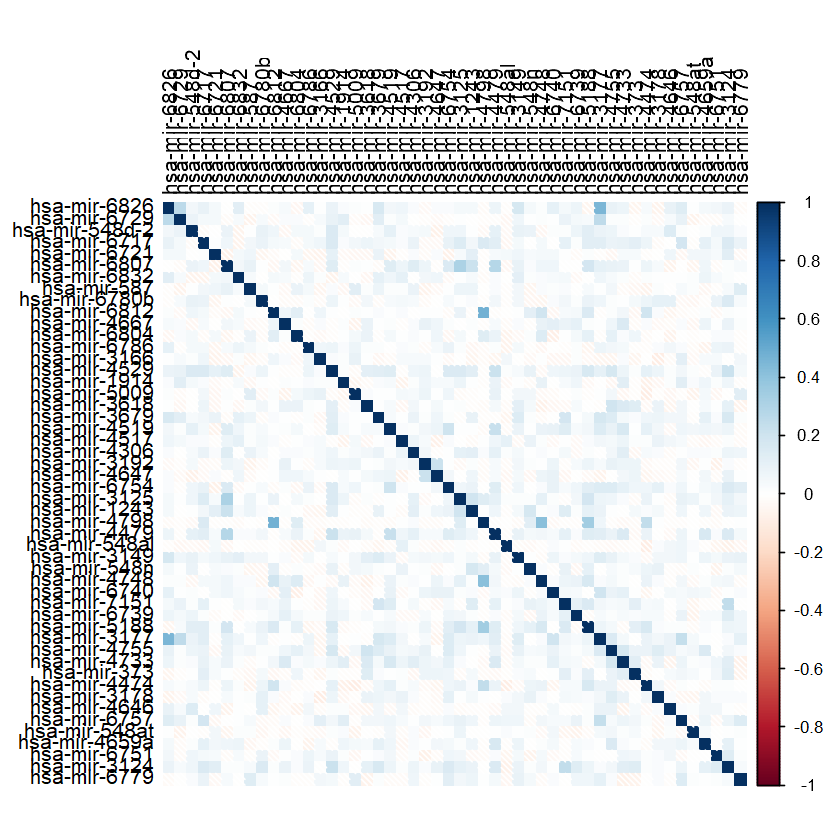

In [85]:
corrplot(cor_matrix[1:50,1:50],        # Correlation matrix
         method = "shade", # Correlation plot method
         type = "full",    # Correlation plot style (also "upper" and "lower")
         diag = TRUE,      # If TRUE (default), adds the diagonal
         tl.col = "black", # Labels color
         bg = "white",     # Background color
         title = "",       # Main title
         col = NULL)       # Color palette

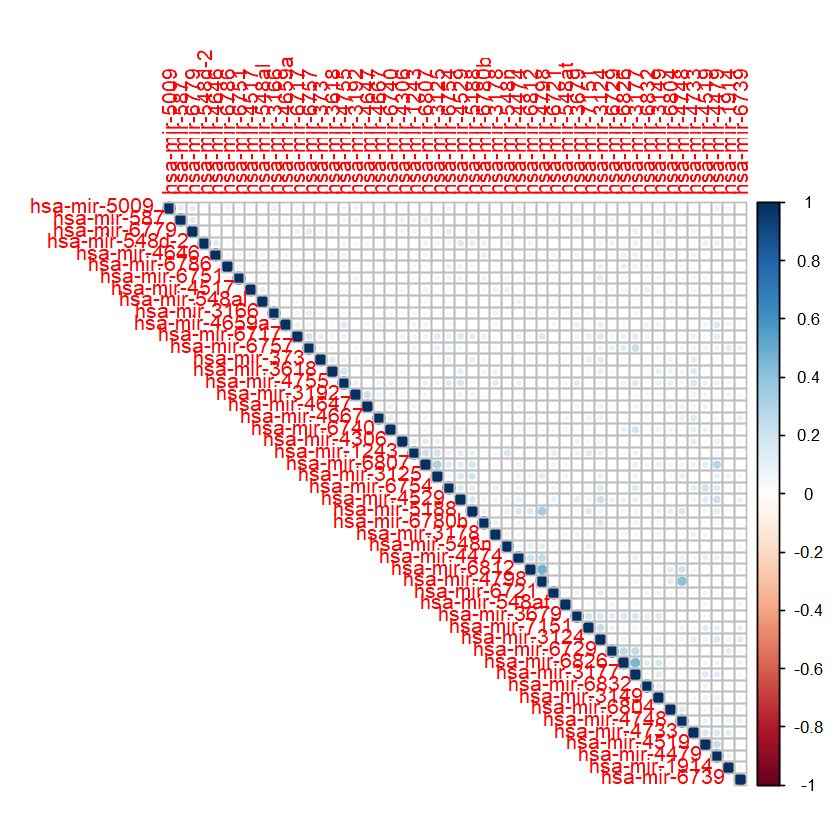

In [86]:
corrplot(cor_matrix[1:50,1:50], type="upper", order="hclust" )


In [24]:
# remove the correlated mirs from the exp raw data
mir_counts4 = mir_new
dim(mir_counts4)

[1] 800 590

In [25]:
# transfrom data to be integers for deseq2 analysis
mirs = rownames(mir_counts4)
mir_counts4 <- apply(mir_counts4, 2,            
                    function(x) as.integer(x))
rownames(mir_counts4)=mirs
head(mir_counts4)

TCGA-BP-4160-01A TCGA-BP-4781-01A TCGA-B0-4821-01A
hsa-mir-4690  0                0                2               
hsa-mir-3124  0                0                0               
hsa-mir-6715b 0                0                0               
hsa-mir-6735  0                0                0               
hsa-mir-4680  0                0                0               
hsa-mir-6731  0                0                1               
              TCGA-CJ-4872-01A TCGA-B8-5553-01A TCGA-BP-5176-01A
hsa-mir-4690  0                0                0               
hsa-mir-3124  1                1                0               
hsa-mir-6715b 0                0                0               
hsa-mir-6735  0                0                0               
hsa-mir-4680  0                0                0               
hsa-mir-6731  0                1                0               
              TCGA-CJ-5671-01A TCGA-A3-A6NJ-01A TCGA-B8-4153-01B
hsa-mir-4690  0                0                0               
hsa-mir-3124  1                0                1               
hsa-mir-6715b 0                0                0               
hsa-mir-6735  0                0                0               
hsa-mir-4680  0                0                0               
hsa-mir-6731  0                0                0               
              TCGA-B0-4847-01A ⋯ TCGA-BP-4971-01A TCGA-B0-4945-01A
hsa-mir-4690  0                ⋯ 0                0               
hsa-mir-3124  0                ⋯ 0                0               
hsa-mir-6715b 0                ⋯ 0                0               
hsa-mir-6735  0                ⋯ 0                0               
hsa-mir-4680  0                ⋯ 0                1               
hsa-mir-6731  0                ⋯ 0                0               
              TCGA-CZ-5452-01A TCGA-CZ-5452-11A TCGA-AS-3777-01A
hsa-mir-4690  0                0                0               
hsa-mir-3124  1                0                0               
hsa-mir-6715b 0                0                0               
hsa-mir-6735  0                0                0               
hsa-mir-4680  0                0                0               
hsa-mir-6731  0                0                0               
              TCGA-DV-A4VX-01A TCGA-B0-4838-01A TCGA-B0-5399-01A
hsa-mir-4690  0                0                1               
hsa-mir-3124  1                0                0               
hsa-mir-6715b 0                0                0               
hsa-mir-6735  1                0                0               
hsa-mir-4680  0                0                1               
hsa-mir-6731  0                0                0               
              TCGA-BP-4163-01A TCGA-AK-3451-01A
hsa-mir-4690  0                0               
hsa-mir-3124  0                0               
hsa-mir-6715b 0                0               
hsa-mir-6735  0                0               
hsa-mir-4680  1                1               
hsa-mir-6731  0                0

### Normalization

### 1- Size factor normalization such as Deseq2

In [26]:
# define a function to calculate the geometric mean
gm_mean <- function(x, na.rm=TRUE){ exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x)) }

# calculate the geometric mean for each gene using that function
pseudo_refs <- mir_counts4 %>% apply(., 1, gm_mean)

# divide each value by its corresponding pseudo-reference value
pseudo_ref_ratios <- mir_counts4 %>% apply(., 2, function(cts){ cts/pseudo_refs})

# determine the median value per sample to get the size factor
median_gm_ratio <- apply(pseudo_ref_ratios , 2, median)
median_gm_ratio

TCGA-BP-4160-01A TCGA-BP-4781-01A TCGA-B0-4821-01A TCGA-CJ-4872-01A 
      0.73643092       0.52887348       0.92172507       0.66491043 
TCGA-B8-5553-01A TCGA-BP-5176-01A TCGA-CJ-5671-01A TCGA-A3-A6NJ-01A 
      0.89756085       0.90262680       0.93360422       0.84344549 
TCGA-B8-4153-01B TCGA-B0-4847-01A TCGA-CJ-4634-01A TCGA-B0-5692-01A 
      0.87748412       0.35131098       0.41371890       0.92525879 
TCGA-A3-A8OW-01A TCGA-CZ-5982-01A TCGA-B8-5165-01A TCGA-BP-4988-01A 
      1.67049243       0.24153789       0.39522098       0.62105494 
TCGA-B8-5549-11A TCGA-CZ-4853-01A TCGA-CJ-4902-01A TCGA-CZ-5986-11A 
      0.31613634       0.44329097       0.39001172       0.40248579 
TCGA-B0-5711-11A TCGA-CJ-4899-01A TCGA-CJ-5678-01A TCGA-CZ-4863-01A 
      0.90351220       0.30694763       0.38476906       0.55973930 
TCGA-BP-4995-01A TCGA-CW-5580-11A TCGA-B8-A54D-01A TCGA-BP-4991-01A 
      1.02351587       0.47155262       0.53248877       0.28278269 
TCGA-BP-4327-01A TCGA-BP-4756-01A TCGA-B8-A54K-01A TCGA-BP-4345-01A 
      0.46189820       0.20018760       0.90448213       0.73952166 
TCGA-A3-3346-01A TCGA-CZ-5982-11A TCGA-B8-5549-01A TCGA-BP-4801-01A 
      0.00000000       0.47520839       0.34060343       0.62821180 
TCGA-B0-4834-01A TCGA-A3-3331-01A TCGA-CJ-4912-01A TCGA-CZ-5459-01A 
      0.00000000       0.72233643       0.21254379       0.76862996 
TCGA-AK-3460-01A TCGA-CW-5587-11A TCGA-CJ-5683-01A TCGA-B0-5400-01A 
      0.64785402       0.91633943       0.87624501       0.54221766 
TCGA-BP-5183-01A TCGA-B2-5633-01A TCGA-B0-4841-01A TCGA-B8-A54I-01A 
      0.33005657       0.96394115       0.69696739       0.74720028 
TCGA-CJ-4905-01A TCGA-BP-5168-01A TCGA-CJ-6033-01A TCGA-BP-4331-01A 
      0.62874892       0.00000000       0.49505512       0.54913292 
TCGA-BP-4173-01A TCGA-BP-4969-01A TCGA-A3-3324-01A TCGA-A3-3385-01A 
      1.03511879       0.88947327       0.26800795       0.28430161 
TCGA-BP-4338-01A TCGA-BP-4787-01A TCGA-CZ-5466-01A TCGA-B0-4707-01A 
      0.14659207       0.94538348       1.41206529       0.23218368 
TCGA-A3-3320-01A TCGA-CJ-4873-01A TCGA-BP-4346-01A TCGA-B0-5700-01A 
      0.28281519       0.20312415       0.52353825       1.31584432 
TCGA-AK-3431-01A TCGA-A3-3322-01A TCGA-B0-5706-11A TCGA-A3-3326-01A 
      0.79285020       0.28913786       0.96716978       0.19851611 
TCGA-CJ-4907-01A TCGA-B0-4712-01A TCGA-BP-4768-01A TCGA-CZ-5470-11A 
      0.74097569       0.70889123       0.21210060       0.62235484 
TCGA-B0-5711-01A TCGA-CJ-5684-01A TCGA-CZ-5451-01A TCGA-B0-5083-01A 
      0.23608767       0.47800101       0.84243561       0.33782259 
TCGA-G6-A8L8-01A TCGA-BP-4983-01A TCGA-B0-5085-01A TCGA-BP-4998-01A 
      0.97897062       0.13444483       0.77183409       1.16664618 
TCGA-B0-4852-01A TCGA-BP-4326-01A TCGA-A3-3378-01A TCGA-CJ-4878-01A 
      0.87955281       0.51697529       0.25221695       0.83379089 
TCGA-CZ-5465-11A TCGA-BP-4993-01A TCGA-B0-4688-01A TCGA-BP-4765-01A 
      0.83047521       0.17006226       0.19250044       0.72175872 
TCGA-CW-5588-01A TCGA-CZ-4864-11A TCGA-CZ-4864-01A TCGA-B0-5705-11A 
      0.62309413       0.47730150       0.89815219       0.90063948 
TCGA-CZ-5455-01A TCGA-CJ-5680-11A TCGA-CJ-4637-01A TCGA-BP-4174-01A 
      0.93841581       1.16580924       0.36640320       0.33177852 
TCGA-B8-5546-01A TCGA-CJ-4870-01A TCGA-B8-4621-01A TCGA-EU-5906-01A 
      0.00000000       0.91551149       0.84596257       0.76905460 
TCGA-BP-4789-01A TCGA-BP-5010-01A TCGA-A3-3370-01A TCGA-CZ-5468-01A 
      0.94198124       0.55847725       0.49768896       0.48899422 
TCGA-B0-5706-01A TCGA-BP-4803-01A TCGA-CZ-5461-01A TCGA-B8-5545-01A 
      0.48097684       0.45699859       0.69827100       0.81638011 
TCGA-BP-4974-01A TCGA-B0-4845-01A TCGA-B0-5693-01A TCGA-AK-3443-01A 
      1.19135092       0.38840393       0.69909825       0.11193877 
TCGA-CJ-4894-01A TCGA-AK-3447-01A TCGA-B0-5697-11A TCGA-BP-4354-01A 
      0.46622428       0.00000000       0.82712450       0.27472904

In [27]:
# apply the median of geometric mean ratios on each mirs
length(median_gm_ratio)
mir_norm <- mir_counts4 %>% apply(., 1, function(cts){ cts/median_gm_ratio})
mir_norm_log <- log2(mir_norm+1)
mir_norm_log <- t(mir_norm_log)
head(mir_norm_log)

[1] 590

TCGA-BP-4160-01A TCGA-BP-4781-01A TCGA-B0-4821-01A
hsa-mir-4690  0                0                1.664412        
hsa-mir-3124  0                0                0.000000        
hsa-mir-6715b 0                0                0.000000        
hsa-mir-6735  0                0                0.000000        
hsa-mir-4680  0                0                0.000000        
hsa-mir-6731  0                0                1.059994        
              TCGA-CJ-4872-01A TCGA-B8-5553-01A TCGA-BP-5176-01A
hsa-mir-4690  0.000000         0.000000         0               
hsa-mir-3124  1.324213         1.080064         0               
hsa-mir-6715b 0.000000         0.000000         0               
hsa-mir-6735  0.000000         0.000000         0               
hsa-mir-4680  0.000000         0.000000         0               
hsa-mir-6731  0.000000         1.080064         0               
              TCGA-CJ-5671-01A TCGA-A3-A6NJ-01A TCGA-B8-4153-01B
hsa-mir-4690  0.00000          0                0.000000        
hsa-mir-3124  1.05041          0                1.097356        
hsa-mir-6715b 0.00000          0                0.000000        
hsa-mir-6735  0.00000          0                0.000000        
hsa-mir-4680  0.00000          0                0.000000        
hsa-mir-6731  0.00000          0                0.000000        
              TCGA-B0-4847-01A ⋯ TCGA-BP-4971-01A TCGA-B0-4945-01A
hsa-mir-4690  0                ⋯ 0                0.000000        
hsa-mir-3124  0                ⋯ 0                0.000000        
hsa-mir-6715b 0                ⋯ 0                0.000000        
hsa-mir-6735  0                ⋯ 0                0.000000        
hsa-mir-4680  0                ⋯ 0                1.310853        
hsa-mir-6731  0                ⋯ 0                0.000000        
              TCGA-CZ-5452-01A TCGA-CZ-5452-11A TCGA-AS-3777-01A
hsa-mir-4690  0.000000         0                NaN             
hsa-mir-3124  1.327606         0                NaN             
hsa-mir-6715b 0.000000         0                NaN             
hsa-mir-6735  0.000000         0                NaN             
hsa-mir-4680  0.000000         0                NaN             
hsa-mir-6731  0.000000         0                NaN             
              TCGA-DV-A4VX-01A TCGA-B0-4838-01A TCGA-B0-5399-01A
hsa-mir-4690  0.000000         0                0.9004804       
hsa-mir-3124  2.281144         0                0.0000000       
hsa-mir-6715b 0.000000         0                0.0000000       
hsa-mir-6735  2.281144         0                0.0000000       
hsa-mir-4680  0.000000         0                0.9004804       
hsa-mir-6731  0.000000         0                0.0000000       
              TCGA-BP-4163-01A TCGA-AK-3451-01A
hsa-mir-4690  0.000000         0.000000        
hsa-mir-3124  0.000000         0.000000        
hsa-mir-6715b 0.000000         0.000000        
hsa-mir-6735  0.000000         0.000000        
hsa-mir-4680  1.364554         2.008809        
hsa-mir-6731  0.000000         0.000000

### 2- Using Deseq2 for variance stablized data and DE analysis

In [28]:
# DESeq2 
mir_dds <- DESeqDataSetFromMatrix(countData = mir_counts4,
                              colData = meta,
                              design = ~ sample_type)
mir_dds

Warning message in DESeqDataSet(se, design = design, ignoreRank):
"some variables in design formula are characters, converting to factors"
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



class: DESeqDataSet 
dim: 800 590 
metadata(1): version
assays(1): counts
rownames(800): hsa-mir-4690 hsa-mir-3124 ... hsa-mir-10b hsa-mir-21
rowData names(0):
colnames(590): TCGA-BP-4160-01A TCGA-BP-4781-01A ... TCGA-BP-4163-01A
  TCGA-AK-3451-01A
colData names(71): barcode patient ... paper_mRNA_cluster
  paper_microRNA_cluster

In [29]:
# run deseq model
mir_dds.run <- DESeq(mir_dds)

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

final dispersion estimates

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This 

In [30]:
# extract the variance stablized data from deseq2
mir_vsd <- varianceStabilizingTransformation(mir_dds.run, blind=FALSE)
mir_deseq_vsd <- as.data.frame(assay(mir_vsd))
mir_deseq_vsd

TCGA-BP-4160-01A TCGA-BP-4781-01A TCGA-B0-4821-01A
hsa-mir-4690   0.3070996        0.3070996        1.6981339       
hsa-mir-3124   0.3070996        0.3070996        0.3070996       
hsa-mir-6715b  0.3070996        0.3070996        0.3070996       
hsa-mir-6735   0.3070996        0.3070996        0.3070996       
hsa-mir-4680   0.3070996        0.3070996        0.3070996       
hsa-mir-6731   0.3070996        0.3070996        1.3090008       
hsa-mir-6746   0.3070996        0.3070996        0.3070996       
hsa-mir-6764   1.5851126        1.5916264        0.3070996       
hsa-mir-6805   0.3070996        0.3070996        0.3070996       
hsa-mir-4469   0.3070996        0.3070996        0.3070996       
hsa-mir-3137   0.3070996        0.3070996        1.6981339       
hsa-mir-1273h  0.3070996        0.3070996        1.3090008       
hsa-mir-3611   0.3070996        1.5916264        0.3070996       
hsa-mir-6839   1.5851126        0.3070996        1.3090008       
hsa-mir-6726   0.3070996        0.3070996        0.3070996       
hsa-mir-548d-1 0.3070996        0.3070996        1.3090008       
hsa-mir-3145   0.3070996        0.3070996        0.3070996       
hsa-mir-549a   0.3070996        0.3070996        1.3090008       
hsa-mir-4639   0.3070996        0.3070996        0.3070996       
hsa-mir-5584   0.3070996        0.3070996        0.3070996       
hsa-mir-1256   0.3070996        0.3070996        1.3090008       
hsa-mir-5580   0.3070996        0.3070996        0.3070996       
hsa-mir-4511   1.5851126        0.3070996        0.3070996       
hsa-mir-2115   0.3070996        0.3070996        0.3070996       
hsa-mir-6851   0.3070996        1.5916264        0.3070996       
hsa-mir-4470   0.3070996        1.5916264        0.3070996       
hsa-mir-490    0.3070996        0.3070996        1.3090008       
hsa-mir-6741   0.3070996        1.5916264        0.3070996       
hsa-mir-6883   0.3070996        0.3070996        1.3090008       
hsa-mir-4659a  1.5851126        0.3070996        1.3090008       
⋮              ⋮                ⋮                ⋮               
hsa-mir-28     13.000639        13.322104        13.322450       
hsa-mir-93     12.348707        12.664864        12.340874       
hsa-mir-145    13.086144        11.766890        11.924511       
hsa-mir-9-3     6.837381         8.750982         7.683365       
hsa-mir-451a   13.557338        12.595026        10.212897       
hsa-mir-183    10.463028        11.407891        12.569299       
hsa-mir-25     13.756241        13.893808        13.203346       
hsa-mir-210    12.951481        13.917926        13.307680       
hsa-mir-142    14.208642        12.257898        12.562798       
hsa-mir-29a    13.282086        14.155131        13.324723       
hsa-mir-103a-2 13.655241        13.313373        12.846856       
hsa-mir-101-1  14.092114        13.600466        12.621704       
hsa-mir-30d    14.093654        14.562105        13.045494       
hsa-let-7a-3   13.763890        13.475901        14.891200       
hsa-let-7f-2   11.848925        11.615242        14.396194       
hsa-mir-891a    1.585113         1.591626         5.193407       
hsa-mir-100    13.181257        12.442951        13.159266       
hsa-let-7b     15.110129        15.013239        15.081964       
hsa-mir-30e    15.425820        15.273755        14.435059       
hsa-mir-126    15.384171        14.892201        14.393865       
hsa-mir-192    14.854551        13.578278        15.934506       
hsa-mir-182    12.734186        13.231691        14.414281       
hsa-mir-99b    15.959415        16.019181        16.516758       
hsa-mir-148a   15.641413        16.429260        15.591465       
hsa-mir-10a    14.830641        16.249866        15.313260       
hsa-mir-22     17.352356        16.836376        17.707667       
hsa-mir-143    17.816823        15.603289        17.444248       
hsa-mir-30a    18.515151        18.762021        17.222164       
hsa-mir-10b    18.608071        18.553630        18.679

### 3- Limma with voom Normalization 

In [31]:
# create dgelist from edgeR
mir_lim <- DGEList(mir_counts4)
class(mir_lim)
dim(mir_lim)

[1] "DGEList"
attr(,"package")
[1] "edgeR"

[1] 800 590

In [32]:
# add micRNAs to dgelist
mir_lim$mirs <- rownames(mir_counts4)
mir_lim

An object of class "DGEList"
$counts
              TCGA-BP-4160-01A TCGA-BP-4781-01A TCGA-B0-4821-01A
hsa-mir-4690                 0                0                2
hsa-mir-3124                 0                0                0
hsa-mir-6715b                0                0                0
hsa-mir-6735                 0                0                0
hsa-mir-4680                 0                0                0
              TCGA-CJ-4872-01A TCGA-B8-5553-01A TCGA-BP-5176-01A
hsa-mir-4690                 0                0                0
hsa-mir-3124                 1                1                0
hsa-mir-6715b                0                0                0
hsa-mir-6735                 0                0                0
hsa-mir-4680                 0                0                0
              TCGA-CJ-5671-01A TCGA-A3-A6NJ-01A TCGA-B8-4153-01B
hsa-mir-4690                 0                0                0
hsa-mir-3124                 1                0                1
hsa-mir-6715b                0                0                0
hsa-mir-6735                 0                0                0
hsa-mir-4680                 0                0                0
              TCGA-B0-4847-01A TCGA-CJ-4634-01A TCGA-B0-5692-01A
hsa-mir-4690                 0                0                0
hsa-mir-3124                 0                1                0
hsa-mir-6715b                0                0                0
hsa-mir-6735                 0                0                0
hsa-mir-4680                 0                0                0
              TCGA-A3-A8OW-01A TCGA-CZ-5982-01A TCGA-B8-5165-01A
hsa-mir-4690                 1                0                0
hsa-mir-3124                 0                0                0
hsa-mir-6715b                0                0                0
hsa-mir-6735                 0                0                0
hsa-mir-4680                 2                0                0
              TCGA-BP-4988-01A TCGA-B8-5549-11A TCGA-CZ-4853-01A
hsa-mir-4690                 0                0                0
hsa-mir-3124                 0                0                0
hsa-mir-6715b                0                0                0
hsa-mir-6735                 1                0                0
hsa-mir-4680                 0                0                0
              TCGA-CJ-4902-01A TCGA-CZ-5986-11A TCGA-B0-5711-11A
hsa-mir-4690                 0                0                0
hsa-mir-3124                 0                0                2
hsa-mir-6715b                0                0                0
hsa-mir-6735                 0                0                1
hsa-mir-4680                 0                0                0
              TCGA-CJ-4899-01A TCGA-CJ-5678-01A TCGA-CZ-4863-01A
hsa-mir-4690                 1                0                0
hsa-mir-3124                 0                0                1
hsa-mir-6715b                0                0                0
hsa-mir-6735                 1                0                0
hsa-mir-4680                 0                0                0
              TCGA-BP-4995-01A TCGA-CW-5580-11A TCGA-B8-A54D-01A
hsa-mir-4690                 0                0                0
hsa-mir-3124                 0                0                0
hsa-mir-6715b                0                0                0
hsa-mir-6735                 1                0                3
hsa-mir-4680                 0                0                0
              TCGA-BP-4991-01A TCGA-BP-4327-01A TCGA-BP-4756-01A
hsa-mir-4690                 0                0                0
hsa-mir-3124                 0                0                0
hsa-mir-6715b                0                0                0
hsa-mir-6735                 0                0                1
hsa-mir-4680                 0                0                0
              TCGA-B8-A54K-01A TCGA-BP-4345-01A TCGA-A3-3346-01

In [33]:
# calculate cpm and log cpm to illustrate the filteration stratgey that will be used 
cpm <- cpm(mir_lim)
cpm_log <- cpm(mir_lim, log=TRUE)
summary(cpm_log)

 TCGA-BP-4160-01A  TCGA-BP-4781-01A  TCGA-B0-4821-01A  TCGA-CJ-4872-01A 
 Min.   :-0.5229   Min.   :-0.5229   Min.   :-0.5229   Min.   :-0.5229  
 1st Qu.:-0.5229   1st Qu.:-0.5229   1st Qu.:-0.5229   1st Qu.:-0.5229  
 Median : 0.1957   Median : 0.2104   Median : 0.2624   Median : 0.1214  
 Mean   : 2.0523   Mean   : 1.9615   Mean   : 1.9796   Mean   : 1.9475  
 3rd Qu.: 3.3408   3rd Qu.: 3.1692   3rd Qu.: 3.0215   3rd Qu.: 3.0421  
 Max.   :17.8509   Max.   :18.1402   Max.   :18.4553   Max.   :18.0880  
 TCGA-B8-5553-01A  TCGA-BP-5176-01A  TCGA-CJ-5671-01A  TCGA-A3-A6NJ-01A 
 Min.   :-0.5229   Min.   :-0.5229   Min.   :-0.5229   Min.   :-0.5229  
 1st Qu.:-0.5229   1st Qu.:-0.5229   1st Qu.:-0.5229   1st Qu.:-0.5229  
 Median : 0.1263   Median : 0.4191   Median : 0.4880   Median : 0.2576  
 Mean   : 2.1306   Mean   : 2.0224   Mean   : 2.1340   Mean   : 1.8389  
 3rd Qu.: 3.4695   3rd Qu.: 3.1748   3rd Qu.: 3.3553   3rd Qu.: 2.3932  
 Max.   :17.6146   Max.   :17.9827   Max.   :18.157

In [34]:
# calculate mean and median based on library size 
L <- mean(mir_lim$samples$lib.size) * 1e-6
M <- median(mir_lim$samples$lib.size) * 1e-6
c(L, M)

[1] 2.873673 2.310588

In [35]:
# change sample types group names of normal and tumor to be used in the design of lima 
meta$sample_type = gsub('Primary Tumor','Tumor',meta$sample_type)
meta$sample_type = gsub('Solid Tissue Normal','Normal',meta$sample_type)
meta$sample_type = as.factor(meta$sample_type)
unique(meta$sample_type)
table(meta$sample_type)

[1] Tumor  Normal
Levels: Normal Tumor


Normal  Tumor 
    71    519 

In [36]:
# factorize the sample type and add this to dgelist
type = as.factor(meta$sample_type)
mir_lim$samples$group <- type
mir_lim$samples

group  lib.size norm.factors
TCGA-BP-4160-01A Tumor  2225666  1           
TCGA-BP-4781-01A Tumor  2168864  1           
TCGA-B0-4821-01A Tumor  3971911  1           
TCGA-CJ-4872-01A Tumor  2552161  1           
TCGA-B8-5553-01A Tumor  2528246  1           
TCGA-BP-5176-01A Tumor  3119452  1           
TCGA-CJ-5671-01A Tumor  2830729  1           
TCGA-A3-A6NJ-01A Tumor  4003552  1           
TCGA-B8-4153-01B Tumor  3753784  1           
TCGA-B0-4847-01A Tumor  1991030  1           
TCGA-CJ-4634-01A Tumor  1385371  1           
TCGA-B0-5692-01A Tumor  3663941  1           
TCGA-A3-A8OW-01A Tumor  7557281  1           
TCGA-CZ-5982-01A Tumor  1368376  1           
TCGA-B8-5165-01A Tumor  1894966  1           
TCGA-BP-4988-01A Tumor  1679346  1           
TCGA-B8-5549-11A Normal 2874339  1           
TCGA-CZ-4853-01A Tumor  1696056  1           
TCGA-CJ-4902-01A Tumor  1731044  1           
TCGA-CZ-5986-11A Normal 2227175  1           
TCGA-B0-5711-11A Normal 4173079  1           
TCGA-CJ-4899-01A Tumor  1573102  1           
TCGA-CJ-5678-01A Tumor  2003255  1           
TCGA-CZ-4863-01A Tumor  2531286  1           
TCGA-BP-4995-01A Tumor  5646406  1           
TCGA-CW-5580-11A Normal 2348685  1           
TCGA-B8-A54D-01A Tumor  2227869  1           
TCGA-BP-4991-01A Tumor  2142163  1           
TCGA-BP-4327-01A Tumor  1554582  1           
TCGA-BP-4756-01A Tumor  1625888  1           
⋮                ⋮      ⋮        ⋮           
TCGA-B8-5552-01B Tumor  5263744  1           
TCGA-BP-5187-01A Tumor  2284158  1           
TCGA-CZ-5454-11A Normal 3380757  1           
TCGA-CJ-4889-01A Tumor  2585426  1           
TCGA-B0-5102-01A Tumor  1338285  1           
TCGA-B8-4622-11A Normal 1895175  1           
TCGA-B8-4622-01A Tumor  1922303  1           
TCGA-B0-5710-01A Tumor  2279555  1           
TCGA-BP-4963-01A Tumor  1918842  1           
TCGA-CZ-5458-01A Tumor  3242639  1           
TCGA-B0-4699-01A Tumor  1446655  1           
TCGA-B4-5377-01A Tumor  2995645  1           
TCGA-BP-5195-01A Tumor  3111344  1           
TCGA-BP-4989-01A Tumor  3393042  1           
TCGA-BP-4986-01A Tumor  3230878  1           
TCGA-B8-5163-01A Tumor  1850950  1           
TCGA-CJ-4891-01A Tumor  1546066  1           
TCGA-B0-5402-01A Tumor  2172346  1           
TCGA-CJ-4641-01A Tumor  1462798  1           
TCGA-B0-4693-01A Tumor  1802896  1           
TCGA-BP-4971-01A Tumor  1657697  1           
TCGA-B0-4945-01A Tumor  1911134  1           
TCGA-CZ-5452-01A Tumor  2225477  1           
TCGA-CZ-5452-11A Normal 3721023  1           
TCGA-AS-3777-01A Tumor   989202  1           
TCGA-DV-A4VX-01A Tumor  2172068  1           
TCGA-B0-4838-01A Tumor  2367950  1           
TCGA-B0-5399-01A Tumor  4993852  1           
TCGA-BP-4163-01A Tumor  2753885  1           
TCGA-AK-3451-01A Tumor  2316159  1

In [37]:
# estimation of low count miRNAs 
keep.exprs <- filterByExpr(mir_lim, group=type)
sum(keep.exprs)
keep.exprs

[1] 297

hsa-mir-4690    hsa-mir-3124   hsa-mir-6715b    hsa-mir-6735    hsa-mir-4680 
          FALSE           FALSE           FALSE           FALSE           FALSE 
   hsa-mir-6731    hsa-mir-6746    hsa-mir-6764    hsa-mir-6805    hsa-mir-4469 
          FALSE           FALSE           FALSE           FALSE           FALSE 
   hsa-mir-3137   hsa-mir-1273h    hsa-mir-3611    hsa-mir-6839    hsa-mir-6726 
          FALSE           FALSE           FALSE           FALSE           FALSE 
 hsa-mir-548d-1    hsa-mir-3145    hsa-mir-549a    hsa-mir-4639    hsa-mir-5584 
          FALSE           FALSE           FALSE           FALSE           FALSE 
   hsa-mir-1256    hsa-mir-5580    hsa-mir-4511    hsa-mir-2115    hsa-mir-6851 
          FALSE           FALSE           FALSE           FALSE           FALSE 
   hsa-mir-4470     hsa-mir-490    hsa-mir-6741    hsa-mir-6883   hsa-mir-4659a 
          FALSE           FALSE           FALSE           FALSE           FALSE 
   hsa-mir-6766    hsa-mir-6858    hsa-mir-6505    hsa-mir-1276    hsa-mir-6748 
          FALSE           FALSE           FALSE           FALSE           FALSE 
   hsa-mir-3140  hsa-mir-516a-1    hsa-mir-6515    hsa-mir-1197    hsa-mir-1250 
          FALSE           FALSE           FALSE           FALSE           FALSE 
   hsa-mir-6743    hsa-mir-7974    hsa-mir-4753  hsa-mir-3680-2    hsa-mir-4515 
          FALSE           FALSE           FALSE           FALSE           FALSE 
    hsa-mir-770    hsa-mir-4763    hsa-mir-6778    hsa-mir-6809    hsa-mir-4788 
          FALSE           FALSE           FALSE           FALSE           FALSE 
   hsa-mir-6506    hsa-mir-4421     hsa-mir-668   hsa-mir-4524a   hsa-mir-3622a 
          FALSE           FALSE           FALSE           FALSE           FALSE 
   hsa-mir-4286    hsa-mir-4699    hsa-mir-4782    hsa-mir-6772    hsa-mir-5695 
          FALSE           FALSE           FALSE           FALSE           FALSE 
   hsa-mir-8072    hsa-mir-3616    hsa-mir-6855   hsa-mir-3155a    hsa-mir-1227 
          FALSE           FALSE           FALSE           FALSE           FALSE 
   hsa-mir-6821    hsa-mir-4757   hsa-mir-548ai    hsa-mir-4664    hsa-mir-6885 
          FALSE           FALSE           FALSE           FALSE           FALSE 
   hsa-mir-6797    hsa-mir-6844    hsa-mir-1181    hsa-mir-6737    hsa-mir-6783 
          FALSE           FALSE           FALSE           FALSE           FALSE 
   hsa-mir-4453    hsa-mir-3620    hsa-mir-6870    hsa-mir-4735    hsa-mir-6747 
          FALSE           FALSE           FALSE           FALSE           FALSE 
   hsa-mir-4726    hsa-mir-520f    hsa-mir-4754    hsa-mir-3152    hsa-mir-6884 
          FALSE           FALSE           FALSE           FALSE           FALSE 
   hsa-mir-4775    hsa-mir-4738    hsa-mir-6132    hsa-mir-4522    hsa-mir-7845 
          FALSE           FALSE           FALSE           FALSE           FALSE 
   hsa-mir-5703    hsa-mir-6810    hsa-mir-4741  hsa-mir-1185-2    hsa-mir-6895 
          FALSE           FALSE           FALSE           FALSE           FALSE 
   hsa-mir-7155    hsa-mir-4657     hsa-mir-597    hsa-mir-2682    hsa-mir-6888 
          FALSE           FALSE           FALSE           FALSE           FALSE 
   hsa-mir-518f    hsa-mir-6508    hsa-mir-6894    hsa-mir-6728    hsa-mir-4640 
          FALSE           FALSE           FALSE           FALSE           FALSE 
   hsa-mir-520b    hsa-mir-4643    hsa-mir-5708    hsa-mir-4727    hsa-mir-6818 
          FALSE           FALSE           FALSE           FALSE           FALSE 
   hsa-mir-3617   hsa-mir-6769a    hsa-mir-7976    hsa-mir-6513    hsa-mir-5002 
          FALSE           FALSE           FALSE           FALSE           FALSE 
   hsa-mir-3691    hsa-mir-6774    hsa-mir-4800    hsa-mir-7152    hsa-mir-3667 
          FALSE           FALSE           FALSE           FALSE           FALSE 
   hsa-mir-7844     hsa-mir-510  hsa-mir-1285-1     hsa-mir-525    hsa-mir-548k 
          FALSE           FALSE   

In [38]:
#filtration of low count miRNAs 
mir_lim$counts = mir_lim$counts[keep.exprs,]
length(rownames(mir_lim$counts))



[1] 297

In [39]:
# calculate the normalization factor by the truncated mean method
mir_lim <- calcNormFactors(mir_lim, method = "TMM")
mir_lim$samples$norm.factors

[1] 1.2191546 1.0805331 0.9278169 0.9394373 1.2588545 1.0780949 1.2625964
  [8] 0.8146306 1.0230168 1.0901570 1.3010631 1.0672073 0.9300853 1.2469267
 [15] 1.0915379 1.3349753 0.7065547 1.0131250 1.0236825 1.0868264 0.9340468
 [22] 1.0920168 1.0246053 0.9085546 0.8421008 1.0359357 1.0824468 0.8383254
 [29] 1.1201942 1.2283889 0.3600284 1.2594207 1.2022171 0.7783086 0.9021100
 [36] 1.3065661 0.5516087 0.9452701 1.1433613 1.0841318 0.8880103 1.1780910
 [43] 0.9902848 1.1302334 1.1062334 1.1512405 1.0532611 0.6909395 0.9940549
 [50] 0.1821774 1.1289914 0.7885911 0.6978251 1.1639565 0.8984966 1.0168001
 [57] 0.9816476 1.0347605 1.3670960 0.9310452 0.9739803 1.0287730 1.0863941
 [64] 1.1657750 1.1209890 1.0896536 0.9990263 1.1721139 0.9933835 1.3655900
 [71] 0.9232175 0.7365962 0.9654358 1.0619046 0.9209369 0.8858238 0.9172446
 [78] 1.2475158 1.1918993 0.9480641 1.1523254 0.9850870 0.9581218 0.8006697
 [85] 0.7913768 1.1287716 1.2798845 1.2317328 1.1391131 0.8168747 0.7818399
 [92] 0.9321420 1.0532476 1.1802006 0.8680741 1.1064589 0.8298030 0.6639350
 [99] 1.1440371 1.0582290 0.7641370 1.2603697 1.0630312 1.0420072 0.8750886
[106] 0.8677380 0.9406783 1.0579652 1.0726191 1.1091132 1.2016833 0.6597840
[113] 1.1060200 0.4588534 0.9582987 1.2538031 0.9065618 1.1282662 0.9224905
[120] 0.9033111 0.8799148 0.8583657 1.0720020 1.1013008 0.9258658 0.9905568
[127] 1.1287134 1.0978917 0.9591094 0.9870753 0.6998187 0.7969222 1.5477090
[134] 0.9198928 1.0554410 0.7852461 1.0010616 0.9511872 0.6537825 0.8066990
[141] 1.0704232 1.1011094 0.8051779 0.5398358 0.8726338 1.0236895 1.1678046
[148] 0.9189922 0.9438599 0.6287725 1.1478743 1.0699760 1.0731117 0.9856828
[155] 1.1610354 1.2189486 0.8797982 1.3246178 1.2738603 1.0223703 0.6700848
[162] 0.8336450 1.1418653 0.5256880 0.8801128 1.2649713 1.4228674 1.2047802
[169] 0.9290076 0.8979817 0.9812126 1.0300123 1.0879150 0.9993919 0.9861088
[176] 0.8826844 1.0404480 0.8950406 0.9922389 1.1520710 0.9594656 0.8535210
[183] 1.0656477 0.9199130 1.1741774 1.0757318 1.0101466 0.4036993 0.8079594
[190] 1.0958519 1.0451234 0.9348996 1.1059844 1.0023300 1.0457802 0.8984950
[197] 0.7955471 0.8358229 1.2002223 0.9837017 1.1987011 0.7113276 0.9408716
[204] 1.4294734 0.9112450 0.5990778 1.1497936 1.6215424 0.8189643 0.9125646
[211] 0.7687755 1.0255392 1.0919910 0.9704450 1.3225023 1.0748141 1.1269016
[218] 1.1431371 1.2220817 1.1282348 1.1341939 0.9282907 0.7910994 0.9985711
[225] 0.7909439 1.2670516 0.9026813 1.1983326 0.8950438 1.1203901 0.8498356
[232] 1.1745665 1.2319200 1.5599280 1.2461124 1.2665766 1.2025120 1.0002660
[239] 0.8203356 1.0312380 1.3412353 0.7656556 1.0875591 1.0137810 1.4266319
[246] 1.0721870 1.0202309 1.2917066 1.0653406 0.9749571 1.3880793 0.7055809
[253] 0.9825779 0.9097104 0.8535350 0.7532208 1.2310059 1.4204145 0.8869676
[260] 0.8029643 0.9598457 1.5473102 0.9679969 0.7662369 1.0970368 1.0615358
[267] 1.0213487 1.1283103 1.0983865 1.0994003 1.1261238 1.0419503 1.1616236
[274] 0.9175588 0.7131563 1.1022778 0.9087892 0.6490197 1.5775898 0.8759233
[281] 1.3373341 1.0201458 0.9072064 0.5059529 1.3037979 0.8419174 0.9852150
[288] 1.4625784 1.1583115 1.0470084 0.4692947 0.8714952 1.0739233 0.8477651
[295] 1.0661331 0.9358106 1.2194830 1.7009948 1.4842773 0.7734415 0.7001310
[302] 1.0218383 1.1856756 0.9494575 0.7234806 1.1866217 1.0739115 1.2951254
[309] 1.0707771 1.2046306 1.1643780 1.3779273 1.1467235 1.1511408 1.0414507
[316] 1.1180222 0.8917763 1.2351440 1.3059546 1.0389575 1.3690922 0.7187924
[323] 1.3992535 1.0772867 1.1659962 1.6591361 0.9114760 0.6901558 0.9412005
[330] 1.0900280 0.8535258 0.5698893 1.9249091 1.1526803 1.0077090 0.9699241
[337] 1.3352373 0.9199585 0.9782735 0.7937961 0.8370046 1.0200768 0.9705228
[344] 0.9526069 1.0329885 0.7714164 0.8408381 0.8146379 0.9545720 1.4650780
[351] 0.9845216 1.0917026 1.0787643 1.0681078 1.2047726 0.9455557 1.1375651
[358] 0.9761040 1.1572491 1.1776035 0.7035919 0.9482624 0.5608798 1.1766506
[365] 1.4559809 1.1240092 1.0658760 0.8983812 0.94

In [40]:
# add miRNAs names to dgelist
mir_lim$mirs <- rownames(mir_lim$counts)

Warning message in brewer.pal(nsamples, "Paired"):
"n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
"


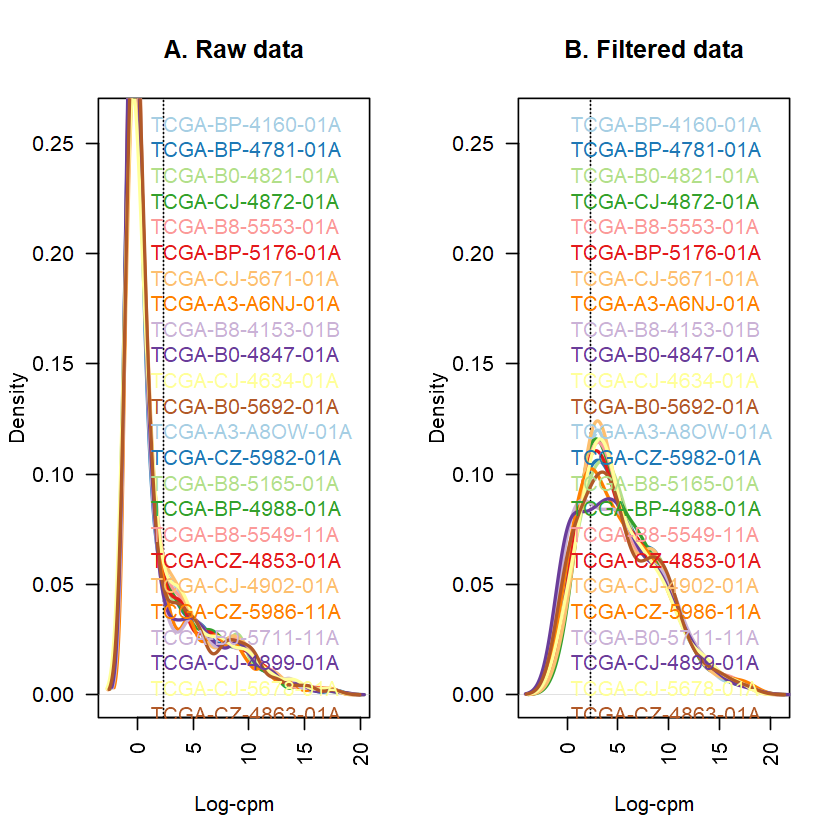

In [41]:
# visualize data before and after filtration
cpm_log.cutoff <- log2(10/M + 2/L)
nsamples <- ncol(mir_lim)
col <- brewer.pal(nsamples, "Paired")
par(mfrow=c(1,2))
plot(density(cpm_log[,1]), col=col[1], lwd=2, ylim=c(0,0.26), las=2, main="", xlab="")
title(main="A. Raw data", xlab="Log-cpm")
abline(v=cpm_log.cutoff, lty=3)
for (i in 2:nsamples){
den <- density(cpm_log[,i])
lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", colnames(mir_lim$counts), text.col=col, bty="n")
lcpm <- cpm(mir_lim, log=TRUE)
plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,0.26), las=2, main="", xlab="")
title(main="B. Filtered data", xlab="Log-cpm")
abline(v=cpm_log.cutoff, lty=3)
for (i in 2:nsamples){
den <- density(lcpm[,i])
lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", colnames(mir_lim$counts), text.col=col, bty="n")

In [42]:
# create the design for lima based on sample type
design <- model.matrix(~0+type)
colnames(design) <- gsub("type", "", colnames(design))
design

Normal Tumor
1   0      1    
2   0      1    
3   0      1    
4   0      1    
5   0      1    
6   0      1    
7   0      1    
8   0      1    
9   0      1    
10  0      1    
11  0      1    
12  0      1    
13  0      1    
14  0      1    
15  0      1    
16  0      1    
17  1      0    
18  0      1    
19  0      1    
20  1      0    
21  1      0    
22  0      1    
23  0      1    
24  0      1    
25  0      1    
26  1      0    
27  0      1    
28  0      1    
29  0      1    
30  0      1    
⋮   ⋮      ⋮    
561 0      1    
562 0      1    
563 1      0    
564 0      1    
565 0      1    
566 1      0    
567 0      1    
568 0      1    
569 0      1    
570 0      1    
571 0      1    
572 0      1    
573 0      1    
574 0      1    
575 0      1    
576 0      1    
577 0      1    
578 0      1    
579 0      1    
580 0      1    
581 0      1    
582 0      1    
583 0      1    
584 1      0    
585 0      1    
586 0      1    
587 0      1    
588 0      1    
589 0      1    
590 0      1

An object of class "EList"
$targets
                 group lib.size norm.factors
TCGA-BP-4160-01A Tumor  2713431    1.2191546
TCGA-BP-4781-01A Tumor  2343529    1.0805331
TCGA-B0-4821-01A Tumor  3685206    0.9278169
TCGA-CJ-4872-01A Tumor  2397595    0.9394373
TCGA-B8-5553-01A Tumor  3182694    1.2588545
585 more rows ...

$E
               TCGA-BP-4160-01A TCGA-BP-4781-01A TCGA-B0-4821-01A
hsa-mir-320b-1        1.4667718        1.8587794         1.762110
hsa-mir-3130-2       -0.1181907        0.9412415        -2.881746
hsa-mir-5000          1.8078088        1.6782071         2.475806
hsa-mir-3130-1        1.0193129        0.5786715        -1.296783
hsa-mir-491           0.7298063        2.2948785         1.025145
               TCGA-CJ-4872-01A TCGA-B8-5553-01A TCGA-BP-5176-01A
hsa-mir-320b-1        2.2619733         1.030191         1.157113
hsa-mir-3130-2        1.1978430         1.853313         1.337686
hsa-mir-5000          0.5457663         1.973607         1.337686
hsa-mir-3130-1        0.9083363         1.417214         2.459676
hsa-mir-491           1.8258742         1.853313         2.294617
               TCGA-CJ-5671-01A TCGA-A3-A6NJ-01A TCGA-B8-4153-01B
hsa-mir-320b-1       -0.5156395        0.7539327       -0.6192477
hsa-mir-3130-2        0.3323574        3.0758608        1.1462871
hsa-mir-5000          1.5547498        1.9383573        0.9657148
hsa-mir-3130-1        0.8628721        2.2486974        1.7026804
hsa-mir-491           1.4103599        1.2013917        1.9168052
               TCGA-B0-4847-01A TCGA-CJ-4634-01A TCGA-B0-5692-01A
hsa-mir-320b-1         1.582388         0.471964         1.425080
hsa-mir-3130-2         1.788839         1.609468         1.986959
hsa-mir-5000           1.582388         1.850476         2.587352
hsa-mir-3130-1         1.051873         2.056927         2.242216
hsa-mir-491            2.274266         2.673598         2.705188
               TCGA-A3-A8OW-01A TCGA-CZ-5982-01A TCGA-B8-5165-01A
hsa-mir-320b-1       2.01958754        1.6885894        0.7588200
hsa-mir-3130-2       1.04467852       -0.1858797        0.2733932
hsa-mir-5000         2.06934057       -0.1858797        1.1213901
hsa-mir-3130-1       0.83055371        1.3990828        1.8583557
hsa-mir-491          0.09358812        1.0365127        0.7588200
               TCGA-BP-4988-01A TCGA-B8-5549-11A TCGA-CZ-4853-01A
hsa-mir-320b-1        1.0052118        0.7852509       -0.1960343
hsa-mir-3130-2        0.6426417        0.7852509        1.3889282
hsa-mir-5000          2.0832143        1.1478210        2.9738907
hsa-mir-3130-1        0.6426417        0.7852509        3.3482862
hsa-mir-491           0.6426417        1.6783357        1.9194429
               TCGA-CJ-4902-01A TCGA-CZ-5986-11A TCGA-B0-5711-11A
hsa-mir-320b-1        0.9819434       0.04659108        0.7377604
hsa-mir-3130-2       -0.2404490       0.04659108       -0.1553244
hsa-mir-5000          1.3445135      -2.27533702       -0.1553244
hsa-mir-3130-1        1.6340201       1.42510270       -1.3777168
hsa-mir-491           1.6340201       0.04659108       -0.6407512
               TCGA-CJ-4899-01A TCGA-CJ-5678-01A TCGA-CZ-4863-01A
hsa-mir-320b-1       -0.1956456        1.6630247        0.9684087
hsa-mir-3130-2        0.5413200        0.7699399        1.7053743
hsa-mir-5000          1.3893169        1.4220166        0.6058387
hsa-mir-3130-1        1.3893169        0.2845131        0.9684087
hsa-mir-491           0.5413200        1.8694756        2.1908012
               TCGA-BP-4995-01A TCGA-CW-5580-11A TCGA-B8-A54D-01A
hsa-mir-320b-1        0.8380648       0.52456660       0.05196696
hsa-mir-3130-2        1.2741639      -2.28278832       1.18947048
hsa-mir-5000          3.0173885       0.03913978       2.58801986
hsa-mir-3130-1        0.9985295       0.52456660       1.18947048
hsa-mir-491           0.8380648       1.17664330       1.43047858
               TCGA-BP-4991-01A TCGA-BP-4327-01A TCGA-BP-4756-01A
hsa-mir-320b-1        1.3252738         1.

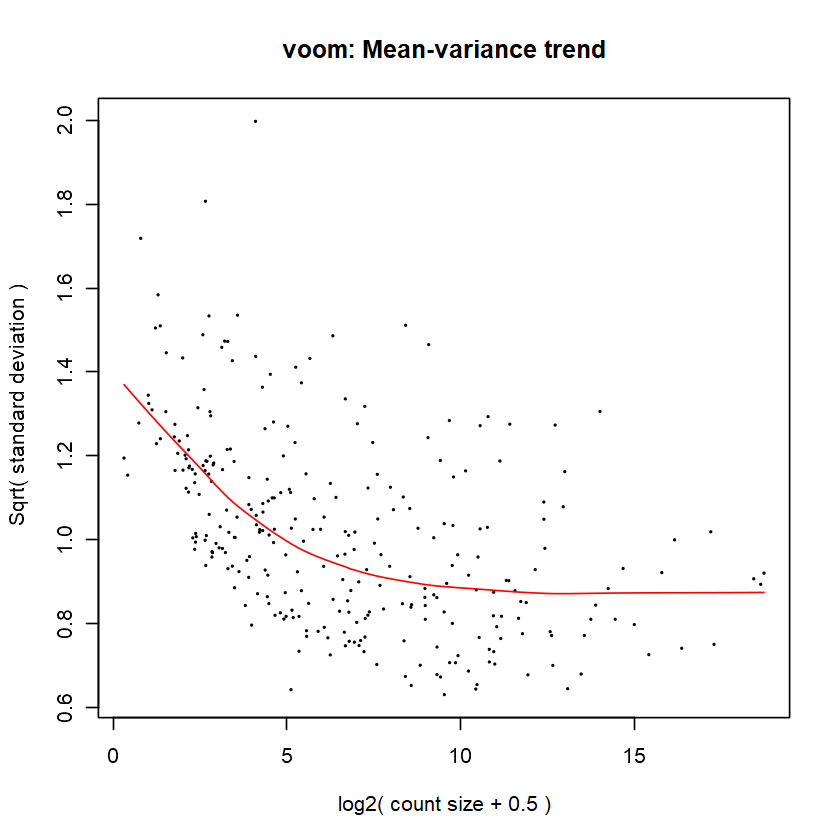

In [43]:
# apply voom on dgelist
mir_lim_v <- voom(mir_lim, design, plot=TRUE)
mir_lim_v

In [44]:
length(mir_lim$mirs)
dim(mir_lim_v$E)

[1] 297

[1] 297 590

### 4- Comparision between different types of normalization

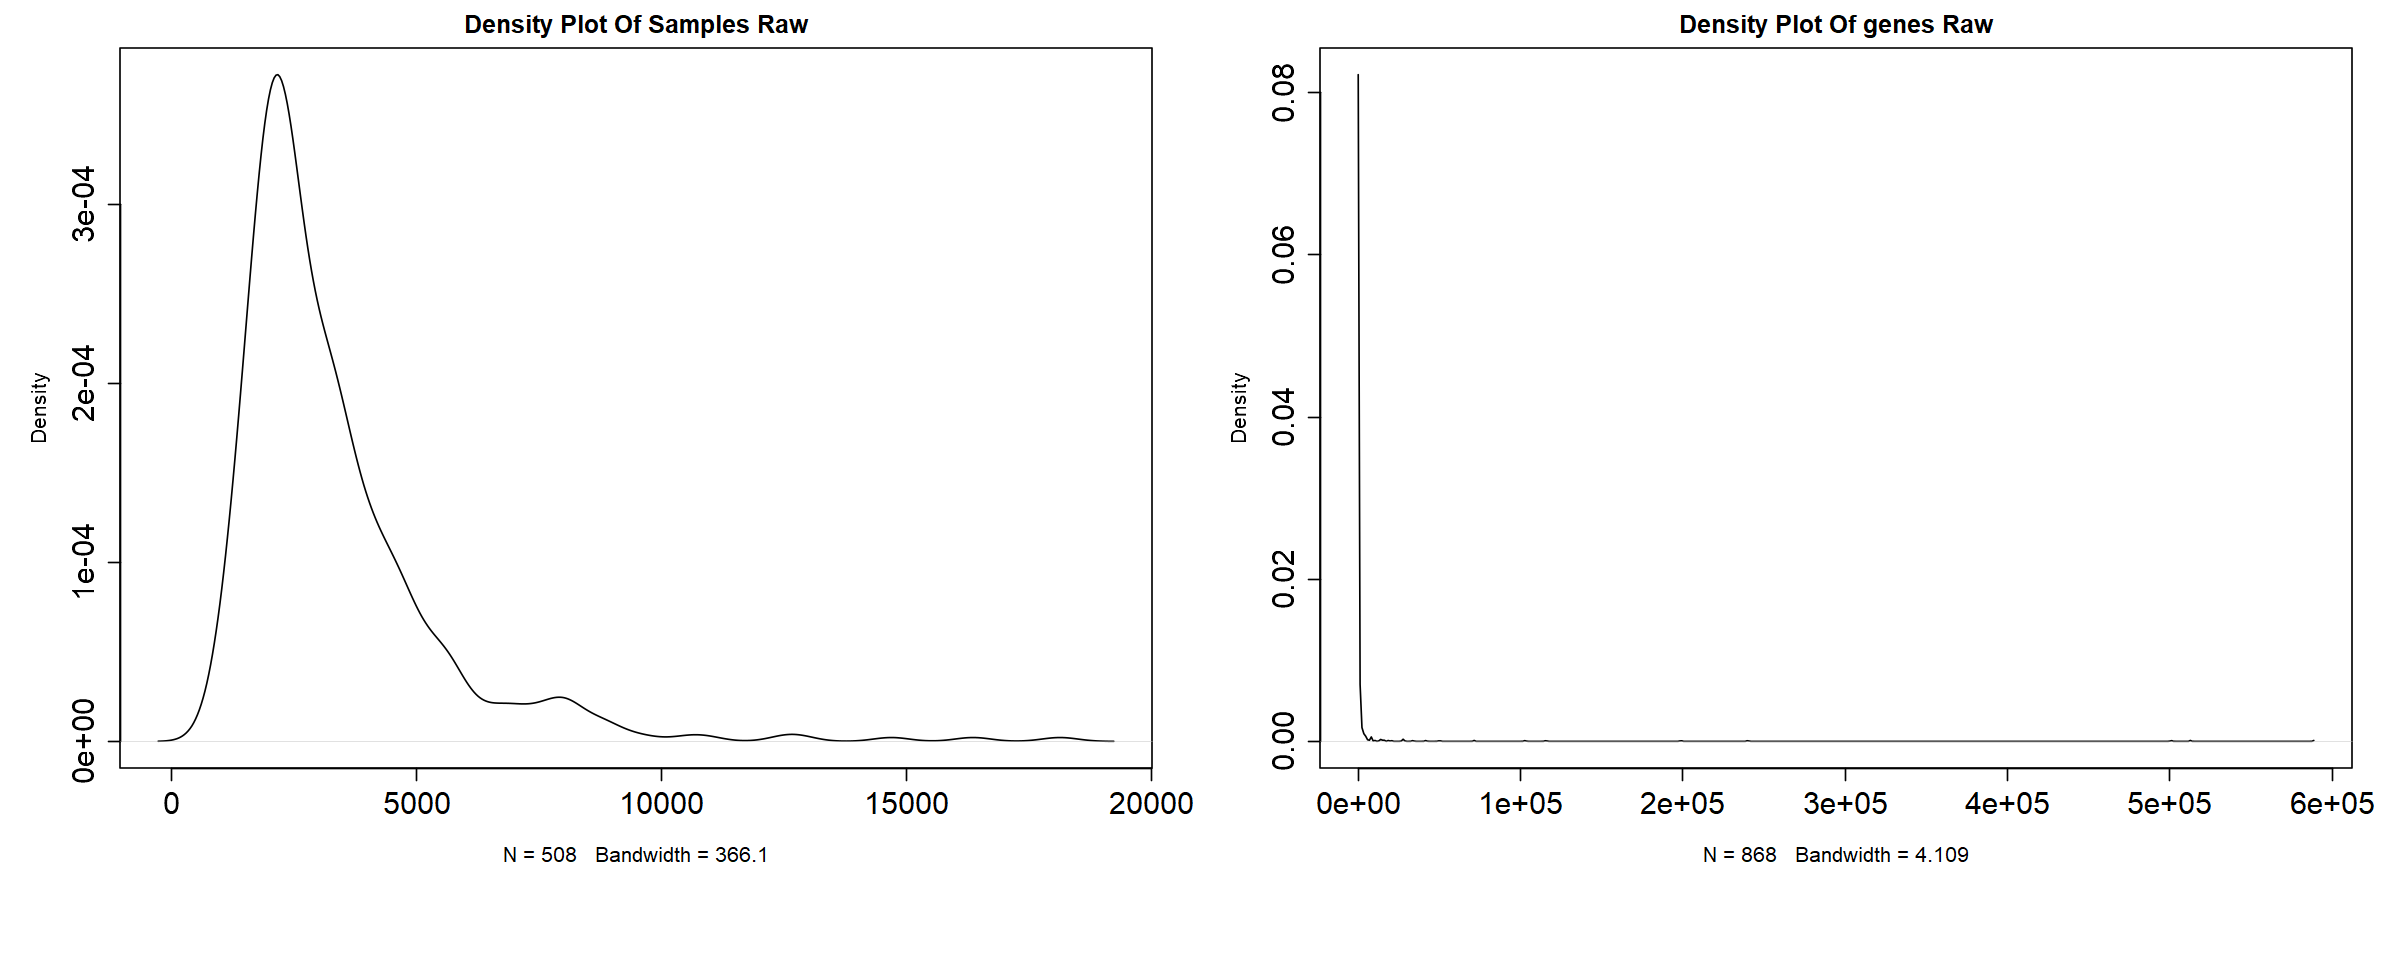

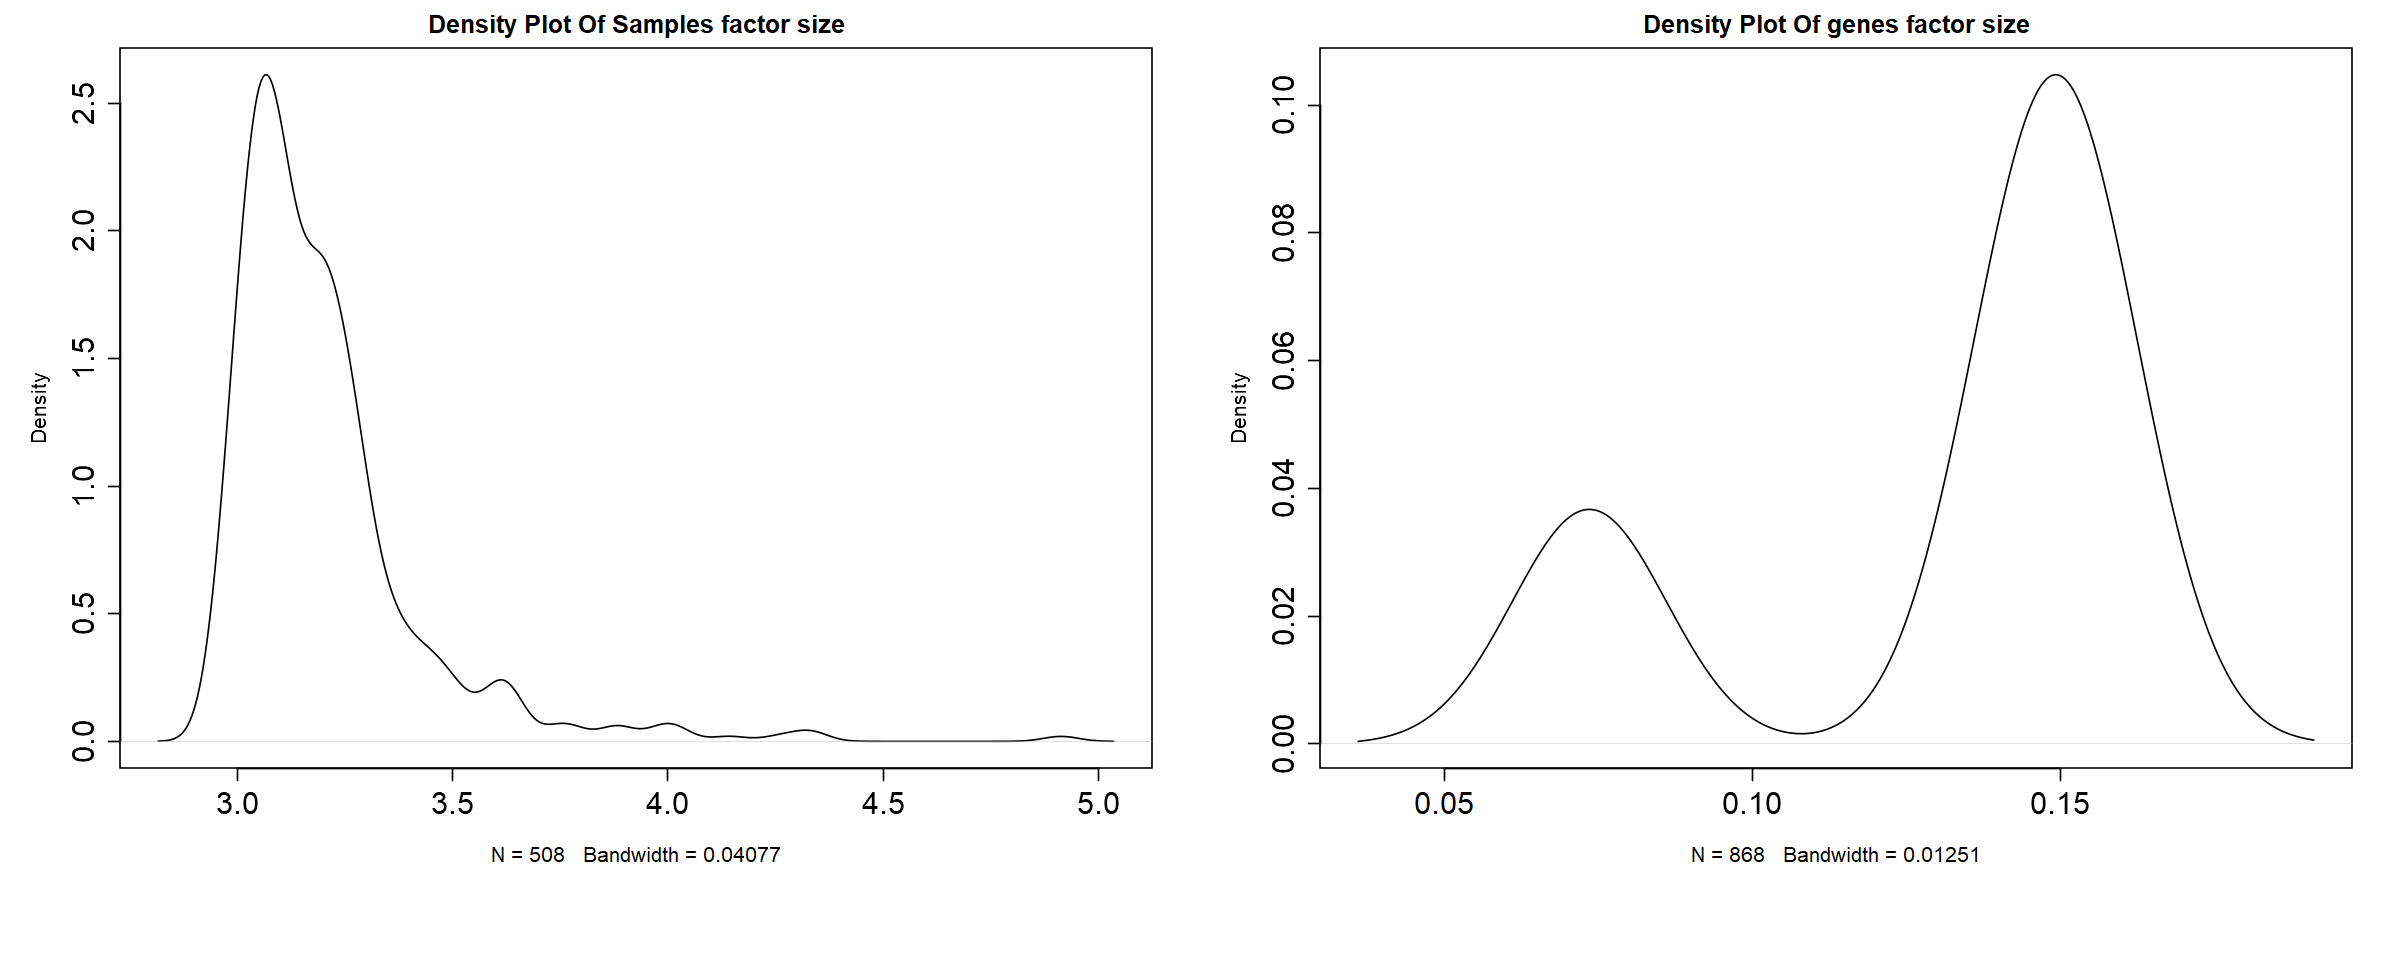

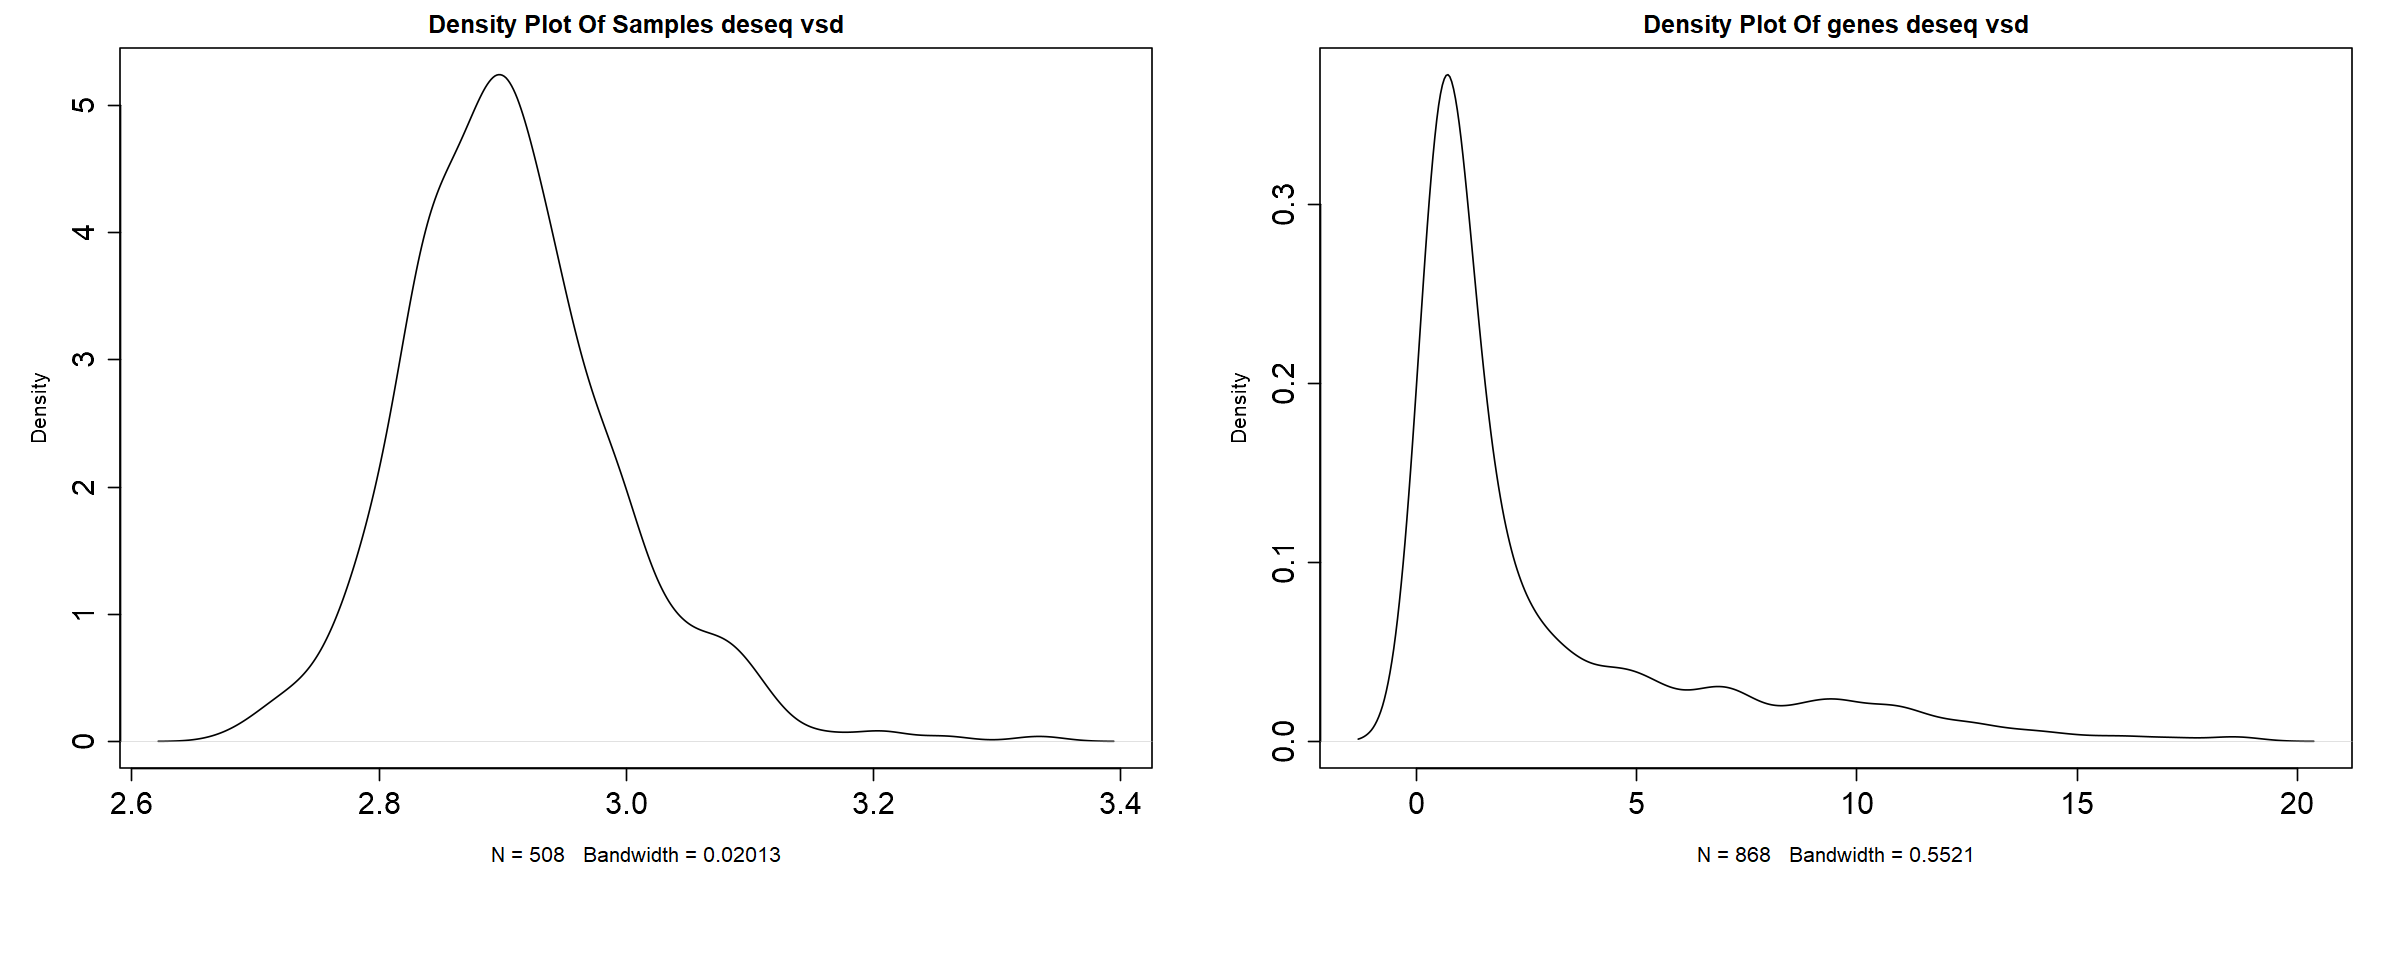

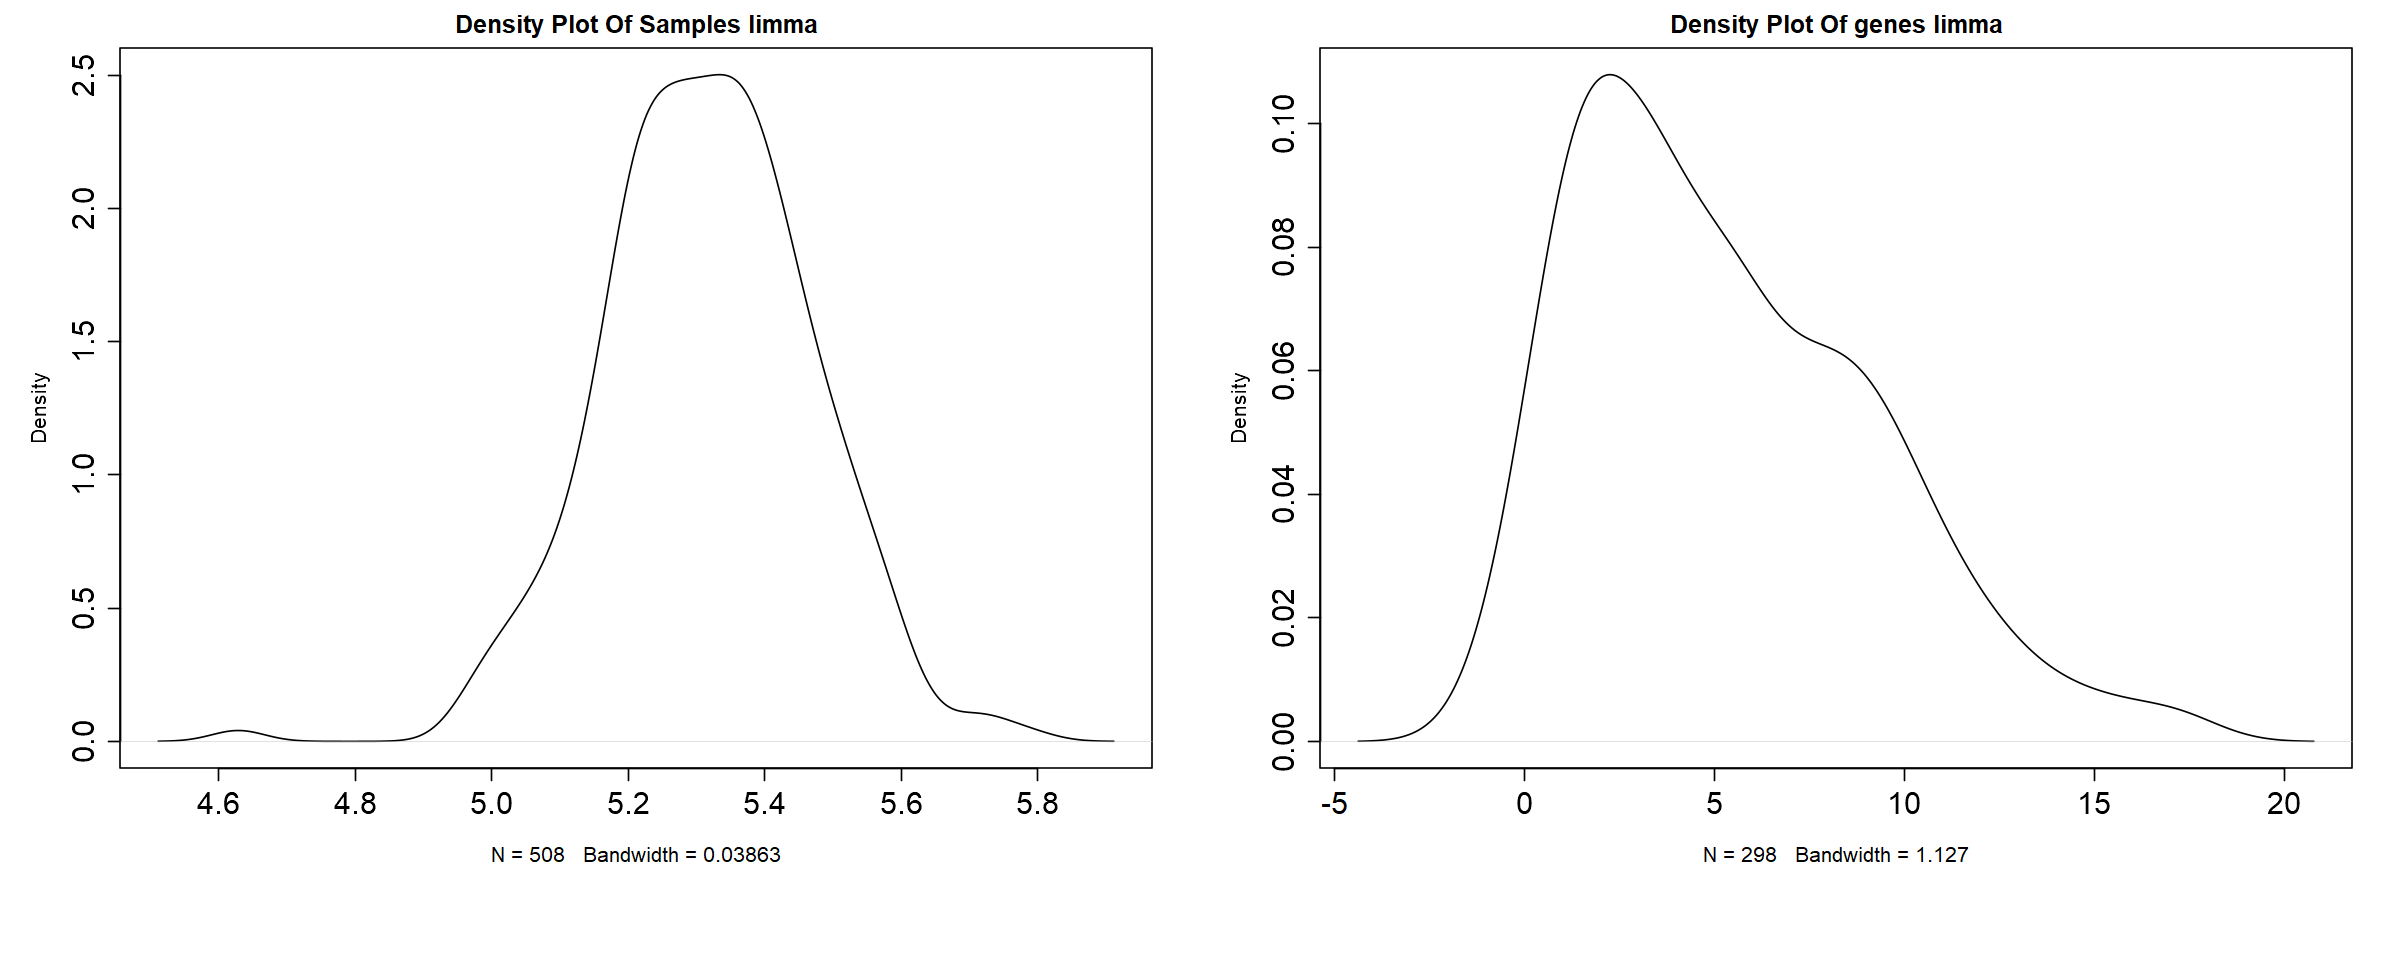

In [138]:
# check distributions of samples and miRNA befor and after normalization
options(repr.plot.width=20,repr.plot.height=8)

par(mar = c(8,5,2,2),mfrow=c(1,2),cex.axis=1.5)
plot(density(apply(mir_counts4, 2, mean, na.rm = TRUE)), main='Density Plot Of Samples Raw')
plot(density(apply(mir_counts4, 1, mean, na.rm = TRUE)), main='Density Plot Of miRNA Raw')

par(mar = c(8,5,2,2),mfrow=c(1,2),cex.axis=1.5)
plot(density(apply(mir_norm_log, 2, mean, na.rm = TRUE)), main='Density Plot Of Samples factor size')
plot(density(apply(mir_norm_log, 1, mean, na.rm = TRUE)), main='Density Plot Of miRNA factor size')

par(mar = c(8,5,2,2),mfrow=c(1,2),cex.axis=1.5)
plot(density(apply(mir_deseq_vsd, 2, mean, na.rm = TRUE)), main='Density Plot Of Samples deseq vsd')
plot(density(apply(mir_deseq_vsd, 1, mean, na.rm = TRUE)), main='Density Plot Of miRNA deseq vsd')

par(mar = c(8,5,2,2),mfrow=c(1,2),cex.axis=1.5)
plot(density(apply(mir_lim_v$E, 2, mean, na.rm = TRUE)), main='Density Plot Of Samples limma')
plot(density(apply(mir_lim_v$E, 1, mean, na.rm = TRUE)), main='Density Plot Of miRNA limma')

In [45]:
# extract the normalized count using deseq2
mir_deseq_counts <- counts(mir_dds.run, normalized=TRUE)
mir_deseq_log <- log2(mir_deseq_counts+1)
dim(mir_deseq_log)
head(mir_deseq_log)

[1] 800 590

TCGA-BP-4160-01A TCGA-BP-4781-01A TCGA-B0-4821-01A
hsa-mir-4690  0                0                1.164860        
hsa-mir-3124  0                0                0.000000        
hsa-mir-6715b 0                0                0.000000        
hsa-mir-6735  0                0                0.000000        
hsa-mir-4680  0                0                0.000000        
hsa-mir-6731  0                0                0.696935        
              TCGA-CJ-4872-01A TCGA-B8-5553-01A TCGA-BP-5176-01A
hsa-mir-4690  0.000000         0.000000         0               
hsa-mir-3124  1.050306         0.815077         0               
hsa-mir-6715b 0.000000         0.000000         0               
hsa-mir-6735  0.000000         0.000000         0               
hsa-mir-4680  0.000000         0.000000         0               
hsa-mir-6731  0.000000         0.815077         0               
              TCGA-CJ-5671-01A TCGA-A3-A6NJ-01A TCGA-B8-4153-01B
hsa-mir-4690  0.0000000        0                0.0000000       
hsa-mir-3124  0.8343476        0                0.6301511       
hsa-mir-6715b 0.0000000        0                0.0000000       
hsa-mir-6735  0.0000000        0                0.0000000       
hsa-mir-4680  0.0000000        0                0.0000000       
hsa-mir-6731  0.0000000        0                0.0000000       
              TCGA-B0-4847-01A ⋯ TCGA-BP-4971-01A TCGA-B0-4945-01A
hsa-mir-4690  0                ⋯ 0                0.000000        
hsa-mir-3124  0                ⋯ 0                0.000000        
hsa-mir-6715b 0                ⋯ 0                0.000000        
hsa-mir-6735  0                ⋯ 0                0.000000        
hsa-mir-4680  0                ⋯ 0                0.964212        
hsa-mir-6731  0                ⋯ 0                0.000000        
              TCGA-CZ-5452-01A TCGA-CZ-5452-11A TCGA-AS-3777-01A
hsa-mir-4690  0.0000000        0                0               
hsa-mir-3124  0.8496769        0                0               
hsa-mir-6715b 0.0000000        0                0               
hsa-mir-6735  0.0000000        0                0               
hsa-mir-4680  0.0000000        0                0               
hsa-mir-6731  0.0000000        0                0               
              TCGA-DV-A4VX-01A TCGA-B0-4838-01A TCGA-B0-5399-01A
hsa-mir-4690  0.000000         0                0.5226555       
hsa-mir-3124  1.124657         0                0.0000000       
hsa-mir-6715b 0.000000         0                0.0000000       
hsa-mir-6735  1.124657         0                0.0000000       
hsa-mir-4680  0.000000         0                0.5226555       
hsa-mir-6731  0.000000         0                0.0000000       
              TCGA-BP-4163-01A TCGA-AK-3451-01A
hsa-mir-4690  0.000000         0.000000        
hsa-mir-3124  0.000000         0.000000        
hsa-mir-6715b 0.000000         0.000000        
hsa-mir-6735  0.000000         0.000000        
hsa-mir-4680  1.063061         1.318724        
hsa-mir-6731  0.000000         0.000000

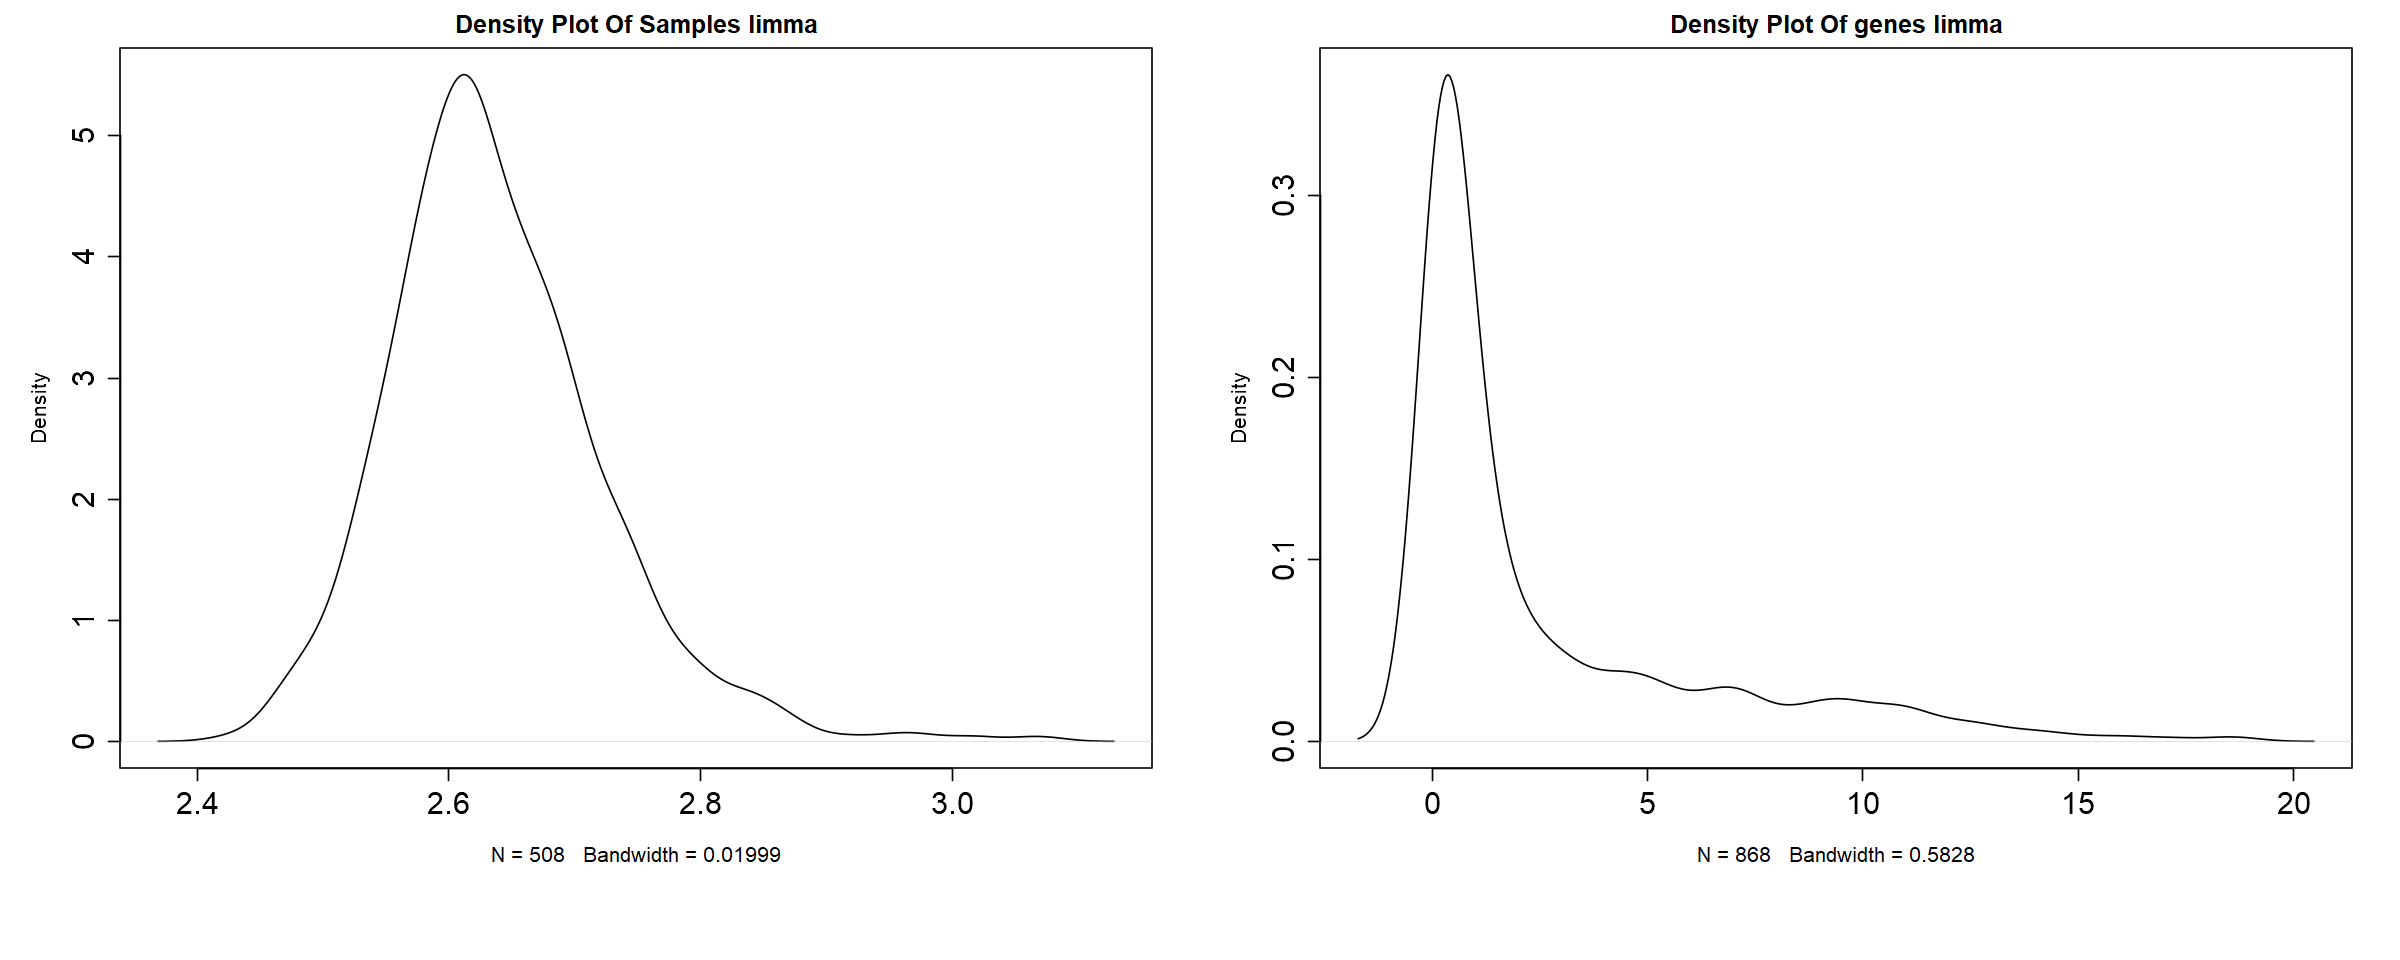

In [140]:
# check distribution of normalized count using deseq normalization
par(mar = c(8,5,2,2),mfrow=c(1,2),cex.axis=1.5)
plot(density(apply(mir_deseq_log, 2, mean, na.rm = TRUE)), main='Density Plot Of Samples limma')
plot(density(apply(mir_deseq_log, 1, mean, na.rm = TRUE)), main='Density Plot Of genes limma')

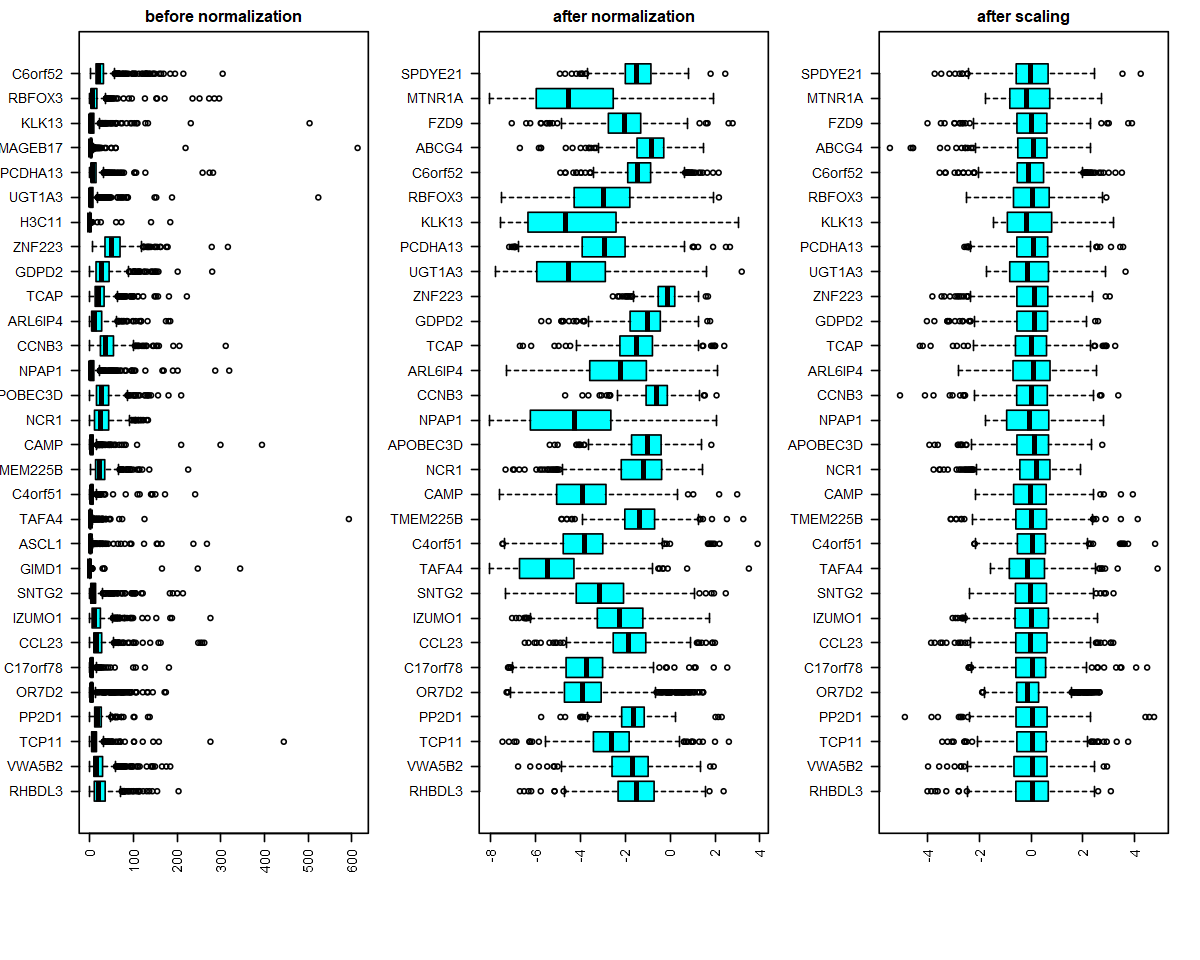

In [133]:
# boxplot of count before normalization, after normalization and after scaling
par(mar = c(8,5,2,2),mfrow=c(1,3))
boxplot(t(mir_counts4)[,1:30], main="before normalization", horizontal=T, names=rownames(mir_counts4)[1:30],las=2,
       col = "cyan")
boxplot(t(mir_lim_v$E)[,1:30], main="after normalization", horizontal=T, names=rownames(mir_lim_v$E)[1:30],las=2,
       col = "cyan")
boxplot(scale(t(mir_lim_v$E))[,1:30], main="after scaling", horizontal=T, names=rownames(mir_lim_v$E)[1:30],las=2,
       col = "cyan")

In [46]:
# scaling of normalized deseq2 data
mir_deseq_scaled <- t(scale(t(mir_deseq_log), center = TRUE, scale = TRUE))
head(mir_deseq_scaled)

TCGA-BP-4160-01A TCGA-BP-4781-01A TCGA-B0-4821-01A
hsa-mir-4690  -0.3974661       -0.3974661        2.6443468      
hsa-mir-3124  -0.4208728       -0.4208728       -0.4208728      
hsa-mir-6715b -0.1726298       -0.1726298       -0.1726298      
hsa-mir-6735  -0.3494290       -0.3494290       -0.3494290      
hsa-mir-4680  -0.3467286       -0.3467286       -0.3467286      
hsa-mir-6731  -0.3473570       -0.3473570        1.6966514      
              TCGA-CJ-4872-01A TCGA-B8-5553-01A TCGA-BP-5176-01A
hsa-mir-4690  -0.3974661       -0.3974661       -0.3974661      
hsa-mir-3124   2.3449193        1.7254863       -0.4208728      
hsa-mir-6715b -0.1726298       -0.1726298       -0.1726298      
hsa-mir-6735  -0.3494290       -0.3494290       -0.3494290      
hsa-mir-4680  -0.3467286       -0.3467286       -0.3467286      
hsa-mir-6731  -0.3473570        2.0431446       -0.3473570      
              TCGA-CJ-5671-01A TCGA-A3-A6NJ-01A TCGA-B8-4153-01B
hsa-mir-4690  -0.3974661       -0.3974661       -0.3974661      
hsa-mir-3124   1.7762321       -0.4208728        1.2385171      
hsa-mir-6715b -0.1726298       -0.1726298       -0.1726298      
hsa-mir-6735  -0.3494290       -0.3494290       -0.3494290      
hsa-mir-4680  -0.3467286       -0.3467286       -0.3467286      
hsa-mir-6731  -0.3473570       -0.3473570       -0.3473570      
              TCGA-B0-4847-01A ⋯ TCGA-BP-4971-01A TCGA-B0-4945-01A
hsa-mir-4690  -0.3974661       ⋯ -0.3974661       -0.3974661      
hsa-mir-3124  -0.4208728       ⋯ -0.4208728       -0.4208728      
hsa-mir-6715b -0.1726298       ⋯ -0.1726298       -0.1726298      
hsa-mir-6735  -0.3494290       ⋯ -0.3494290       -0.3494290      
hsa-mir-4680  -0.3467286       ⋯ -0.3467286        2.2732256      
hsa-mir-6731  -0.3473570       ⋯ -0.3473570       -0.3473570      
              TCGA-CZ-5452-01A TCGA-CZ-5452-11A TCGA-AS-3777-01A
hsa-mir-4690  -0.3974661       -0.3974661       -0.3974661      
hsa-mir-3124   1.8165989       -0.4208728       -0.4208728      
hsa-mir-6715b -0.1726298       -0.1726298       -0.1726298      
hsa-mir-6735  -0.3494290       -0.3494290       -0.3494290      
hsa-mir-4680  -0.3467286       -0.3467286       -0.3467286      
hsa-mir-6731  -0.3473570       -0.3473570       -0.3473570      
              TCGA-DV-A4VX-01A TCGA-B0-4838-01A TCGA-B0-5399-01A
hsa-mir-4690  -0.3974661       -0.3974661        0.9673506      
hsa-mir-3124   2.5407100       -0.4208728       -0.4208728      
hsa-mir-6715b -0.1726298       -0.1726298       -0.1726298      
hsa-mir-6735   2.8529700       -0.3494290       -0.3494290      
hsa-mir-4680  -0.3467286       -0.3467286        1.0734295      
hsa-mir-6731  -0.3473570       -0.3473570       -0.3473570      
              TCGA-BP-4163-01A TCGA-AK-3451-01A
hsa-mir-4690  -0.3974661       -0.3974661      
hsa-mir-3124  -0.4208728       -0.4208728      
hsa-mir-6715b -0.1726298       -0.1726298      
hsa-mir-6735  -0.3494290       -0.3494290      
hsa-mir-4680   2.5418173        3.2365048      
hsa-mir-6731  -0.3473570       -0.3473570

In [47]:
# scaling of normalized lima_voom data
mir_limv_scaled <- t(scale(t(mir_lim_v$E), center = TRUE, scale = TRUE))
head(mir_limv_scaled)

TCGA-BP-4160-01A TCGA-BP-4781-01A TCGA-B0-4821-01A
hsa-mir-320b-1  0.3896780        0.76462807       0.67216550     
hsa-mir-3130-2 -0.7343542        0.06721355      -2.82526360     
hsa-mir-5000    0.4843163        0.34697552       1.19220335     
hsa-mir-3130-1  0.1757683       -0.15345547      -1.55469529     
hsa-mir-491    -0.3435092        1.19817437      -0.05258423     
hsa-mir-3127   -0.2731558        0.15423251       1.04024320     
               TCGA-CJ-4872-01A TCGA-B8-5553-01A TCGA-BP-5176-01A
hsa-mir-320b-1  1.15027773      -0.02790588       0.09349379     
hsa-mir-3130-2  0.26135851       0.75728810       0.36716365     
hsa-mir-5000   -0.85308918       0.66001562      -0.01388027     
hsa-mir-3130-1  0.09285256       0.47305884       1.25193098     
hsa-mir-491     0.73617891       0.76320782       1.19791668     
hsa-mir-3127    0.61704390      -0.29737347       0.87147781     
               TCGA-CJ-5671-01A TCGA-A3-A6NJ-01A TCGA-B8-4153-01B
hsa-mir-320b-1 -1.5064723       -0.2921432       -1.6055721      
hsa-mir-3130-2 -0.3934690        1.6822693        0.2223513      
hsa-mir-5000    0.2161459        0.6226606       -0.4080633      
hsa-mir-3130-1  0.0588841        1.0942989        0.6863441      
hsa-mir-491     0.3268741        0.1210288        0.8257511      
hsa-mir-3127   -0.1197052        1.2875774       -0.2256693      
               TCGA-B0-4847-01A ⋯ TCGA-BP-4971-01A TCGA-B0-4945-01A
hsa-mir-320b-1 0.5002635        ⋯ -0.5597969        1.09572910     
hsa-mir-3130-2 0.7085069        ⋯  0.7567594       -0.73344203     
hsa-mir-5000   0.2454347        ⋯ -1.7100057       -0.09458711     
hsa-mir-3130-1 0.2000958        ⋯ -1.9664046       -1.22383432     
hsa-mir-491    1.1778697        ⋯ -0.1172190        0.56150444     
hsa-mir-3127   0.0562347        ⋯ -0.2099724       -0.27192278     
               TCGA-CZ-5452-01A TCGA-CZ-5452-11A TCGA-AS-3777-01A
hsa-mir-320b-1  0.9164415        0.551990210     -2.0859944      
hsa-mir-3130-2  0.8815115       -0.003354196      1.1239317      
hsa-mir-5000   -1.4874943       -1.223852555     -0.9403349      
hsa-mir-3130-1  0.5588749       -1.352751779      0.3110688      
hsa-mir-491     0.4467678       -0.227109231      0.9553787      
hsa-mir-3127    0.3535666        0.259217481     -1.0881601      
               TCGA-DV-A4VX-01A TCGA-B0-4838-01A TCGA-B0-5399-01A
hsa-mir-320b-1  0.04367675      -0.8439767       -0.33550519     
hsa-mir-3130-2  0.19113612      -1.0686057       -0.24542600     
hsa-mir-5000   -0.26042892       0.2169477        0.02674614     
hsa-mir-3130-1 -0.03108145       1.1913766        0.35932622     
hsa-mir-491    -0.33104465      -0.4098869       -1.26822653     
hsa-mir-3127    0.81821015       0.5886787       -0.67331079     
               TCGA-BP-4163-01A TCGA-AK-3451-01A
hsa-mir-320b-1  0.2168616       -2.82683916     
hsa-mir-3130-2  1.0339516        0.04454571     
hsa-mir-5000    0.5969810        0.69944737     
hsa-mir-3130-1  0.5551610        0.36594604     
hsa-mir-491     0.9811773       -0.64291857     
hsa-mir-3127   -0.2467973        0.28326034

### 5- Save the normalized data and scaled data to be used for downstream analysis

In [48]:
write.csv(mir_deseq_log, "mir_deseq_norm_log.csv")

In [49]:
write.csv(mir_lim_v$E, "mir_limv_norm.csv")

In [50]:
write.csv(mir_deseq_scaled, "mir_deseq_scaled.csv")

In [51]:
write.csv(mir_limv_scaled, "mir_limv_scaled.csv")

In [52]:
write.csv(mir_deseq_vsd, "mir_deseq_vsd.csv")

### 6- Clustering and PCA of Normalized data

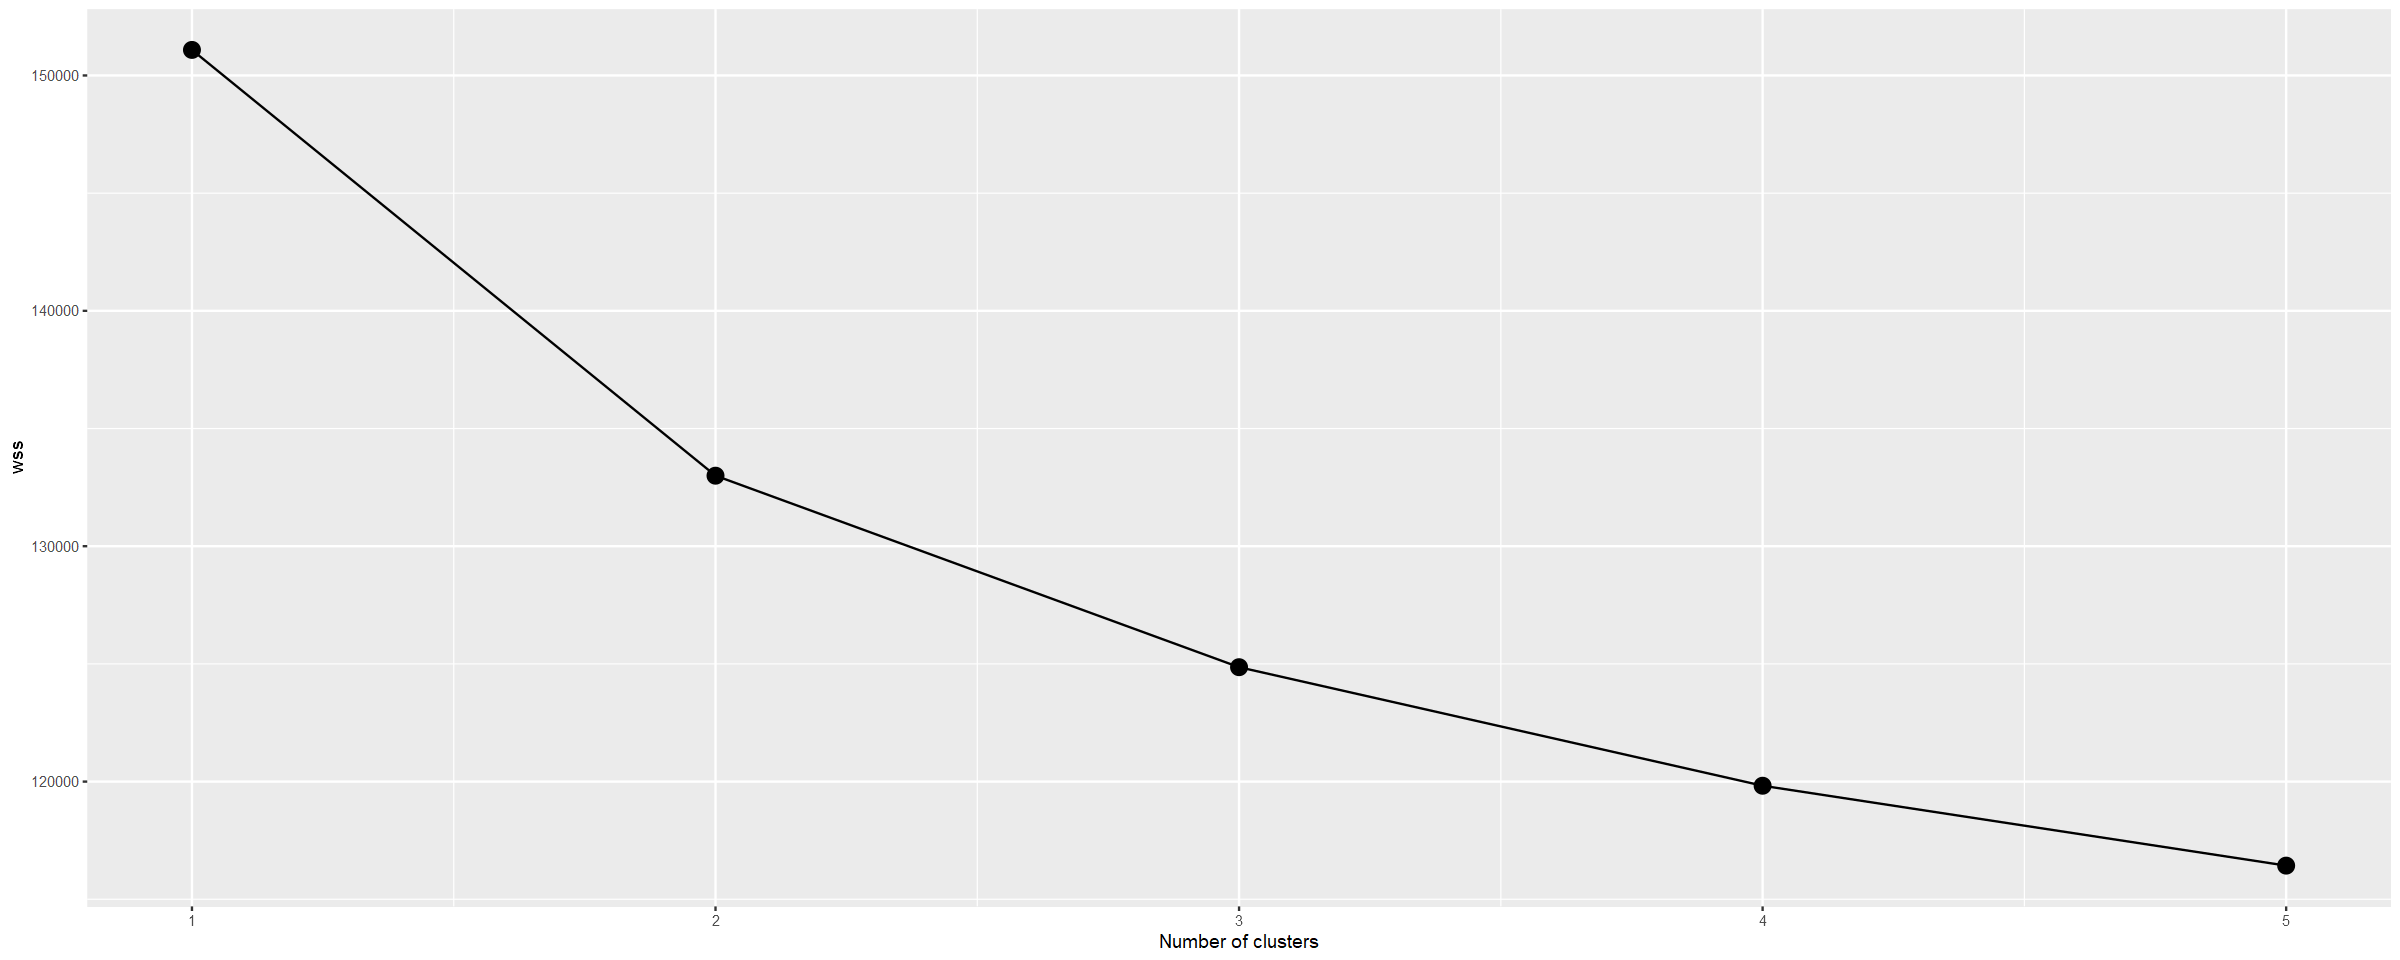

In [147]:
# Decide how many clusters to look at
n_clusters <- 5

# Initialize total within sum of squares error: wss
wss <- numeric(n_clusters)

set.seed(123)

# Look over 1 to n possible clusters
for (i in 1:n_clusters) {
  # Fit the model: km.out
  km.out <- kmeans(t(mir_limv_scaled), centers = i, nstart = 5)
  # Save the within cluster sum of squares
  wss[i] <- km.out$tot.withinss
}

# Produce a scree plot
wss_df <- tibble(clusters = 1:n_clusters, wss = wss)
 
scree_plot <- ggplot(wss_df, aes(x = clusters, y = wss, group = 1)) +
    geom_point(size = 4)+
    geom_line() +
    scale_x_continuous(breaks = c(1, 2, 3, 4, 5)) +
    xlab('Number of clusters')
scree_plot

In [148]:
# kmeans clustering using k=2
km <- kmeans(t(mir_limv_scaled), centers = 2, nstart = 15)

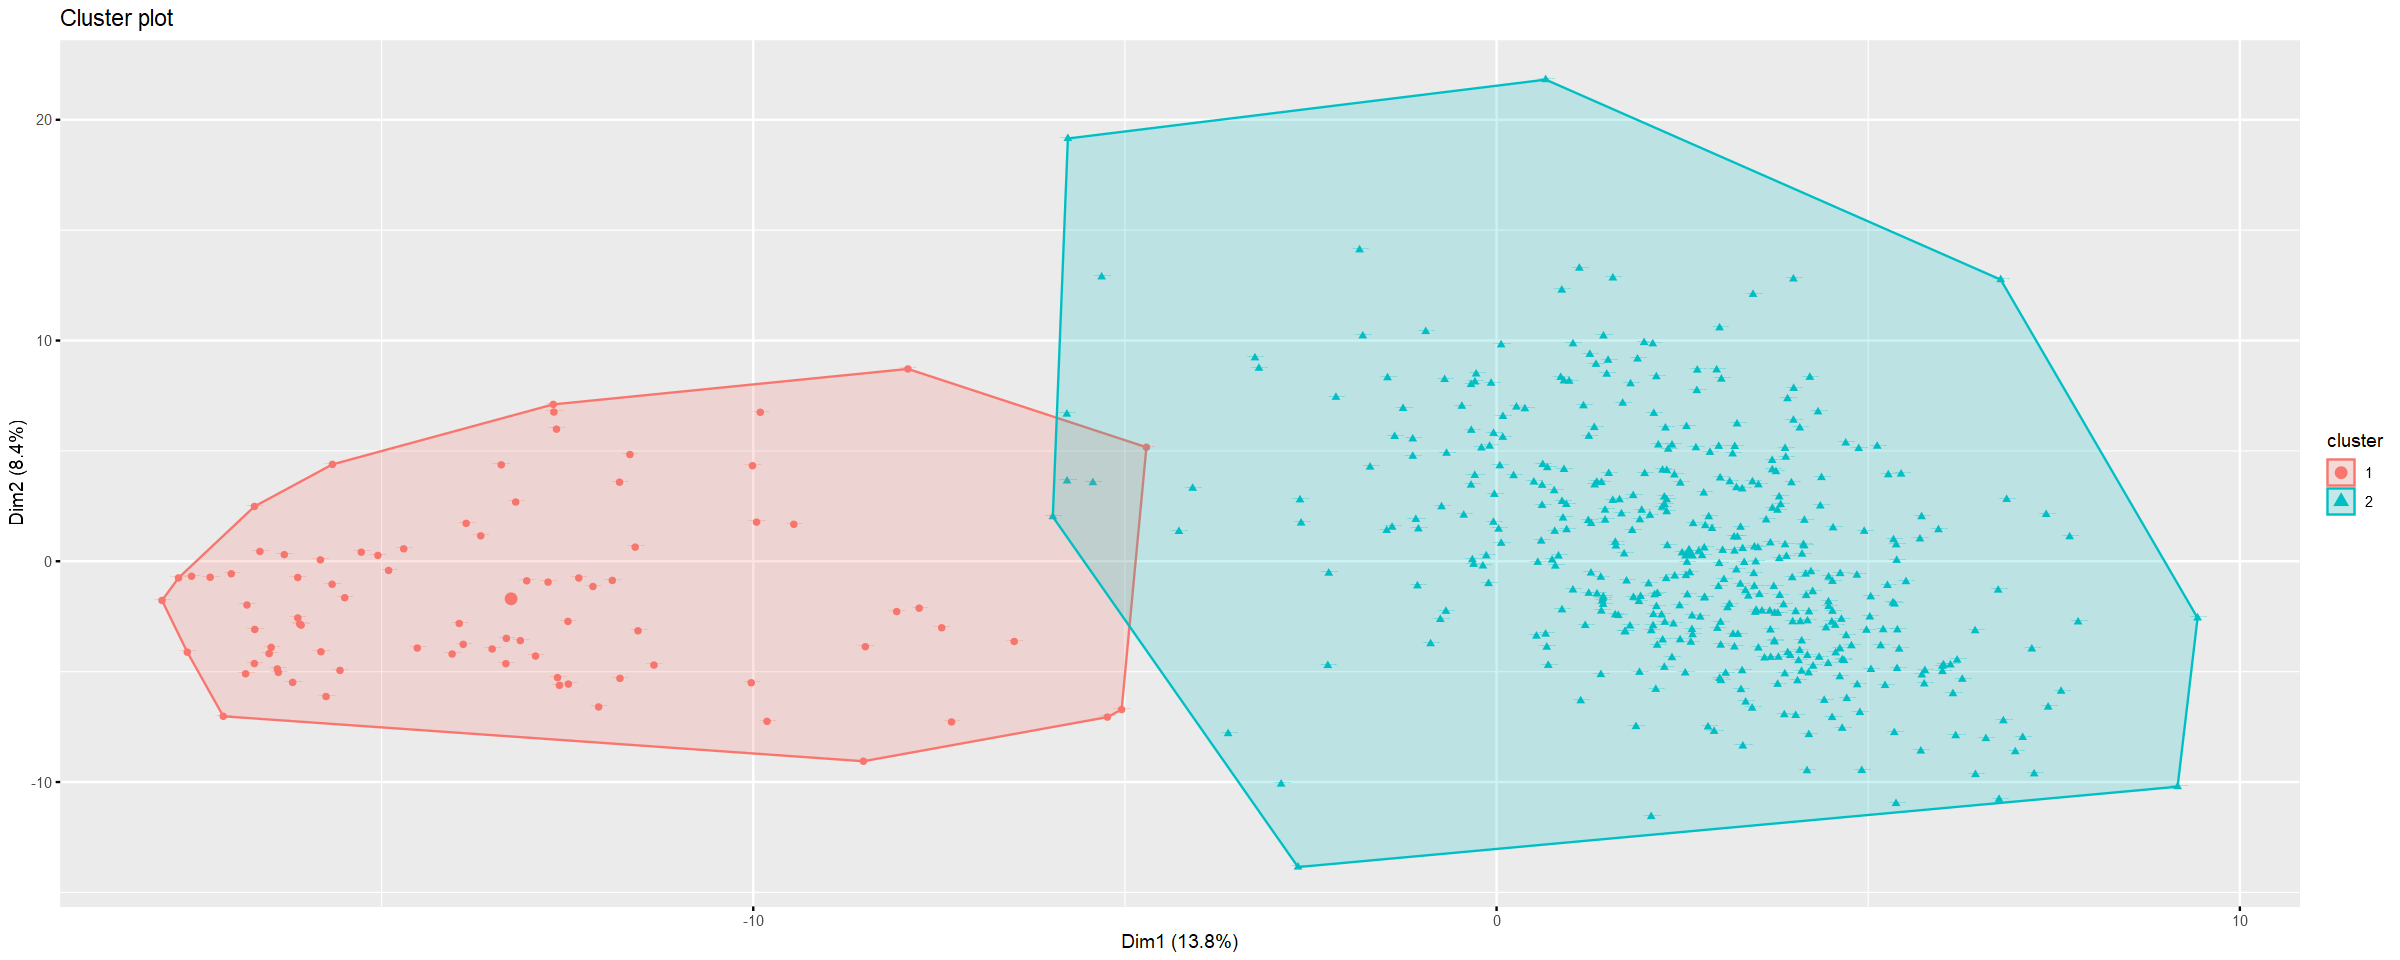

In [149]:
# visualize clustering with k=2
fviz_cluster(km, data = t(mir_limv_scaled), ellipse = T, labelsize = 1 )


In [150]:
km$cluster

TCGA-BP-4781-01A TCGA-B0-4821-01A TCGA-CJ-4872-01A TCGA-B8-5553-01A 
               2                2                2                2 
TCGA-BP-5176-01A TCGA-CJ-5671-01A TCGA-A3-A6NJ-01A TCGA-B8-4153-01B 
               2                2                2                2 
TCGA-B0-4847-01A TCGA-CJ-4634-01A TCGA-B0-5692-01A TCGA-A3-A8OW-01A 
               2                2                2                2 
TCGA-CZ-5982-01A TCGA-B8-5165-01A TCGA-B8-5549-11A TCGA-CZ-4853-01A 
               2                2                1                2 
TCGA-CJ-4902-01A TCGA-CZ-5986-11A TCGA-B0-5711-11A TCGA-CJ-4899-01A 
               2                1                1                2 
TCGA-CJ-5678-01A TCGA-CZ-4863-01A TCGA-CW-5580-11A TCGA-B8-A54D-01A 
               2                2                1                2 
TCGA-BP-4991-01A TCGA-BP-4756-01A TCGA-BP-4345-01A TCGA-A3-3346-01A 
               2                2                2                2 
TCGA-CZ-5982-11A TCGA-B8-5549-01A TCGA-BP-4801-01A TCGA-B0-4834-01A 
               1                2                2                1 
TCGA-A3-3331-01A TCGA-CJ-4912-01A TCGA-CZ-5459-01A TCGA-AK-3460-01A 
               2                2                2                2 
TCGA-CW-5587-11A TCGA-CJ-5683-01A TCGA-B0-5400-01A TCGA-BP-5183-01A 
               1                2                2                2 
TCGA-B2-5633-01A TCGA-B0-4841-01A TCGA-B8-A54I-01A TCGA-CJ-4905-01A 
               2                2                2                2 
TCGA-CJ-6033-01A TCGA-BP-4173-01A TCGA-BP-4969-01A TCGA-A3-3324-01A 
               2                2                2                2 
TCGA-A3-3385-01A TCGA-BP-4338-01A TCGA-BP-4787-01A TCGA-CZ-5466-01A 
               2                2                2                2 
TCGA-B0-4707-01A TCGA-A3-3320-01A TCGA-CJ-4873-01A TCGA-BP-4346-01A 
               2                2                2                2 
TCGA-B0-5700-01A TCGA-AK-3431-01A TCGA-A3-3322-01A TCGA-B0-5706-11A 
               2                2                2                1 
TCGA-A3-3326-01A TCGA-CJ-4907-01A TCGA-BP-4768-01A TCGA-CZ-5470-11A 
               2                2                2                1 
TCGA-B0-5711-01A TCGA-CJ-5684-01A TCGA-CZ-5451-01A TCGA-B0-5083-01A 
               2                2                2                1 
TCGA-G6-A8L8-01A TCGA-BP-4983-01A TCGA-B0-5085-01A TCGA-BP-4998-01A 
               2                2                2                2 
TCGA-B0-4852-01A TCGA-BP-4326-01A TCGA-A3-3378-01A TCGA-CJ-4878-01A 
               2                2                2                2 
TCGA-CZ-5465-11A TCGA-B0-4688-01A TCGA-BP-4765-01A TCGA-CW-5588-01A 
               1                2                2                2 
TCGA-CZ-4864-11A TCGA-CZ-4864-01A TCGA-B0-5705-11A TCGA-CZ-5455-01A 
               1                2                1                2 
TCGA-CJ-5680-11A TCGA-CJ-4637-01A TCGA-BP-4174-01A TCGA-B8-5546-01A 
               1                2                2                2 
TCGA-CJ-4870-01A TCGA-EU-5906-01A TCGA-BP-4789-01A TCGA-BP-5010-01A 
               2                2                2                2 
TCGA-A3-3370-01A TCGA-CZ-5468-01A TCGA-B0-5706-01A TCGA-BP-4803-01A 
               2                2                2                2 
TCGA-CZ-5461-01A TCGA-B8-5545-01A TCGA-BP-4974-01A TCGA-AK-3443-01A 
               2                2                2                1 
TCGA-AK-3447-01A TCGA-B0-5697-11A TCGA-B0-5106-01A TCGA-B0-4833-01A 
               1                1                2                2 
TCGA-A3-3382-01A TCGA-A3-3323-01A TCGA-B0-5084-01A TCGA-BP-5007-01A 
               2                2                2                2 
TCGA-B8-4620-01A TCGA-CZ-5984-11A TCGA-CZ-5987-11A TCGA-B8-A7U6-01A 
               2                1                1                2 
TCGA-BP-4167-01A TCGA-A3-3380-01A TCGA-A3-3317-01A TCGA-BP-5177-01A 
               2                2                2                2

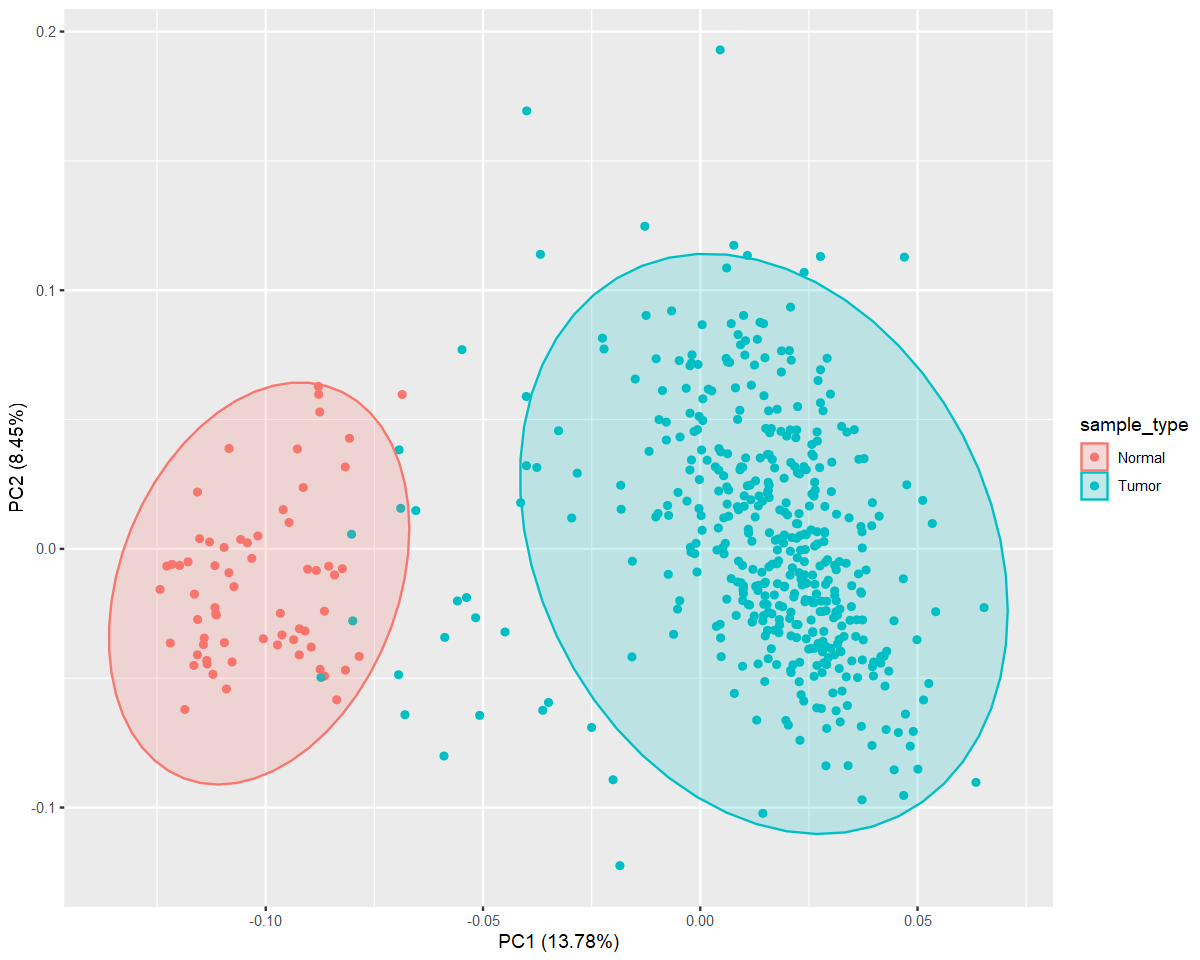

In [151]:
#PCA of normalized data
options(repr.plot.width=10,repr.plot.height=8)
norm_pca <- prcomp(t(mir_limv_scaled))
autoplot(norm_pca, frame = TRUE, frame.type= "norm", data=meta, colour="sample_type")


### Differential Analysis between Tumor and Normal

#### 1- DESEQ2

In [152]:
# create the conditions to be used in deseq contrast
cond1="Solid Tissue Normal" 
cond2="Primary Tumor"

In [153]:
# factorize sample type
meta$sample_type <- factor(meta$sample_type)

In [154]:
# get the res object of degs from deseq
mir_res_deseq=results(mir_dds.run, contrast = c("sample_type",cond1 ,cond2) )
head(mir_res_deseq)
tail(mir_res_deseq)

log2 fold change (MLE): sample_type Solid Tissue Normal vs Primary Tumor 
Wald test p-value: sample type Solid.Tissue.Normal vs Primary.Tumor 
DataFrame with 6 rows and 6 columns
                baseMean log2FoldChange     lfcSE       stat    pvalue
               <numeric>      <numeric> <numeric>  <numeric> <numeric>
hsa-mir-6826   0.0798844     -0.3644177  0.912345 -0.3994297  0.689577
hsa-mir-6729   0.0563965     -0.0312224  1.439736 -0.0216862  0.982698
hsa-mir-548d-2 0.0934510     -0.3611251  0.820124 -0.4403300  0.659698
hsa-mir-6717   0.0922195      0.0728132  0.796714  0.0913919  0.927181
hsa-mir-6721   0.1179135      0.0199314  0.670139  0.0297422  0.976273
hsa-mir-6807   0.0975419     -0.3507418  0.797487 -0.4398087  0.660076
                    padj
               <numeric>
hsa-mir-6826          NA
hsa-mir-6729          NA
hsa-mir-548d-2        NA
hsa-mir-6717          NA
hsa-mir-6721          NA
hsa-mir-6807          NA

log2 fold change (MLE): sample_type Solid Tissue Normal vs Primary Tumor 
Wald test p-value: sample type Solid.Tissue.Normal vs Primary.Tumor 
DataFrame with 6 rows and 6 columns
             baseMean log2FoldChange     lfcSE      stat      pvalue
            <numeric>      <numeric> <numeric> <numeric>   <numeric>
hsa-mir-10a    102927      1.2071637 0.1400471   8.61970 6.71292e-18
hsa-mir-22     180574     -0.0855393 0.0854380  -1.00119 3.16737e-01
hsa-mir-143    193039     -0.2717360 0.1314819  -2.06672 3.87607e-02
hsa-mir-30a    470869      0.7552198 0.0949877   7.95071 1.85445e-15
hsa-mir-10b    515124      1.0419043 0.1018478  10.23001 1.45499e-24
hsa-mir-21     449038     -2.1639373 0.1076522 -20.10120 7.20370e-90
                   padj
              <numeric>
hsa-mir-10a 5.78518e-17
hsa-mir-22  4.13863e-01
hsa-mir-143 6.85011e-02
hsa-mir-30a 1.30492e-14
hsa-mir-10b 1.77139e-23
hsa-mir-21  9.20872e-88

In [156]:
# check if there is nan values in padj and see the summary of res
sum(is.na(mir_res_deseq$padj))
mir_res_deseq = mir_res_deseq[!is.na(mir_res_deseq$padj),]
summary(mir_res_deseq)


[1] 101


out of 767 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 196, 26%
LFC < 0 (down)     : 254, 33%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [158]:
# filtration of res accrding to cutoff of padj=0.05 & logfchage>1 or <-1
mir_res_deseq = as.data.frame(mir_res_deseq)
mir_deseq.degs = mir_res_deseq[mir_res_deseq$padj < 0.05 & abs(mir_res_deseq$log2FoldChange)>1,]
mir_deseq.degs=mir_deseq.degs[order(mir_deseq.degs$padj), ]
dim(mir_deseq.degs)
head(mir_deseq.degs)
tail(mir_deseq.degs)

[1] 200   6

baseMean     log2FoldChange lfcSE      stat      pvalue       
hsa-mir-210    7803.98213 -3.012091      0.13313172 -22.62489 2.465509e-113
hsa-mir-122      62.00512 -6.353386      0.28873230 -22.00442 2.612597e-107
hsa-mir-155    1574.52508 -3.577665      0.16550360 -21.61684 1.247274e-103
hsa-mir-106b    786.42746 -1.165145      0.05520082 -21.10738  6.803563e-99
hsa-mir-508     120.49710  4.450421      0.21458389  20.73977  1.516356e-95
hsa-mir-21   449038.33271 -2.163937      0.10765217 -20.10120  7.203695e-90
             padj         
hsa-mir-210  1.891045e-110
hsa-mir-122  1.001931e-104
hsa-mir-155  3.188864e-101
hsa-mir-106b  1.304583e-96
hsa-mir-508   2.326090e-93
hsa-mir-21    9.208724e-88

baseMean  log2FoldChange lfcSE     stat      pvalue     
hsa-mir-3654   0.3497267 -1.060324      0.3894553 -2.722583 0.006477385
hsa-mir-1910   0.4159002 -1.113850      0.4177043 -2.666600 0.007662286
hsa-mir-219a-2 0.4247649 -1.181846      0.4516506 -2.616727 0.008877722
hsa-mir-873    0.4187184  1.158600      0.4525251  2.560301 0.010458163
hsa-mir-802    1.7543044 -1.325786      0.5248433 -2.526060 0.011534972
hsa-mir-1304   0.7941779 -1.039542      0.4142037 -2.509735 0.012082186
               padj      
hsa-mir-3654   0.01376220
hsa-mir-1910   0.01605730
hsa-mir-219a-2 0.01820645
hsa-mir-873    0.02088909
hsa-mir-802    0.02292053
hsa-mir-1304   0.02370086

In [159]:
# save the degs from deseq
write.csv(mir_deseq.degs, "mir_degs_deseq_TvsN.csv")


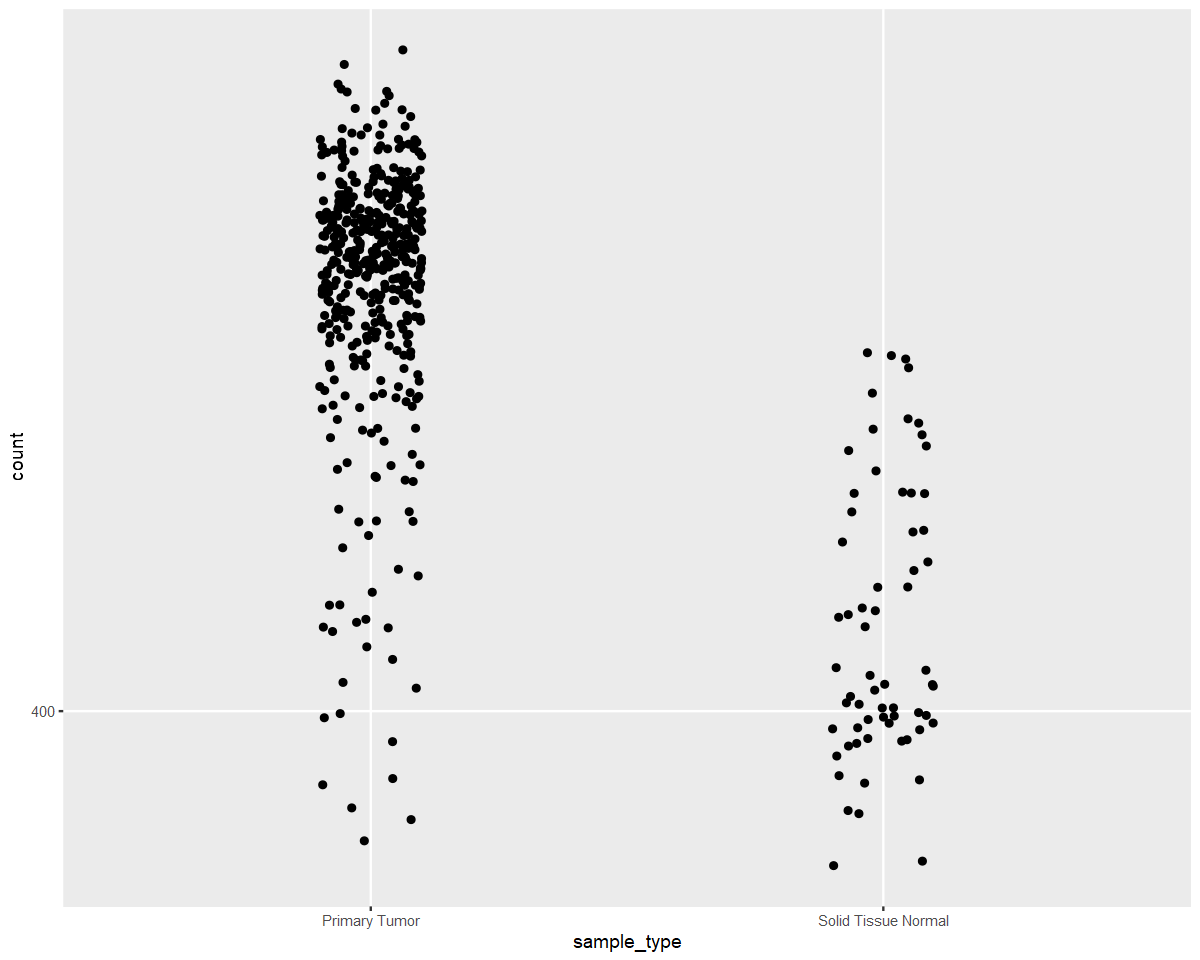

In [165]:
# plot counts from deseq for some miRNA
d <- plotCounts(mir_dds.run, gene="hsa-mir-210", intgroup="sample_type", 
                returnData=TRUE)

ggplot(d, aes(x=sample_type, y=count)) + 
  geom_point(position=position_jitter(w=0.1,h=0)) + 
  scale_y_log10(breaks=c(25,100,400))

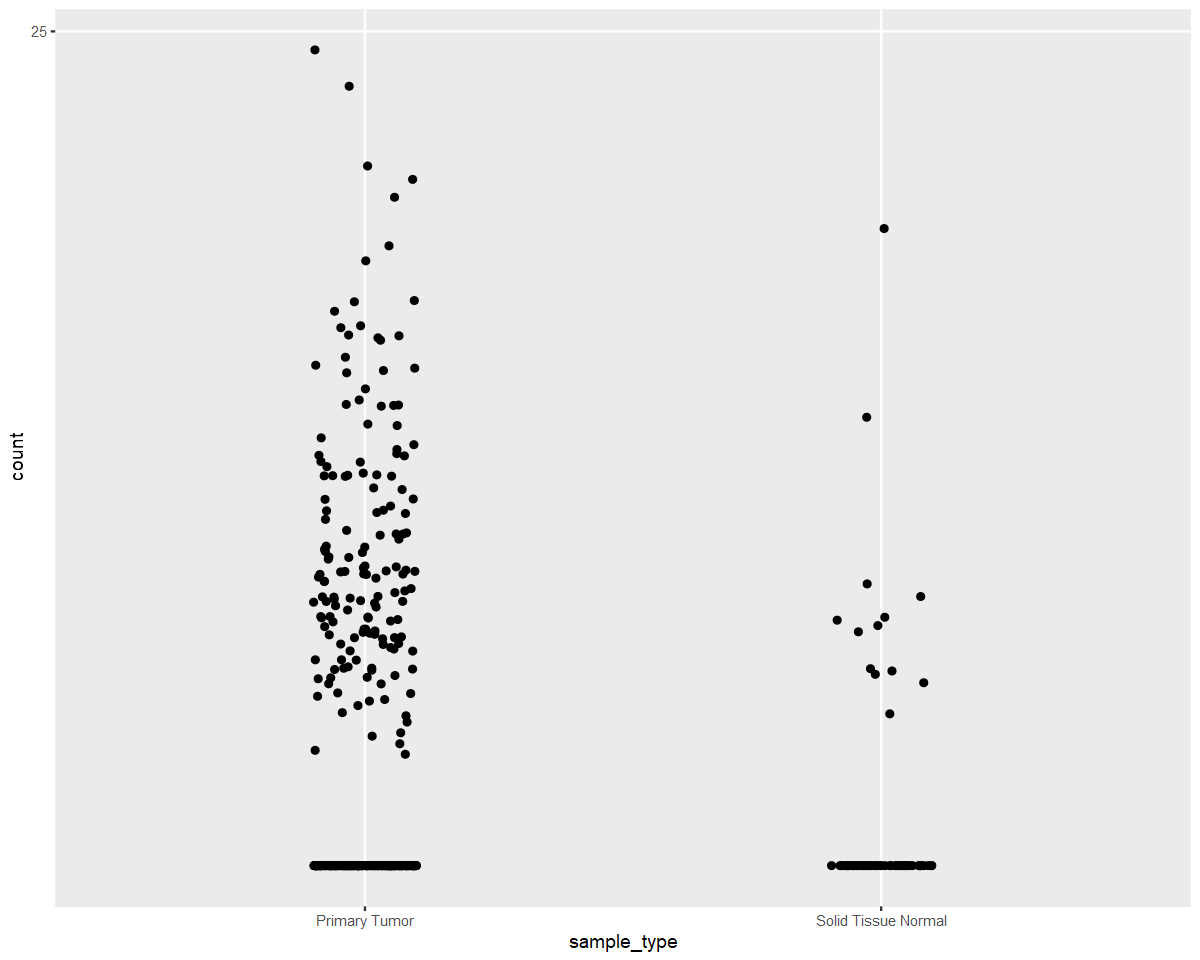

In [163]:
# plot counts from deseq for some miRNA
d <- plotCounts(mir_dds.run, gene="hsa-mir-1304", intgroup="sample_type", 
                returnData=TRUE)

ggplot(d, aes(x=sample_type, y=count)) + 
  geom_point(position=position_jitter(w=0.1,h=0)) + 
  scale_y_log10(breaks=c(25,100,400))

### 2- Using Limma 

In [166]:
# make contrast based on sample type groups to be used in lima
contrast<-makeContrasts(Normal-Tumor,levels=design) # pos logfc means in cancer is more than normal


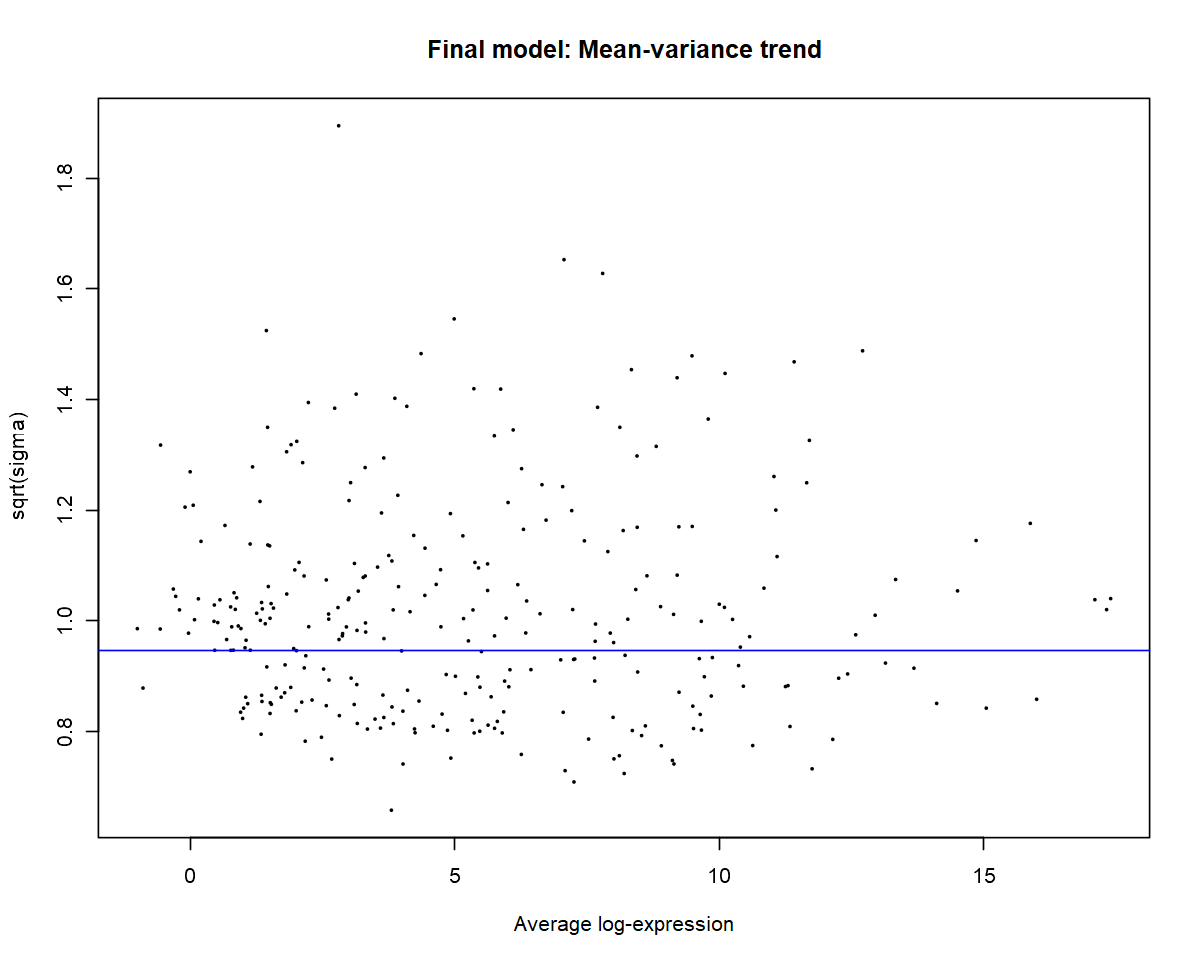

In [167]:
# fitting limma linear model on voom stabilized data
vfit <- lmFit(mir_lim_v, design)
vfit <- contrasts.fit(vfit, contrast)
efit <- eBayes(vfit)
plotSA(efit, main="Final model: Mean-variance trend")

In [168]:
# get the limma res object
mir_res_lim=topTable(efit, adjust.method='fdr', number=999999999,p.value=1,coef = 1)
dim(mir_res_lim)
head(mir_res_lim)
tail(mir_res_lim)

[1] 298   6

logFC    AveExpr     t        P.Value       adj.P.Val    
hsa-mir-141   5.599461  3.03355905 31.54002 5.588375e-122 1.665336e-119
hsa-mir-206   3.829895 -0.89117161 30.04926 5.408589e-115 8.058798e-113
hsa-mir-200c  5.431964  5.75072063 29.11423 1.462351e-110 1.452602e-108
hsa-mir-129-1 3.989806 -0.03067846 27.86100 1.448006e-104 1.078765e-102
hsa-mir-184   4.278873 -0.99823228 27.28495 8.632988e-102 5.145261e-100
hsa-mir-129-2 3.696790  0.08292913 24.45813  4.978447e-88  2.472628e-86
              B       
hsa-mir-141   268.0501
hsa-mir-206   251.8861
hsa-mir-200c  241.7886
hsa-mir-129-1 228.0264
hsa-mir-184   221.6327
hsa-mir-129-2 190.0802

logFC       AveExpr   t          P.Value   adj.P.Val B        
hsa-mir-574   0.03325992  5.807057  0.4359850 0.6630318 0.6773478 -7.973129
hsa-mir-3607 -0.08388868  7.042284 -0.5003855 0.6170192 0.6362344 -7.984167
hsa-mir-197  -0.03307503  7.995170 -0.4548376 0.6494193 0.6673343 -8.030089
hsa-mir-582  -0.08053297  8.123315 -0.4178429 0.6762376 0.6877775 -8.047779
hsa-mir-30e  -0.01728703 14.112498 -0.2322432 0.8164421 0.8251959 -8.142477
hsa-mir-100  -0.01866385 11.655176 -0.1172000 0.9067476 0.9067476 -8.165124

In [169]:
# filteration of res to get degs from limma based on cutoff padj=0.05 and logFchange>1 or<-1
mir_lim.degs <- mir_res_lim %>% filter(adj.P.Val < 0.05 & abs(logFC) >1)
dim(mir_lim.degs)
head(mir_lim.degs)

[1] 121   6

logFC    AveExpr     t        P.Value       adj.P.Val    
hsa-mir-141   5.599461  3.03355905 31.54002 5.588375e-122 1.665336e-119
hsa-mir-206   3.829895 -0.89117161 30.04926 5.408589e-115 8.058798e-113
hsa-mir-200c  5.431964  5.75072063 29.11423 1.462351e-110 1.452602e-108
hsa-mir-129-1 3.989806 -0.03067846 27.86100 1.448006e-104 1.078765e-102
hsa-mir-184   4.278873 -0.99823228 27.28495 8.632988e-102 5.145261e-100
hsa-mir-129-2 3.696790  0.08292913 24.45813  4.978447e-88  2.472628e-86
              B       
hsa-mir-141   268.0501
hsa-mir-206   251.8861
hsa-mir-200c  241.7886
hsa-mir-129-1 228.0264
hsa-mir-184   221.6327
hsa-mir-129-2 190.0802

### Common DEGs between Deseq and lima

In [171]:
# show the common degs between lima and deseq
mir_degs_deseq <- rownames(mir_deseq.degs)
mir_degs_lim <- rownames(mir_lim.degs)
com_degs = intersect(mir_degs_deseq, mir_degs_lim)
length(com_degs)
com_degs

[1] 93

[1] "hsa-mir-210"    "hsa-mir-122"    "hsa-mir-155"    "hsa-mir-106b"  
 [5] "hsa-mir-508"    "hsa-mir-21"     "hsa-mir-15a"    "hsa-mir-584"   
 [9] "hsa-mir-2355"   "hsa-mir-514a-2" "hsa-mir-3613"   "hsa-mir-362"   
[13] "hsa-mir-509-3"  "hsa-mir-509-2"  "hsa-mir-629"    "hsa-mir-500a"  
[17] "hsa-mir-509-1"  "hsa-mir-16-2"   "hsa-mir-188"    "hsa-mir-592"   
[21] "hsa-mir-885"    "hsa-mir-142"    "hsa-mir-452"    "hsa-mir-224"   
[25] "hsa-mir-660"    "hsa-mir-363"    "hsa-mir-429"    "hsa-mir-501"   
[29] "hsa-mir-181b-1" "hsa-mir-4772"   "hsa-mir-206"    "hsa-mir-129-1" 
[33] "hsa-mir-200a"   "hsa-mir-200b"   "hsa-mir-532"    "hsa-let-7e"    
[37] "hsa-mir-342"    "hsa-mir-129-2"  "hsa-mir-500b"   "hsa-mir-4677"  
[41] "hsa-mir-1270"   "hsa-mir-125b-2" "hsa-mir-203a"   "hsa-mir-30c-2" 
[45] "hsa-mir-10b"    "hsa-mir-200c"   "hsa-mir-149"    "hsa-mir-365a"  
[49] "hsa-mir-4652"   "hsa-mir-146a"   "hsa-mir-144"    "hsa-mir-1-1"   
[53] "hsa-mir-625"    "hsa-mir-20b"    "hsa-mir-1271"   "hsa-mir-1-2"   
[57] "hsa-mir-184"    "hsa-mir-10a"    "hsa-mir-616"    "hsa-mir-146b"  
[61] "hsa-mir-5586"   "hsa-mir-203b"   "hsa-mir-215"    "hsa-mir-204"   
[65] "hsa-mir-127"    "hsa-mir-1251"   "hsa-mir-199b"   "hsa-mir-3130-1"
[69] "hsa-mir-3130-2" "hsa-mir-374c"   "hsa-mir-138-1"  "hsa-mir-214"   
[73] "hsa-mir-599"    "hsa-mir-136"    "hsa-mir-451a"   "hsa-mir-33b"   
[77] "hsa-mir-3065"   "hsa-mir-335"    "hsa-mir-135a-2" "hsa-mir-141"   
[81] "hsa-mir-675"    "hsa-mir-135a-1" "hsa-mir-323b"   "hsa-mir-493"   
[85] "hsa-mir-337"    "hsa-mir-33a"    "hsa-mir-133a-2" "hsa-mir-133a-1"
[89] "hsa-mir-483"    "hsa-mir-217"    "hsa-mir-411"    "hsa-mir-1269a" 
[93] "hsa-mir-187"

In [172]:
# show the up and downregulated miRNA from limma 
lim.degs_up <- mir_res_lim %>% filter(adj.P.Val < 0.05 & logFC > 1)
lim.degs_down <- mir_res_lim %>% filter(adj.P.Val < 0.05 & logFC <(-1))

dim(lim.degs_up)
head(lim.degs_up)

dim(lim.degs_down)
head(lim.degs_down)

[1] 73  6

logFC    AveExpr     t        P.Value       adj.P.Val    
hsa-mir-141   5.599461  3.03355905 31.54002 5.588375e-122 1.665336e-119
hsa-mir-206   3.829895 -0.89117161 30.04926 5.408589e-115 8.058798e-113
hsa-mir-200c  5.431964  5.75072063 29.11423 1.462351e-110 1.452602e-108
hsa-mir-129-1 3.989806 -0.03067846 27.86100 1.448006e-104 1.078765e-102
hsa-mir-184   4.278873 -0.99823228 27.28495 8.632988e-102 5.145261e-100
hsa-mir-129-2 3.696790  0.08292913 24.45813  4.978447e-88  2.472628e-86
              B       
hsa-mir-141   268.0501
hsa-mir-206   251.8861
hsa-mir-200c  241.7886
hsa-mir-129-1 228.0264
hsa-mir-184   221.6327
hsa-mir-129-2 190.0802

[1] 48  6

logFC     AveExpr   t         P.Value      adj.P.Val    B       
hsa-mir-106b -1.319842  8.205014 -23.05389 3.896819e-81 1.658931e-79 174.1477
hsa-mir-21   -2.470050 17.103140 -22.36244 9.778552e-78 3.642511e-76 166.3024
hsa-mir-15a  -1.295147  7.088619 -21.52096 1.336906e-73 3.983981e-72 156.8484
hsa-mir-210  -3.492173 11.036615 -20.83856 2.985788e-70 8.088771e-69 149.1164
hsa-mir-2355 -1.585783  5.927829 -18.69021 8.802469e-60 2.006700e-58 125.1492
hsa-mir-155  -3.374600  8.447541 -17.63329 1.057134e-54 1.853093e-53 113.4451

In [174]:
# show the up and downregulated miRNA from deseq 
degs_deseq_up <- mir_res_deseq[mir_res_deseq$padj < 0.05 & mir_res_deseq$log2FoldChange>1,]
degs_deseq_down <- mir_res_deseq[mir_res_deseq$padj < 0.05 & mir_res_deseq$log2FoldChange<(-1),]


dim(degs_deseq_up)
head(degs_deseq_up)

dim(degs_deseq_down)
head(degs_deseq_down)

[1] 92  6

baseMean  log2FoldChange lfcSE     stat     pvalue      
hsa-mir-6810  0.2455531 1.139823       0.4095337 2.783220 5.382222e-03
hsa-mir-5708  0.2215801 1.907226       0.5351110 3.564169 3.650106e-04
hsa-mir-6723  0.2991421 1.619492       0.3911098 4.140762 3.461538e-05
hsa-mir-6762  0.3494472 1.079398       0.2940075 3.671327 2.412940e-04
hsa-mir-6507  0.3029515 2.184702       0.4514995 4.838769 1.306455e-06
hsa-mir-548ba 0.3944247 1.066023       0.3553283 3.000106 2.698856e-03
              padj        
hsa-mir-6810  1.172774e-02
hsa-mir-5708  9.687306e-04
hsa-mir-6723  1.092593e-04
hsa-mir-6762  6.562855e-04
hsa-mir-6507  4.726654e-06
hsa-mir-548ba 6.160781e-03

[1] 108   6

baseMean  log2FoldChange lfcSE     stat      pvalue      
hsa-mir-548o-2 0.4883142 -1.383907      0.2867608 -4.825997 1.393045e-06
hsa-mir-3654   0.3497267 -1.060324      0.3894553 -2.722583 6.477385e-03
hsa-mir-3942   0.4802104 -1.124649      0.3198977 -3.515651 4.386773e-04
hsa-mir-3920   0.4938700 -1.075834      0.3254482 -3.305701 9.473911e-04
hsa-mir-4777   0.4903795 -1.169838      0.3196979 -3.659198 2.530059e-04
hsa-mir-320e   0.5551753 -1.042838      0.3191334 -3.267719 1.084179e-03
               padj        
hsa-mir-548o-2 5.016270e-06
hsa-mir-3654   1.376220e-02
hsa-mir-3942   1.144440e-03
hsa-mir-3920   2.344029e-03
hsa-mir-4777   6.841136e-04
hsa-mir-320e   2.656757e-03

In [175]:
# common downregulated miRNAs
degs_deseq_down <- rownames(degs_deseq_down)
degs_lim_down <- rownames(lim.degs_down)
com_degs_down = intersect(degs_deseq_down, degs_lim_down)
length(com_degs_down)
com_degs_down

[1] 37

[1] "hsa-mir-3130-2" "hsa-mir-3130-1" "hsa-mir-4652"   "hsa-mir-5586"  
 [5] "hsa-mir-33b"    "hsa-mir-4677"   "hsa-mir-4772"   "hsa-mir-616"   
 [9] "hsa-mir-374c"   "hsa-mir-1271"   "hsa-mir-3613"   "hsa-mir-1270"  
[13] "hsa-mir-599"    "hsa-mir-885"    "hsa-mir-584"    "hsa-mir-2355"  
[17] "hsa-mir-122"    "hsa-mir-592"    "hsa-mir-629"    "hsa-mir-365a"  
[21] "hsa-mir-224"    "hsa-mir-452"    "hsa-mir-15a"    "hsa-mir-146a"  
[25] "hsa-mir-625"    "hsa-mir-181b-1" "hsa-mir-342"    "hsa-mir-215"   
[29] "hsa-mir-106b"   "hsa-mir-16-2"   "hsa-mir-144"    "hsa-mir-155"   
[33] "hsa-mir-146b"   "hsa-mir-451a"   "hsa-mir-210"    "hsa-mir-142"   
[37] "hsa-mir-21"

In [176]:
# common upregulated miRNAs
degs_deseq_up <- rownames(degs_deseq_up)
degs_lim_up <- rownames(lim.degs_up)
com_degs_up = intersect(degs_deseq_up, degs_lim_up)
length(com_degs_up)
com_degs_up

[1] 55

[1] "hsa-mir-138-1"  "hsa-mir-133a-2" "hsa-mir-133a-1" "hsa-mir-188"   
 [5] "hsa-mir-500b"   "hsa-mir-411"    "hsa-mir-323b"   "hsa-mir-1-1"   
 [9] "hsa-mir-1-2"    "hsa-mir-509-1"  "hsa-mir-509-2"  "hsa-mir-135a-1"
[13] "hsa-mir-129-1"  "hsa-mir-214"    "hsa-mir-135a-2" "hsa-mir-149"   
[17] "hsa-mir-509-3"  "hsa-mir-129-2"  "hsa-mir-203b"   "hsa-mir-33a"   
[21] "hsa-mir-1251"   "hsa-mir-363"    "hsa-mir-184"    "hsa-mir-493"   
[25] "hsa-mir-136"    "hsa-mir-362"    "hsa-mir-335"    "hsa-mir-660"   
[29] "hsa-mir-20b"    "hsa-mir-429"    "hsa-mir-337"    "hsa-mir-514a-2"
[33] "hsa-mir-501"    "hsa-mir-206"    "hsa-mir-3065"   "hsa-mir-187"   
[37] "hsa-mir-483"    "hsa-mir-217"    "hsa-mir-200b"   "hsa-mir-200a"  
[41] "hsa-mir-125b-2" "hsa-mir-508"    "hsa-mir-141"    "hsa-mir-500a"  
[45] "hsa-mir-675"    "hsa-mir-204"    "hsa-mir-203a"   "hsa-mir-532"   
[49] "hsa-mir-127"    "hsa-let-7e"     "hsa-mir-30c-2"  "hsa-mir-200c"  
[53] "hsa-mir-199b"   "hsa-mir-10a"    "hsa-mir-10b"

#### Save the differentially expressed miRNA 

In [177]:
write.csv(mir_lim.degs, "mir_lim.degs.csv")

In [179]:
write.table(com_degs, "com_mir_degs_deseq_lima.txt")

In [181]:
write.table(com_degs_up, "com_mir_degs_deseq_lima_up.txt")

In [182]:
write.table(com_degs_down, "com_mir_degs_deseq_lima_down.txt")

### Visualization using volcano, pca and heatmap 

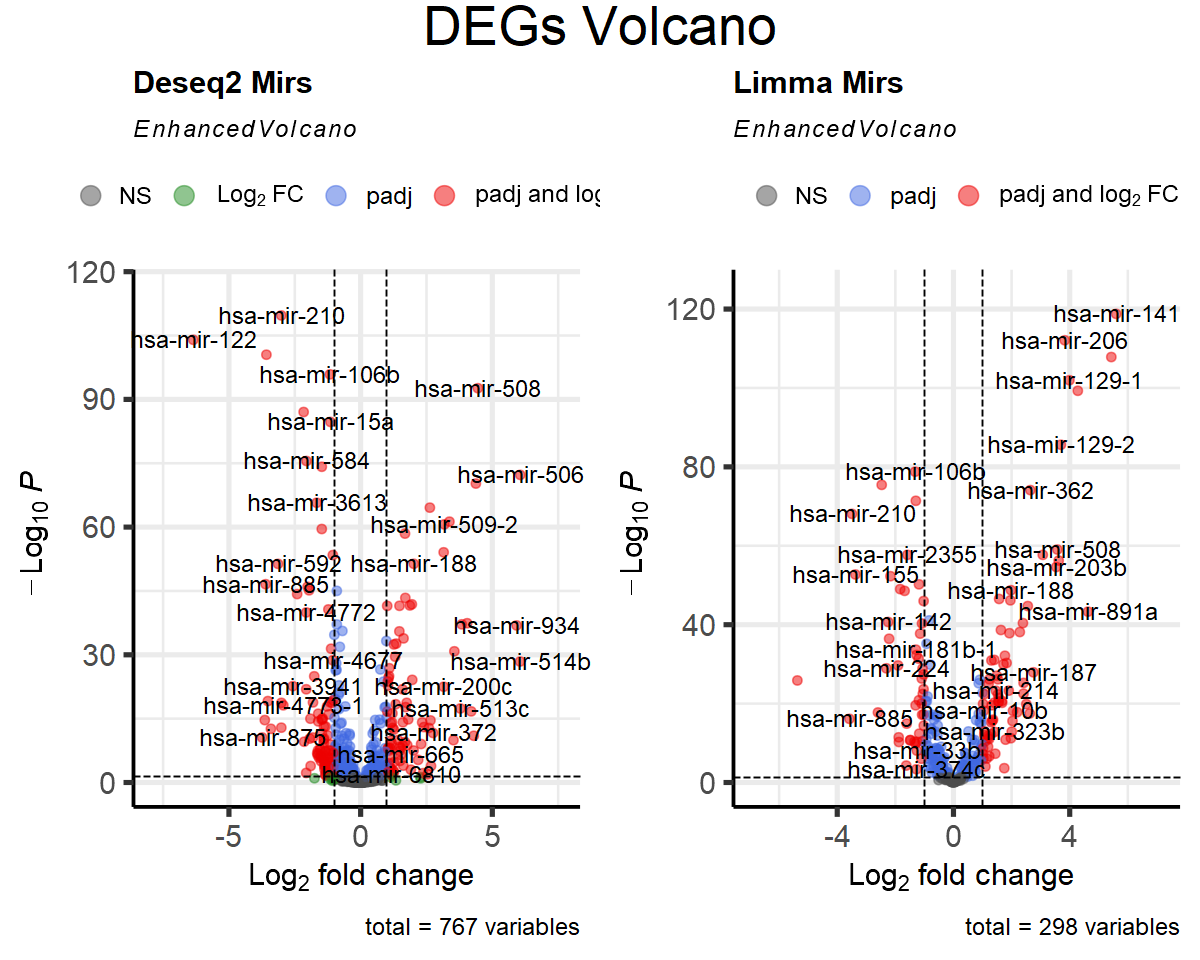

In [189]:
# volcanoplot of differentially expressed miRNAs from deseq and limma
p1<-EnhancedVolcano(mir_res_deseq,
                lab = rownames(mir_res_deseq),
                x = 'log2FoldChange',
                y = 'padj',
                FCcutoff = 1,
                pCutoff = 0.05,
                title = "Deseq2 Mirs",
                legendLabels = c("NS", expression(Log[2] ~ FC), "padj", expression(padj ~ and
                                                                                   ~ log[2] ~ FC))
)
p2<-EnhancedVolcano(mir_res_lim,
                lab = rownames(mir_res_lim),
                x = 'logFC',
                y = 'adj.P.Val',
                FCcutoff = 1,
                pCutoff = 0.05,
                title = "Limma Mirs",
                legendLabels = c("NS", expression(Log[2] ~ FC), "padj", expression(padj ~ and
                                                                                   ~ log[2] ~ FC))
)
library(gridExtra)
library(grid)
grid.arrange(p1, p2,
             ncol=2,
             top = textGrob('DEGs Volcano',
                            just = c('center'),
                            gp = gpar(fontsize = 32)))

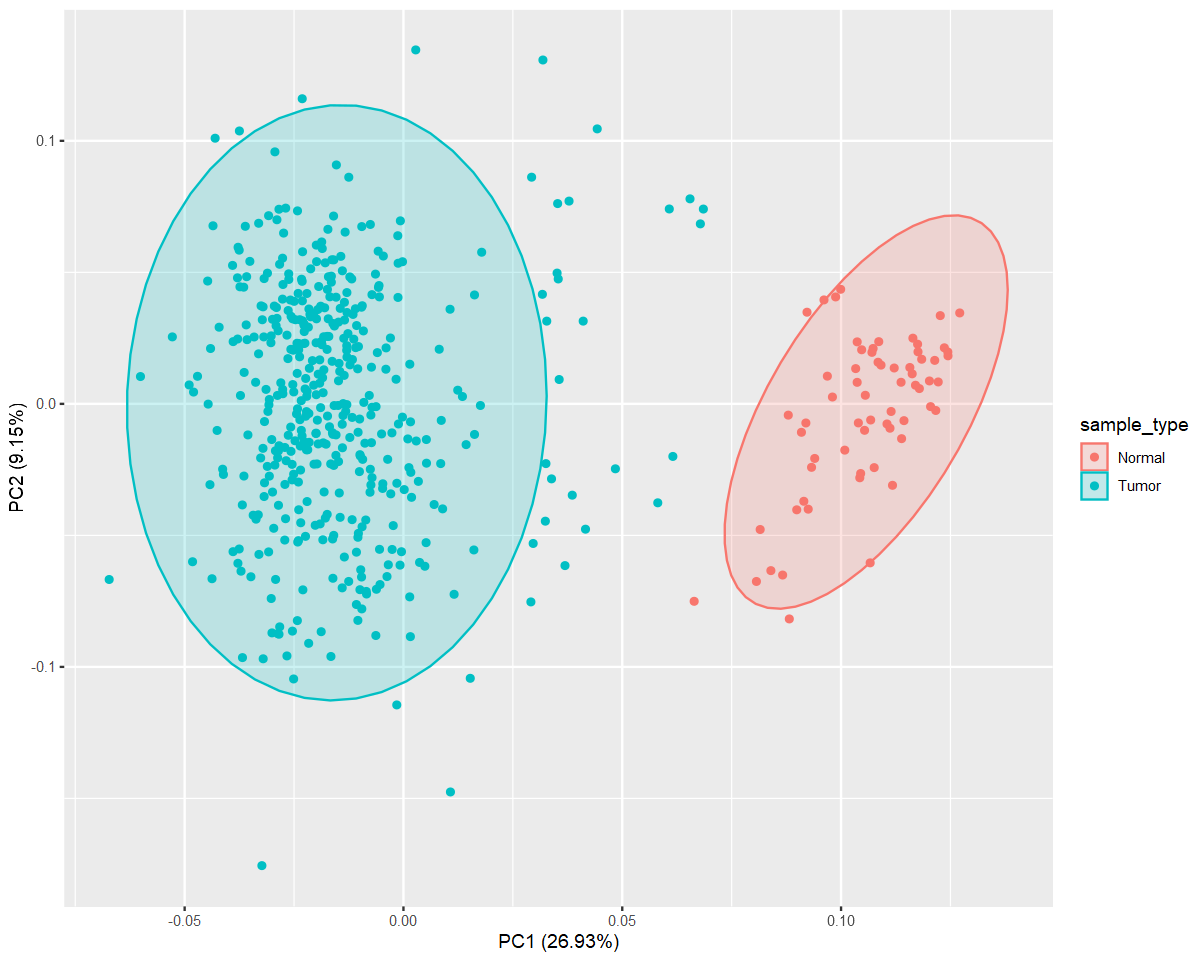

In [184]:
# PCA visualization of DE miRNA 
degs_pca <- prcomp(t(mir_limv_scaled[com_degs,]))
autoplot(degs_pca, frame.type="norm", data=meta, colour="sample_type")


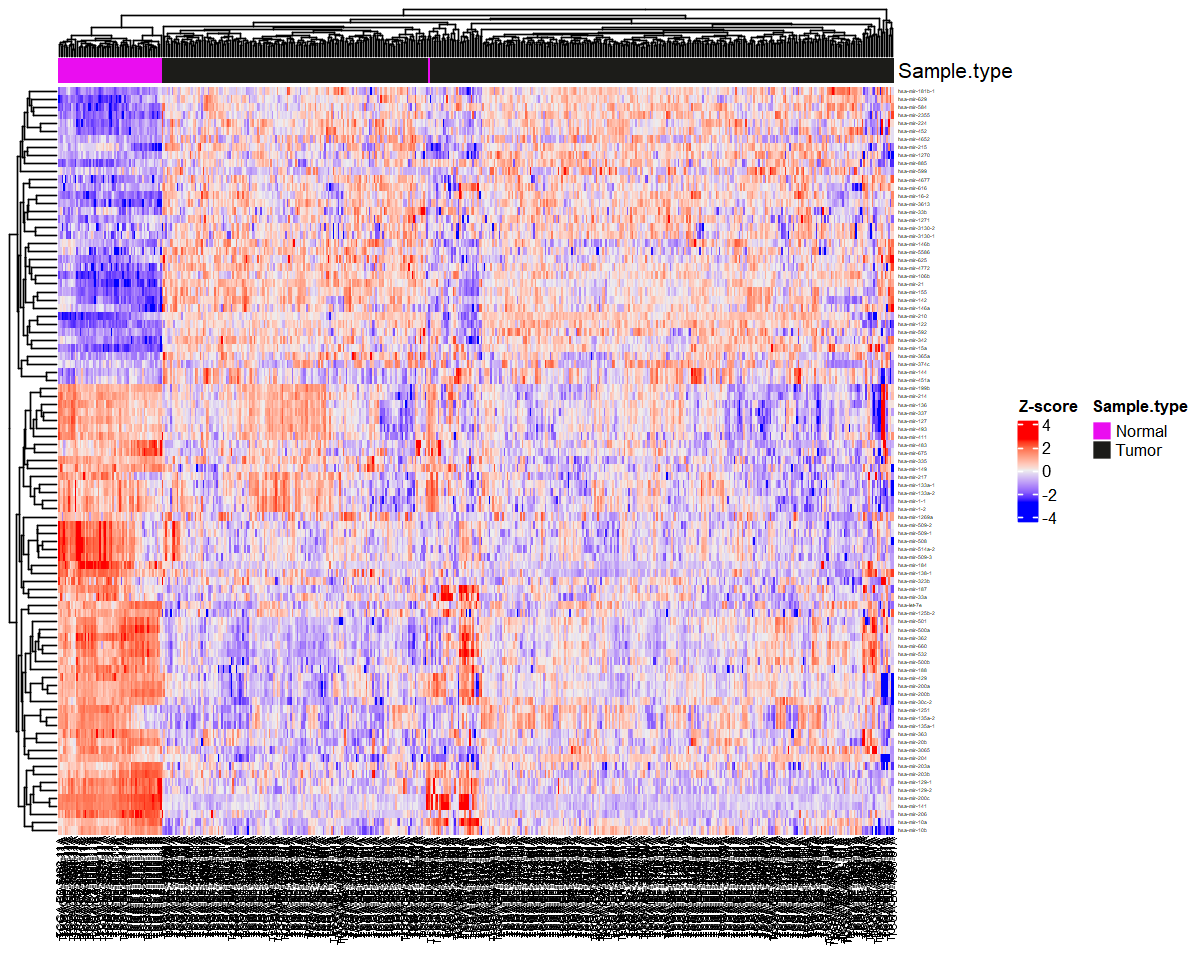

In [185]:
# heatmap of DE miRNA
options(repr.plot.width=10,repr.plot.height=8)
column_ha = HeatmapAnnotation(Sample.type = meta$sample_type)
#Heatmap(exp_deseq[rownames(exp_res.degs),], row_names_gp = gpar(fontsize = 2.5),name="Exp", column_names_gp = gpar(fontsize = 6), top_annotation = column_ha)
Heatmap(mir_limv_scaled[com_degs,],row_names_gp = gpar(fontsize = 2.5),name="Z-score", column_names_gp = gpar(fontsize = 6), top_annotation = column_ha)

### Venn diagram for the common degs between deseq2 and limma

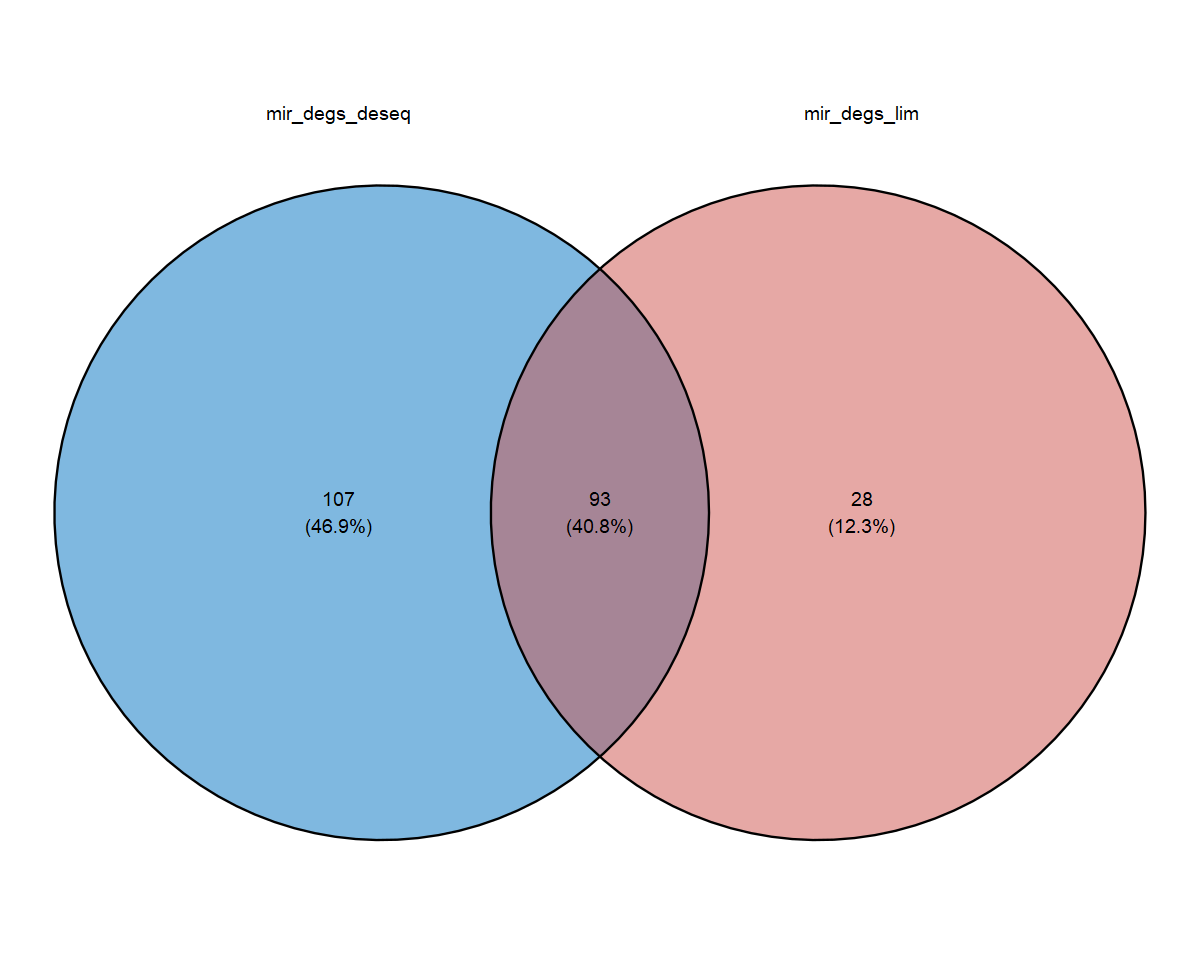

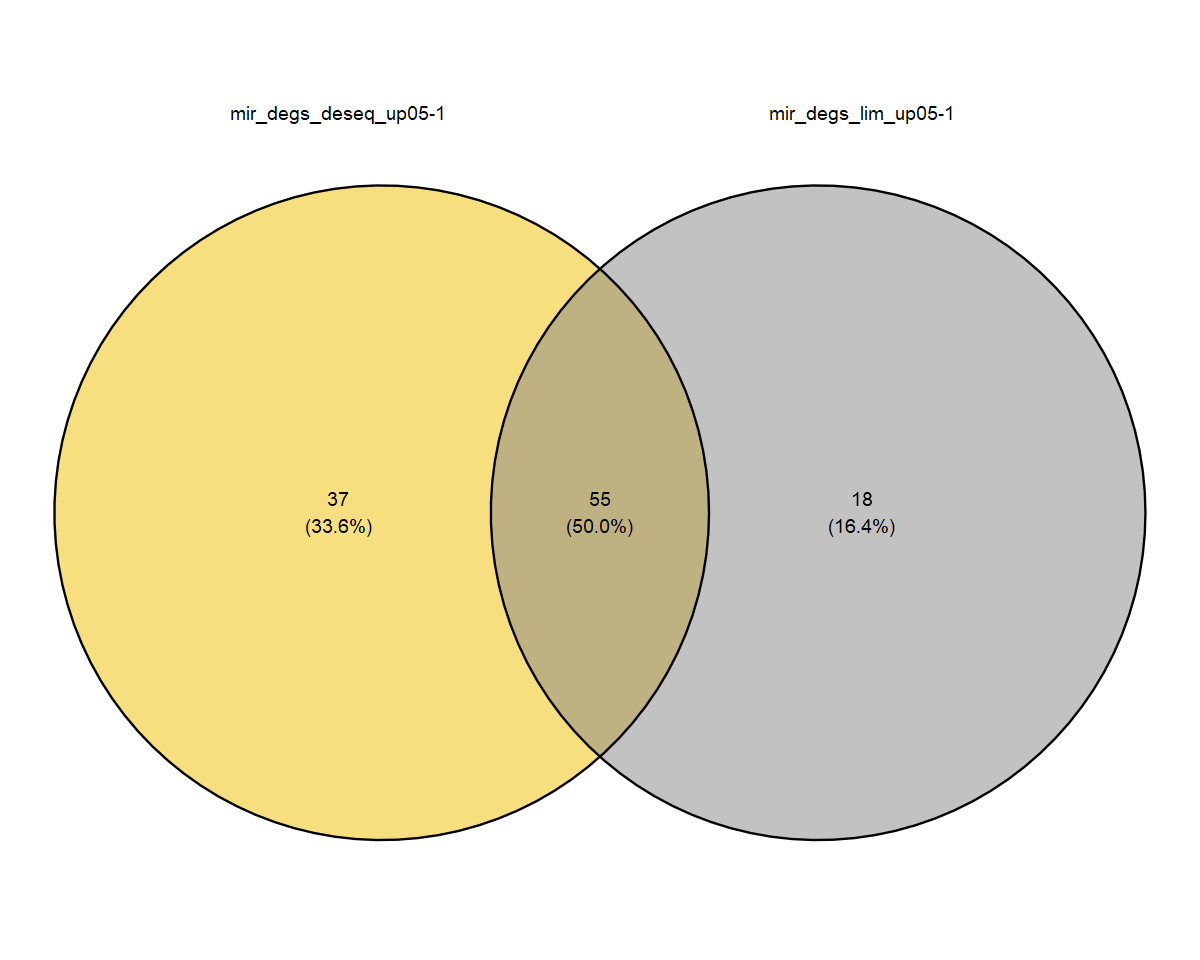

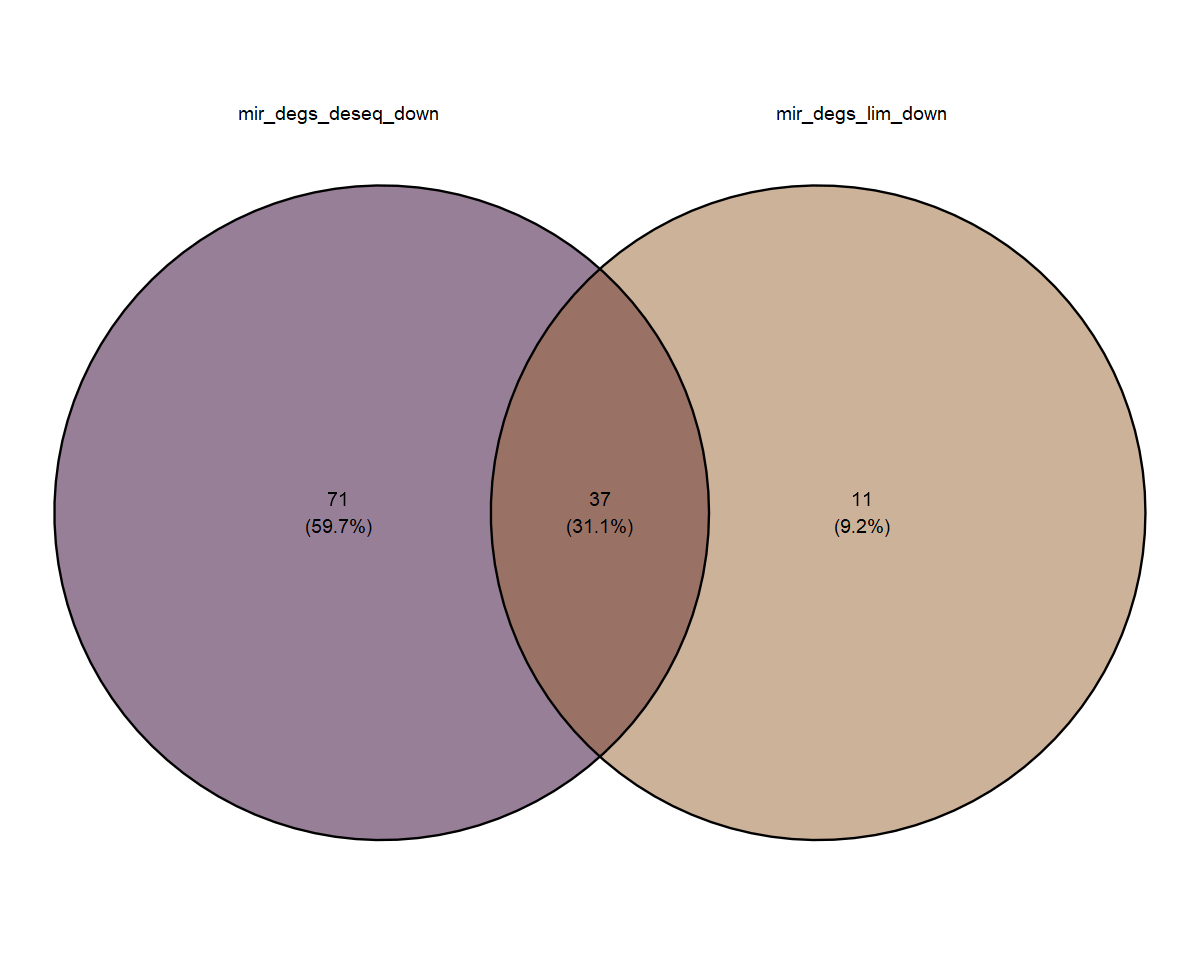

In [188]:
# Venn diagram to show the intesected DE miRNA between deseq and limma and intersected up & down miRNA
degs <- list(mir_degs_deseq, mir_degs_lim)
names(degs) <- c("mir_degs_deseq","mir_degs_lim")

degs_up <- list(degs_deseq_up, degs_lim_up)
names(degs_up) <- c("mir_degs_deseq_up05-1","mir_degs_lim_up05-1")
degs_down <- list(degs_deseq_down, degs_lim_down)
names(degs_down) <- c("mir_degs_deseq_down","mir_degs_lim_down")

ggvenn(
  degs, 
  fill_color = c("#0073C2FF", "#CD534CFF"),
  stroke_size = 0.5, set_name_size = 4
  )

ggvenn(
  degs_up, 
  fill_color = c("#EFC000FF", "#868686FF"),
  stroke_size = 0.5, set_name_size = 4
  )

ggvenn(
  degs_down, 
  fill_color = c("#330033FF", "#996633FF"),
  stroke_size = 0.5, set_name_size = 4
  )
